# Spanning Tree Congestion using Memetic Algorithms

#### Initialize classes or header files

In [118]:
import random
import networkx as nx
import itertools

#### Check if given graph is Spanning Tree or Not

In [119]:
def spanning_tree_checker(original,G):
    if(nx.is_tree(G)==True):
        if len(list(G.nodes()))==len(list(original.nodes())):
            if nx.is_connected(G)==True:
                return True
            else:
                return False
        else:
            return False
    else:
        return False

#### Return longest path list betweeen 2 vertices u,v in a graph G

In [120]:
def return_longest_paths(G,u,v):
    longest_path_list=[]
    longest_length=0
    all_simple_paths=list(nx.all_simple_paths(G,u,v))
    for path in all_simple_paths:
        if len(path)>=longest_length:
            longest_length=len(path)
    for path in all_simple_paths:
        if len(path)==longest_length:
            longest_path_list.append(path)
    return longest_path_list

    
    

#### Check if a particular edge participates/present in a longest path

In [121]:
def edge_vs_path_checker(path_list,edge):
    length_of_path=len(path_list[0])
    for path in path_list:
        for i in range(length_of_path-1):
            if (edge[0]==path[i] and edge[1]==path[i+1]) or (edge[0]==path[i+1] and edge[1]==path[i]):
                return True
    return False


#### Find the tree congestion by the maximum edge congestion over all edges in tree T


In [122]:
def return_max_edge_congestion_of_tree(G,T):
    max_edge_congestion=0
    present_edge_congestion=0
    current_index=0
    #print(T.edges())
    for edge in T.edges():
        current_index=0
        for G_edge in G.edges():
        #present_edge_congestion=0
#         for u in list(G.nodes()):
#             for v in list(G.nodes())[current_index+1:]:
            u=G_edge[0]
            v=G_edge[1]
            if u!=v:
                longest_path_list=return_longest_paths(T,u,v).copy()
                #print(longest_path_list,u,v)
                if(edge_vs_path_checker(longest_path_list.copy(),edge)==True):
                    #print(edge,u,v,"TRUE")
                    present_edge_congestion+=1
                        
            current_index+=1
        #print(present_edge_congestion,edge)
#         if present_edge_congestion>max_edge_congestion:
        if present_edge_congestion>max_edge_congestion:
            max_edge_congestion+=present_edge_congestion
    
        present_edge_congestion=0

        #max_edge_congestion+=present_edge_congestion
    
    return max_edge_congestion

#### Graph Connector- Connect 2 graphs given a connecting edge

In [123]:
def connect_graph(G,Gprime,edge_connect):
    Gnew=nx.Graph()
    for node in G.nodes():
        Gnew.add_node(node)
    for node in Gprime.nodes():
        Gnew.add_node(node)
    for edge in G.edges():
        Gnew.add_edge(edge[0],edge[1])
    for edge in Gprime.edges():
        Gnew.add_edge(edge[0],edge[1])
    Gnew.add_edge(edge_connect[0],edge_connect[1])
    return Gnew.copy()

#### Find a connecting edge between 2 graphs G1 and G2 such that
1. The edge found is a valid present edge in original graph original
2. Edge should not be within the graph G1 and similarly within G2
3. Edge should not be between prohibited nodes, it can be from a prohibited node to a non-prohibited node, but not allowed when an edge is between nodes that are both prohibited

2,3 Ensures edge found does not result in a cycles

In [124]:
def find_connector_edge(original,G1,G2,prohibited_nodes=[]):
    all_edge_combinations=[]
    for node1 in G1.nodes():
        for node2 in G2.nodes():
            if node1 not in prohibited_nodes or node2 not in prohibited_nodes:
                if ((tuple((node1,node2)) not in nx.complete_graph(G1.nodes()).edges()) or (tuple((node2,node1)) not in nx.complete_graph(G1.nodes()).edges())) and ((tuple((node1,node2)) not in nx.complete_graph(G2.nodes()).edges()) or (tuple((node2,node1)) not in nx.complete_graph(G2.nodes()).edges())):
                    all_edge_combinations.append(tuple((node1,node2)))
                    all_edge_combinations.append(tuple((node2,node1)))
    #print("ALL EDGE COMBINATIONS",all_edge_combinations)
    original_edge_list=list(original.edges())
    connection_successful_edge_list=[]
    for combination in all_edge_combinations:
        if combination in original_edge_list:
            connection_successful_edge_list.append(combination)
    if len(connection_successful_edge_list)==0:
        return -1
    else:
        rand_num=rd.randint(0,len(connection_successful_edge_list)-1)
        #print('hello',connection_successful_edge_list[rand_num])
        return connection_successful_edge_list[rand_num]

    


### Component Connector Function

#### 
The component connector takes the inputs graph G, and list of components(maybe even 1 single component or set of disconnected components) and does the below
1. if the no. of components =1, it means its fully connected and hence may just contain cycles
2.hence we return a valid spanning tree configuration of the passed component
3. else if the no of components>1
4. for each component in components:
5.        spanning_tree(component)
6. for each combination of component_list:
7.    connect spanning trees
8. return the new connected graph

In [125]:
import random as rd
import itertools
def component_connector(original,components,graph_holder):
    if len(components)>1 :
        tree=[]
        spanning_tree_list=[]
        for component in components:
            if len(component.nodes())>2:
                all_spanning_trees_of_component=list(nx.SpanningTreeIterator(component))
                random_num=rd.randint(0,len(all_spanning_trees_of_component)-1)
                current_spanning_tree=all_spanning_trees_of_component[random_num]
                spanning_tree_list.append(current_spanning_tree)
                #nx.draw(current_spanning_tree)
            else:
                spanning_tree_list.append(component)
        #A Spanning tree of each component obtained
        new_connected_graph=nx.Graph()
        #print(len(spanning_tree_list))
        connected_tree=nx.Graph()
        original_edge_list=list(original.edges())
        spanning_tree_connector_status=[False]*len(spanning_tree_list)
        combination_list=list(itertools.combinations(list(range(len(spanning_tree_list))),2))
        #print(list(combination_list))
        while spanning_tree_connector_status!=[True]*len(spanning_tree_list):
            
            #print(spanning_tree_connector_status)
            combination=combination_list[random.randint(0,len(combination_list)-1)]
            #print("COMBINATION!!!!!!!!!!!!!!!!!!!",combination)
            #print("STATUS !!!!",spanning_tree_connector_status[combination[0]],spanning_tree_connector_status[combination[1]])
            if spanning_tree_connector_status[combination[0]]==False or spanning_tree_connector_status[combination[1]]==False:
                T1=spanning_tree_list[combination[0]]
                T2=spanning_tree_list[combination[1]]
                result=find_connector_edge(original,T1,T2)
                #print(result," TREE CONNECTING EDGE")
                if result!=-1:#we have found a connecting edge b/w T1 and T2, now we need to find a connecting edge b/w new connected_graph and T1T2 combination
                    connected_tree=connect_graph(T1.copy(),T2.copy(),result)
                    tree.append(connected_tree)
                    if len(list(new_connected_graph.nodes()))==0:
                        #print("OH OH")
                        new_connected_graph=connected_tree.copy()
                        spanning_tree_connector_status[combination[0]]=True
                        spanning_tree_connector_status[combination[1]]=True
                        #print("I AM BREAKING")
                        #break
                    else:
                        prohibited_nodes=set(new_connected_graph.nodes()).intersection(set(connected_tree.nodes()))
                        #print("PROHIBITED",new_connected_graph.nodes(),set(connected_tree.nodes()))
                        result_graph=find_connector_edge(original,new_connected_graph,connected_tree,prohibited_nodes)
                        if result[0] in new_connected_graph.nodes() or result[1] in new_connected_graph.nodes():

                            new_connected_graph=connect_graph(new_connected_graph.copy(),connected_tree,result).copy()
                            spanning_tree_connector_status[combination[0]]=True
                            spanning_tree_connector_status[combination[1]]=True
                            #print("I AM BREAKING")
                            #break

                        elif result_graph!=-1:
                            tree.append(tuple((new_connected_graph,"new c")))
                            #print("RESULT GRAPH",result_graph)
                            #prohibited_nodes=set(new_connected_graph.nodes()).intersection(set(connected_tree.nodes()))
                            #print(new_connected_graph.nodes(),connected_tree.nodes(),prohibited_nodes)
                            new_connected_graph=connect_graph(new_connected_graph.copy(),connected_tree,result_graph).copy()
                            spanning_tree_connector_status[combination[0]]=True
                            spanning_tree_connector_status[combination[1]]=True
                        #else:
                            #print('I AM UNABLE TO FIND A CORRECT EDGE')
            #print("OH MY GOD!!!!!######################",new_connected_graph.nodes())
            if spanning_tree_connector_status==[True]*len(spanning_tree_list):
                if spanning_tree_checker(G,new_connected_graph)==False:
                    print /+""
                graph_holder.append(new_connected_graph.copy())
                return new_connected_graph
        if spanning_tree_checker(G,new_connected_graph)==False:
            print /+""
        graph_holder.append(new_connected_graph.copy())
        return new_connected_graph
    else:
        #print("YEAH")
        stlist=list(nx.SpanningTreeIterator(components[0]))
        return stlist[random.randint(0,len(stlist)-1)]


## Initialize a graph G

In [126]:
import networkx as nx
G=nx.Graph()
for i in range(0,7):
    G.add_node(i)
G.add_edge(1,6)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(1,0)

G.add_edge(2,6)
G.add_edge(2,5)
G.add_edge(2,3)

G.add_edge(3,6)
G.add_edge(3,4)

G.add_edge(4,5)

G.add_edge(5,0)

#G.add_edge(0,6)

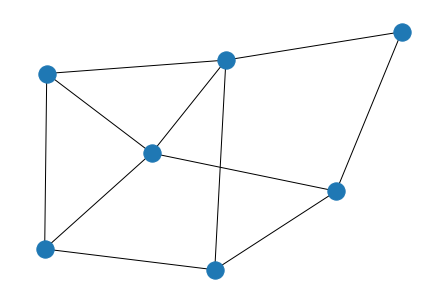

In [127]:
nx.draw(G)

#### Obtain count to edge mapper and edge to count mapper of graph G

In [128]:
count_to_edge_mapper={}
edge_to_count_mapper={}
count=0
for edge in G.edges():
    count_to_edge_mapper[count]=edge
    count+=1
count=0
for edge in G.edges():
    edge_to_count_mapper[edge]=count
    count+=1

#### Create a graph given the node list and a member of the population

In [129]:
def graph_creator(node_list,mem):
    Gprime=nx.Graph()
    for node in node_list:
        Gprime.add_node(node)
    edge_list=[]
    for i in range(len(mem)):
        if mem[i]==1:
            edge_list.append(count_to_edge_mapper[i])
    for edge in edge_list:
        Gprime.add_edge(edge[0],edge[1])
    return Gprime.copy()


#### Create a member of the population given the original graph G and a tree T

In [130]:
def edge_creator(Gprime,T):
    mem=[]
    for i in range(len(list(Gprime.edges()))):
        mem.append(0)
    for edge in T.edges():
        #print(edge)
        if edge not in edge_to_count_mapper.keys():
            mem[edge_to_count_mapper[tuple((edge[1],edge[0]))]]=1
        else:
            mem[edge_to_count_mapper[edge]]=1
        #print(mem)
    return mem.copy()

#### Some clarifications
1. A member of the population is basically an array or a list with zeroes and ones
2. Zero represents the particular edge is not present in tree T/Graph X
3. One represents the particular edge is present in tree T/Graph X
4. Eg: Assume original graph G has 5 edges (0,1),(1,2),(2,3),(4,1),(2,5)
5. Using the edge to count mapper we get
6. count_to_edge_mapper={0:(0,1), 1:(1,2), 2:(2,3), 3:(4,1), 4:(2,5)}
7. edge_to_count_mapper={(0,1):0, (1,2):1, (2,3):2, (4,1):3, (2,5):4}
8. Hence, if we wish to denote graph G as a member it would look like
9. Member=[1,1,1,1,1]
10. A graph Gprime where (1,2) and (2,5) are absent in member form below:
11. [1,0,1,1,0]

#### Memetic algorithm steps and procedure

1. Crossover(2 point crossover)
2. Mutation(check if random number<Prob(mutation)[0.6 fixed], if so mutate(1->0 or 0->1]
3. Perform repair(find all components of the member, pass it to component_connector, and hence replace the illegal member with a legal spanning tree member)
4. Torunament selection, choose 2 individual from parent and 2 individual from child, randomly perform a tournament b/w the 4 and initialize the winner as the next member. Do this until there are new generation is filled

5. The objective here is to minimize(spanning tree congestion)

In [131]:
population=[]
for i in range(10):
    population.append([])
population_checker=[False]*len(population)
graph_holder=[]

i=0
for T in list(nx.SpanningTreeIterator(G))[0:10]:
    population[i]=edge_creator(G.copy(),T.copy()).copy()
    i=i+1
i=0
best_score=100000
# for member in population:
#     temp=graph_creator(G.nodes(),member)
#     print(spanning_tree_checker(G,temp))
child_population=[]
for i in range(len(population)):
    child_population.append([])
total_gen=5
g=0
graph_checker=[]

pmutation=0.6

population_tracker=[]
for gen in range(total_gen+2):
    population_tracker.append([])
for i in range(len(population)):
    population_tracker[0].append(population[i].copy())

#print("***********************************************************************HELLO")
#print(population_tracker)
# for member in population_tracker[0]:
#     temp=graph_creator(G.nodes(),member)
#     print(spanning_tree_checker(G,temp))

while g<50:
    #1.Crossover
    while population_checker!=[True]*len(population):
        p1=random.randint(0,len(population)-1)
        p2=random.randint(0,len(population)-1)
        if population_checker[p1]==False and population_checker[p2]==False:
            #random point crossover
            rand_num1=random.randint(0,len(population[p1])-1)
            rand_num2=random.randint(0,len(population[p1])-1)
            max_index=max(rand_num1,rand_num2)
            min_index=min(rand_num1,rand_num2)
            if max_index==min_index:
                #No crossover
                child_population[p1]=population[p1].copy()
                child_population[p2]=population[p2].copy()
                population_checker[p1]=True
                population_checker[p2]=True
            else:
                #Perform Crossover
                #print("PREFORMING CROSSOVER")
                p1new=[]
                p2new=[]
                for f in range(0,min_index):
                    p1new.append(population[p2][f])
                for f in range(min_index,max_index):
                    p1new.append(population[p1][f])
                for f in range(max_index,len(population[p2])):
                    p1new.append(population[p2][f])
                #print("CROSSOVERACTION",p1new)
                for f in range(0,min_index):
                    p2new.append(population[p1][f])
                for f in range(min_index,max_index):
                    p2new.append(population[p2][f])
                for f in range(max_index,len(population[p1])):
                    p2new.append(population[p1][f])
                
                child_population[p1]=p1new.copy()
                child_population[p2]=p2new.copy()
                
                population_checker[p1]=True
                population_checker[p2]=True

    #Crossover Finished
    #2.Mutation
#     for mem in population:
#         for i in range(len(mem)):
#             if random.random()<pmutation:
#                 if mem[i]==0:
#                     mem[i]=1
#                 else:
#                     mem[i]=0
    for i in range(len(child_population)):
        for j in range(len(child_population[i])):
            if random.random()<pmutation:
                if child_population[i][j]==0:
                    child_population[i][j]=1
                else:
                    child_population[i][j]=0

    #Mutation completed
    #3.Repair starts
#     for r in range(len(population)):
#         temp_graph=graph_creator(G.nodes(),population[r].copy()).copy()
#         correct_temp_graph=nx.Graph()
#         if spanning_tree_checker(G,temp_graph)==False:
#             graph_checker.append(temp_graph)
#             S = [temp_graph.subgraph(c).copy() for c in nx.connected_components(temp_graph.copy())]
#             #print(S)
#             correct_temp_graph=component_connector(G,S,graph_holder).copy()
#             population[r]=edge_creator(G.copy(),correct_temp_graph.copy()).copy()    
#             graph_checker.append(correct_temp_graph)
    for r in range(len(child_population)):
        temp_graph=graph_creator(G.nodes(),child_population[r].copy()).copy()
        correct_temp_graph=nx.Graph()
        if spanning_tree_checker(G,temp_graph)==False:
            graph_checker.append(temp_graph)
            S = [temp_graph.subgraph(c).copy() for c in nx.connected_components(temp_graph.copy())]
            correct_temp_graph=component_connector(G.copy(),S.copy(),graph_holder).copy()
            child_population[r]=edge_creator(G.copy(),correct_temp_graph.copy()).copy()
            graph_checker.append(correct_temp_graph)
    #Repair Over
#     for mem in population:
#         temp_graph=graph_creator(G.nodes(),mem.copy()).copy()
#         print(spanning_tree_checker(G,temp_graph))
#     for mem in child_population:
#         temp_graph=graph_creator(G.nodes(),mem.copy()).copy()
#         print(spanning_tree_checker(G,temp_graph))
    #Score Calculation
    parent_score={}
    child_score={}
    for k in range(len(population)):
        temp_tree=graph_creator(G.nodes(),population[k].copy()).copy()
        parent_score[k]=return_max_edge_congestion_of_tree(G,temp_tree)
    for k in range(len(child_population)):
        temp_tree=graph_creator(G.nodes(),child_population[k].copy()).copy()
        child_score[k]=return_max_edge_congestion_of_tree(G,temp_tree)
        
    #4.Tournament Selection
    new_population=[]
    for i in range(len(population)):
        new_population.append([])
    for nth_winner in range(len(population)):
        parent1=random.randint(0,len(population)-1)
        parent2=random.randint(0,len(population)-1)
        child1=random.randint(0,len(population)-1)
        child2=random.randint(0,len(population)-1)
        winner_score=min(parent_score[parent1],parent_score[parent2],child_score[child1],child_score[child2])
        if winner_score<best_score:
            best_score=winner_score
        if winner_score==parent_score[parent1]:
            new_population[nth_winner]=population[parent1].copy()
        else:
            if winner_score==parent_score[parent2]:
                new_population[nth_winner]=population[parent2].copy()
            else:
                if winner_score==child_score[child1]:
                    new_population[nth_winner]=child_population[child1].copy()
                else:
                    new_population[nth_winner]=child_population[child2].copy()
    
    
    #Increment generation
    g=g+1
    #Clear Scores
    parent_score=[]
    child_score=[]
    #Copy new generation to population
    for new_pop in range(len(population)):
        population[new_pop]=new_population[new_pop].copy()
    
    new_population=[]
    for i in range(len(population)):
        new_population.append([])
    population_tracker.append([])
    for pop in range(len(population)):
        population_tracker[g].append(population[pop])
    #population_tracker.append(population.copy())
    population_checker=[False]*len(population)
    child_population=[]
    for i in range(len(population)):
        child_population.append([])
#     for m in population:
#         #print(spanning_tree_checker(G,graph_creator(G.nodes(),m.copy())))
        

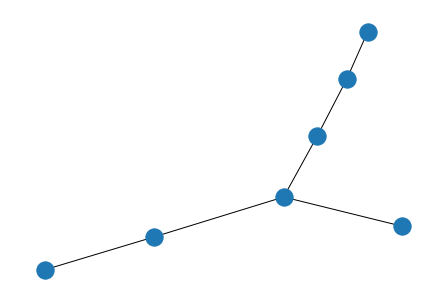

In [107]:
nx.draw(graph_creator(G.nodes(),population_tracker[5][5]))

In [112]:
import matplotlib.pyplot as plt

C:\Users\Acer Pc\AppData\Local\Temp\ipykernel_13084\4194492070.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i*10+j+1)


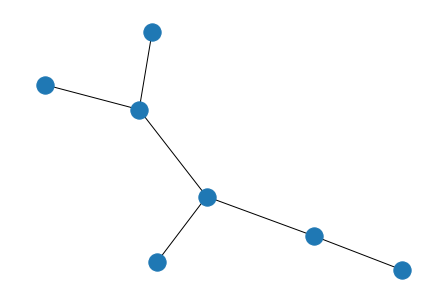

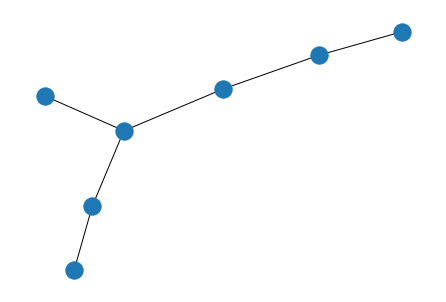

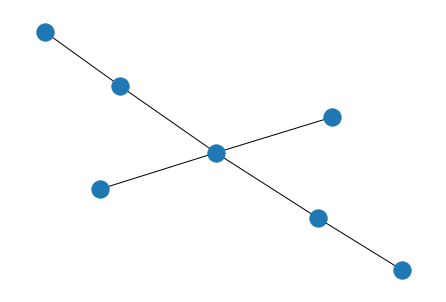

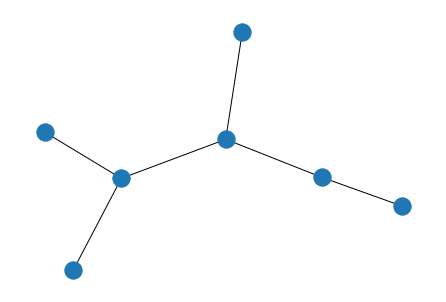

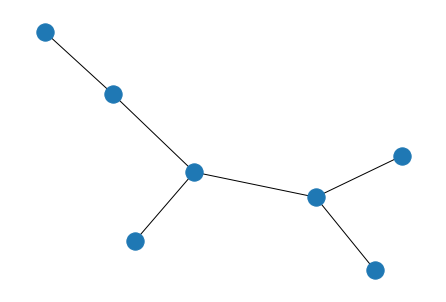

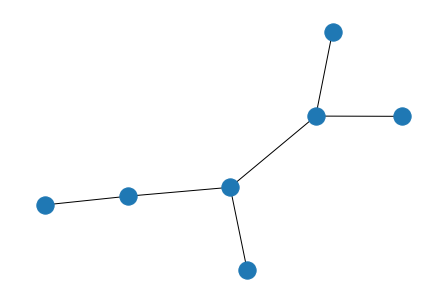

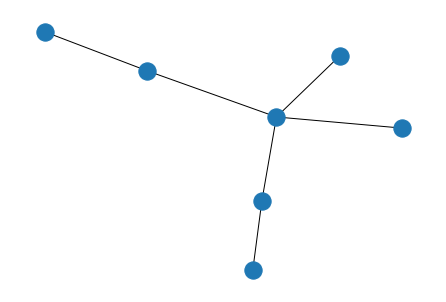

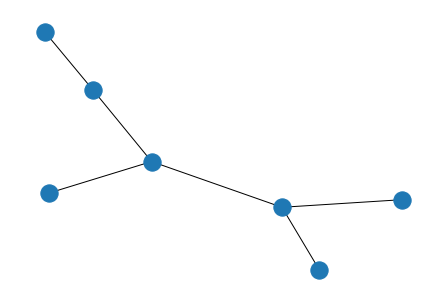

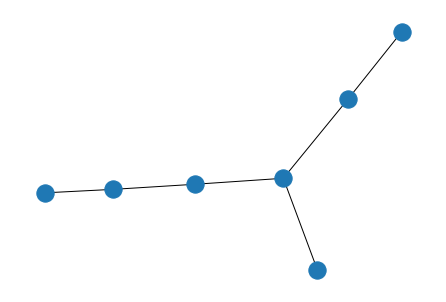

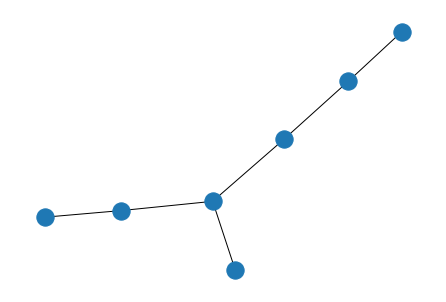

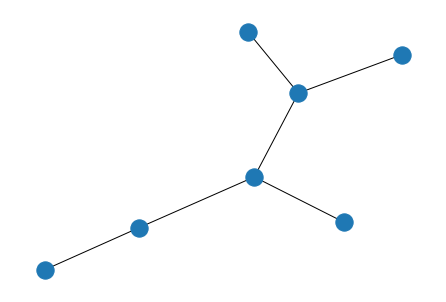

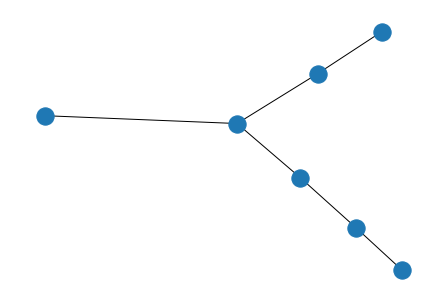

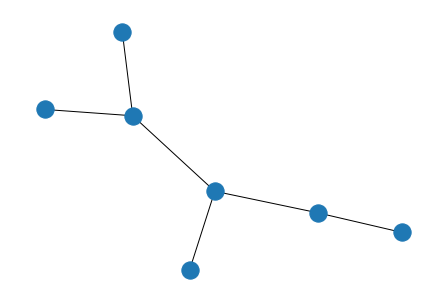

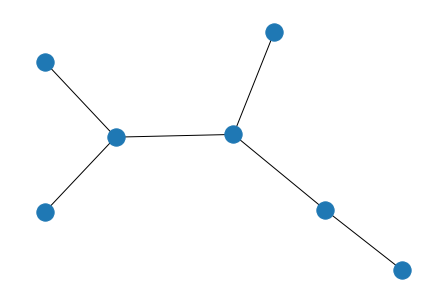

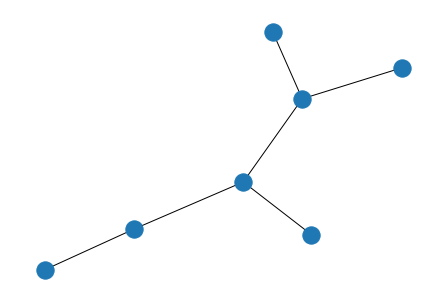

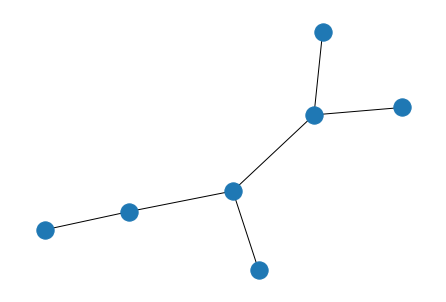

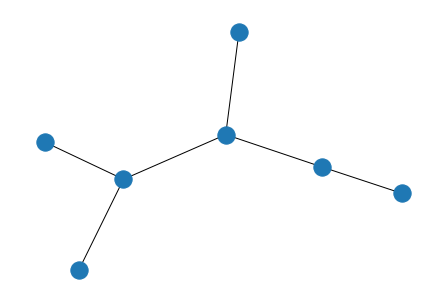

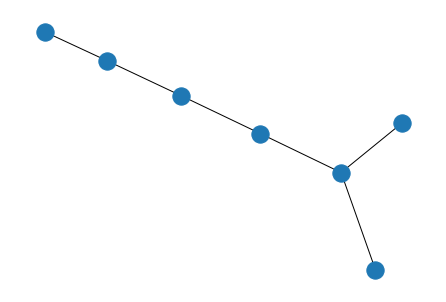

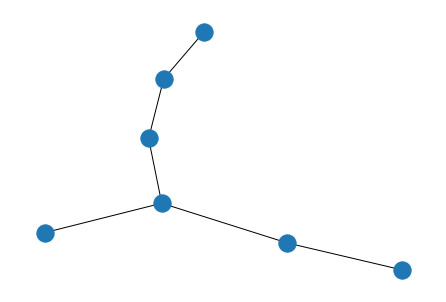

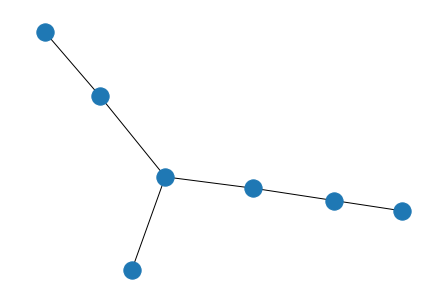

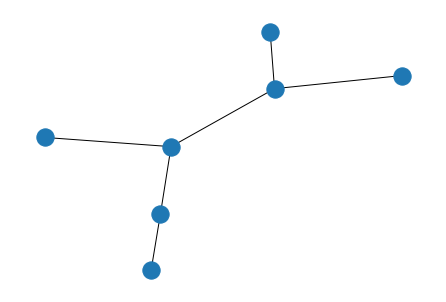

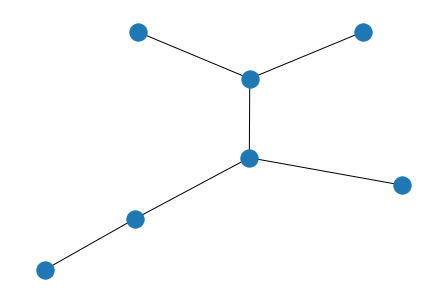

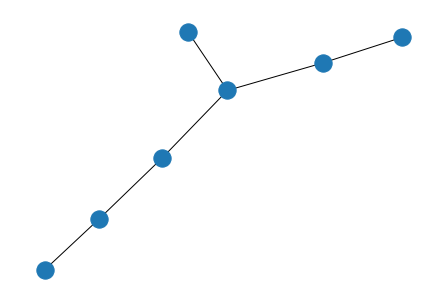

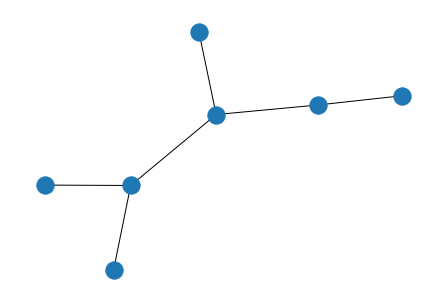

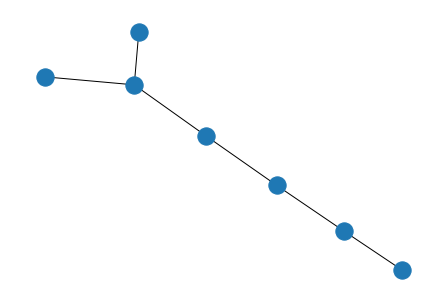

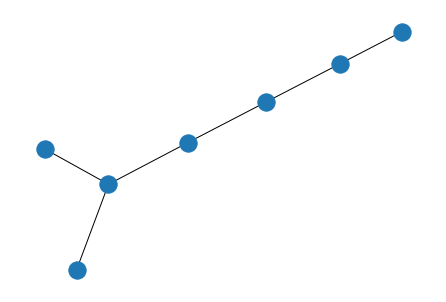

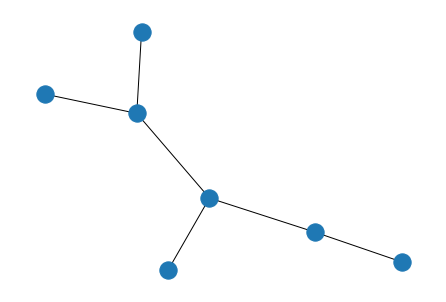

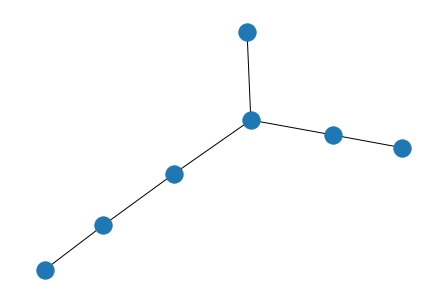

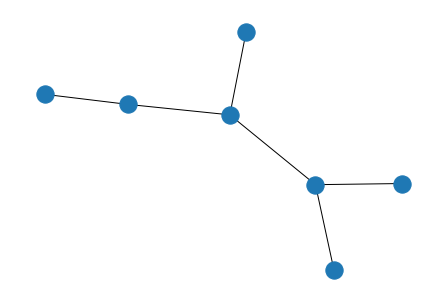

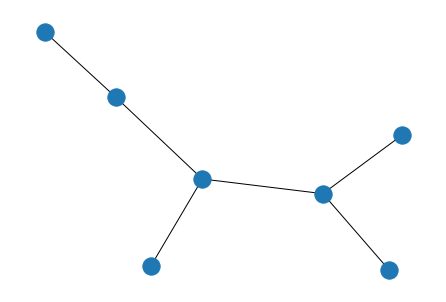

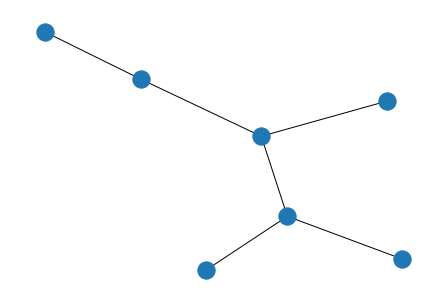

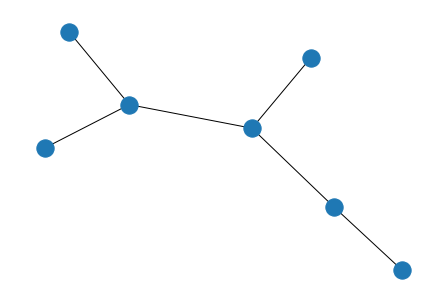

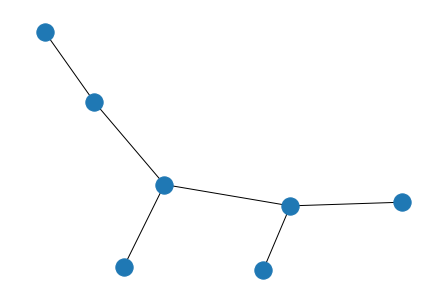

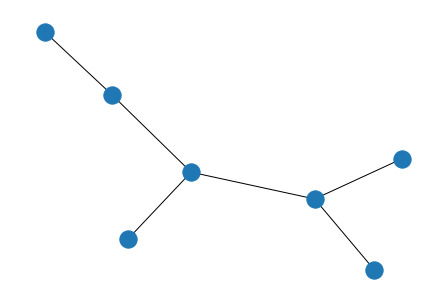

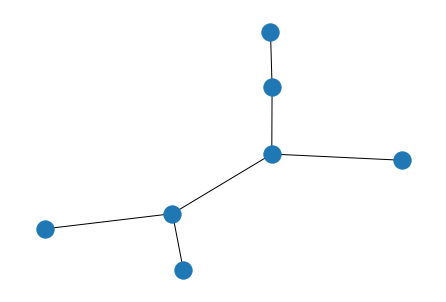

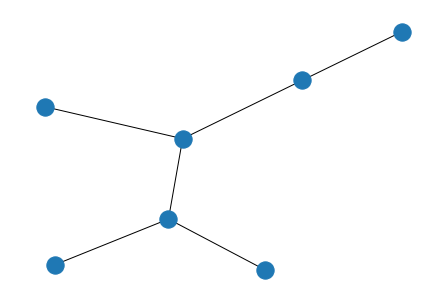

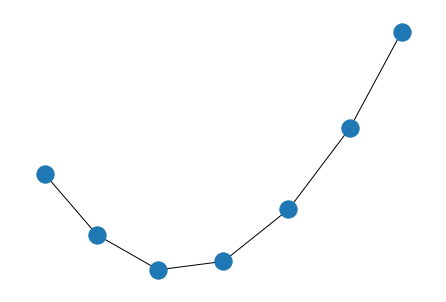

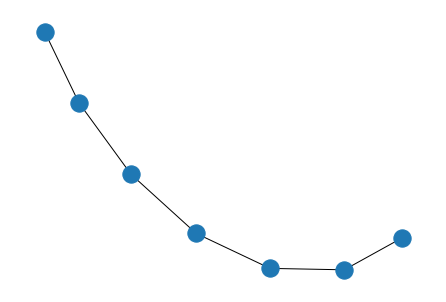

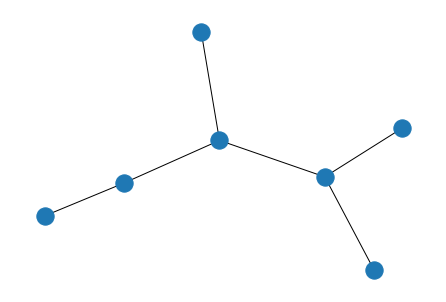

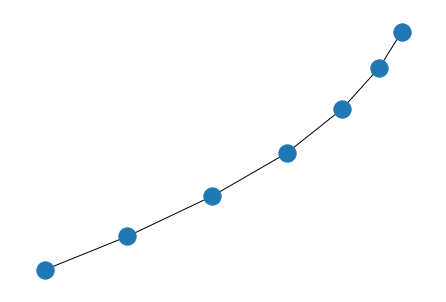

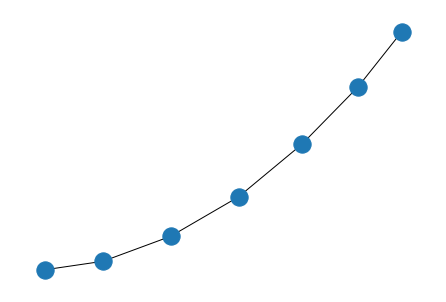

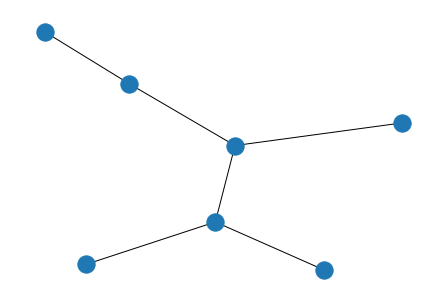

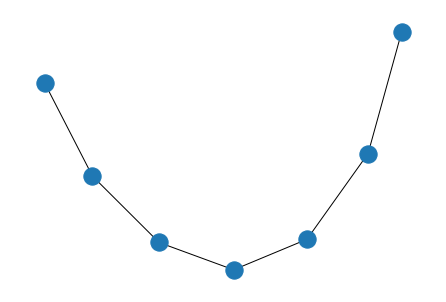

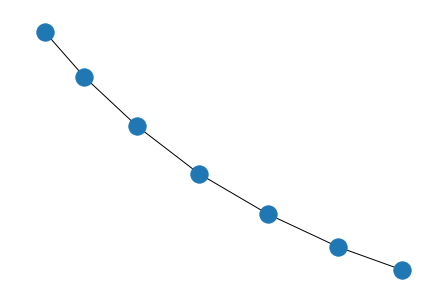

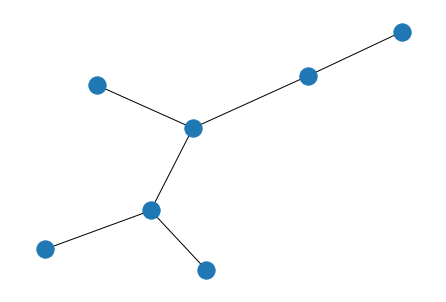

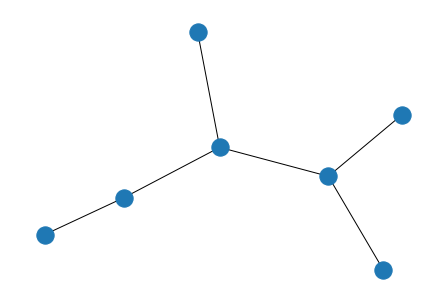

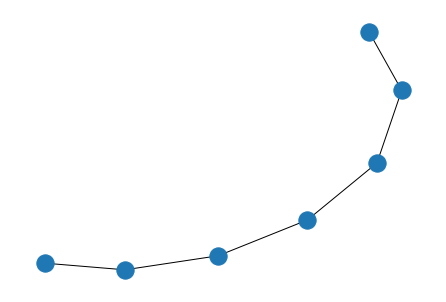

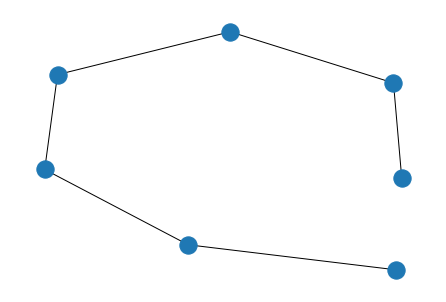

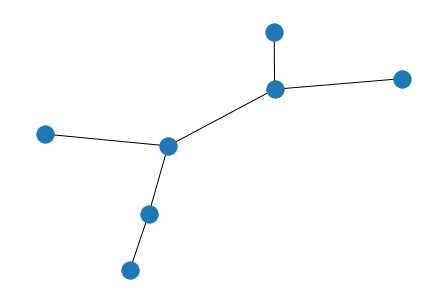

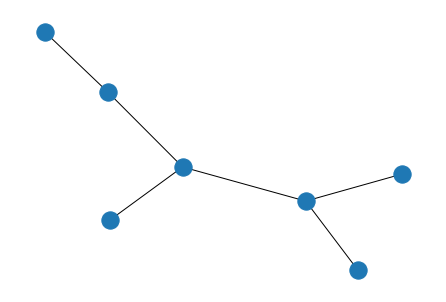

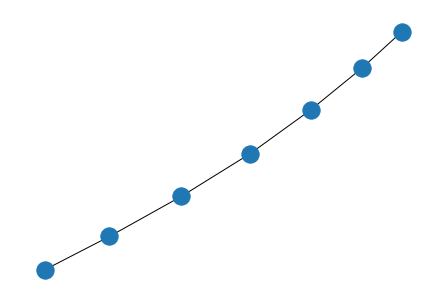

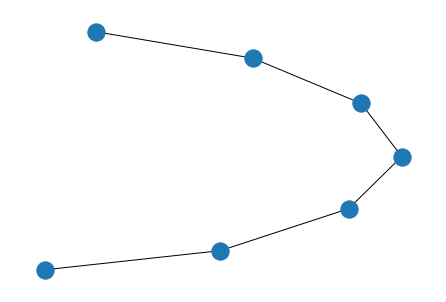

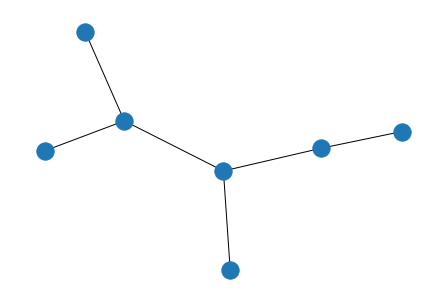

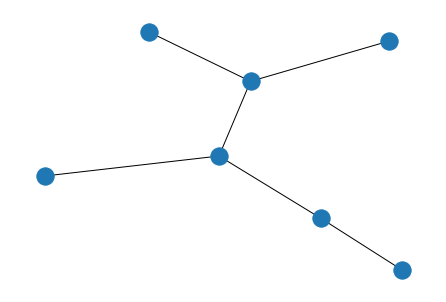

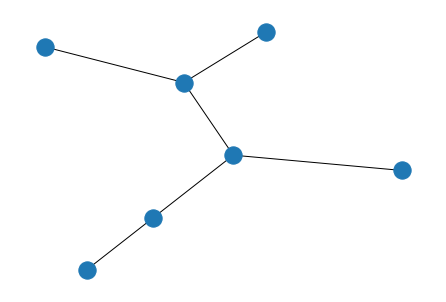

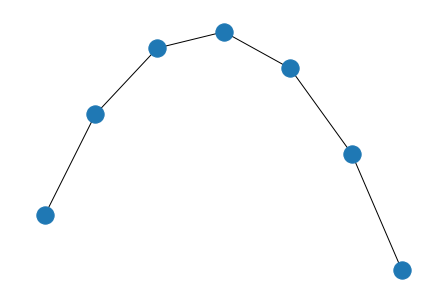

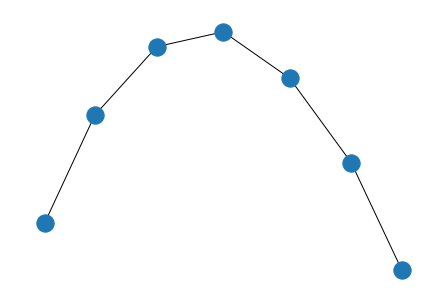

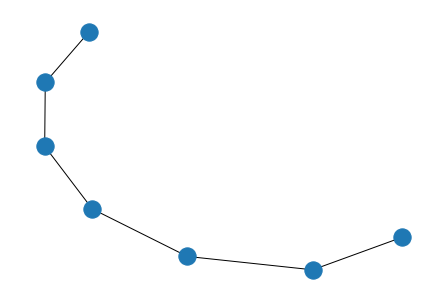

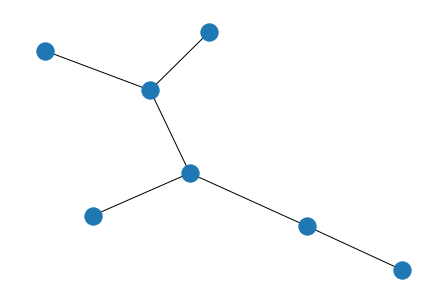

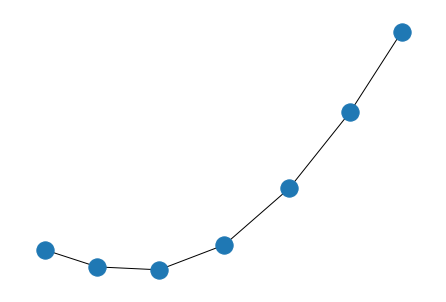

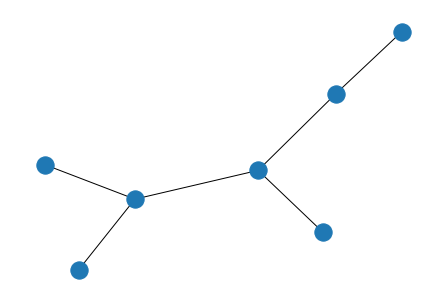

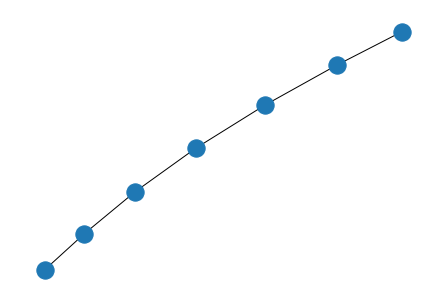

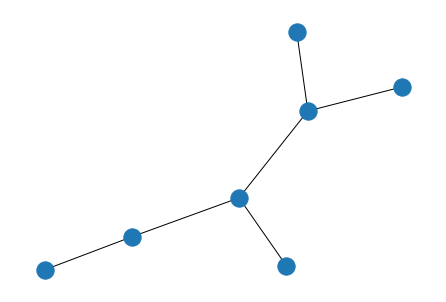

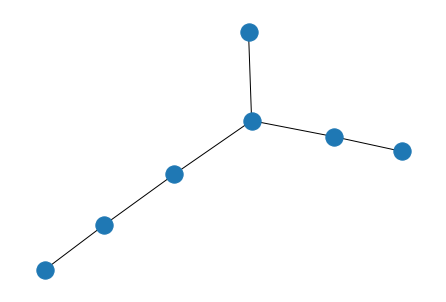

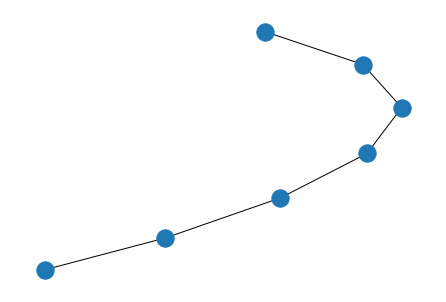

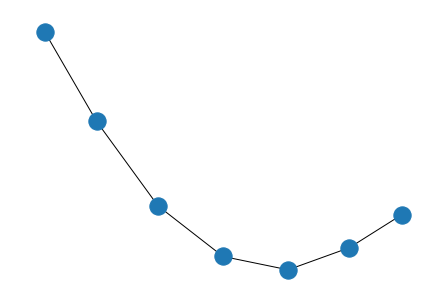

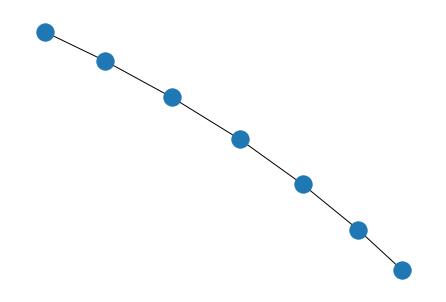

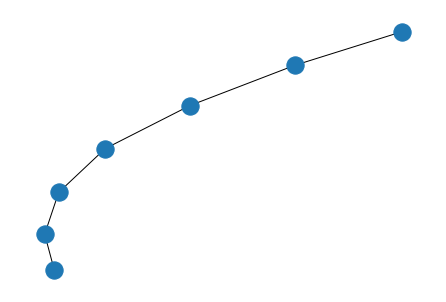

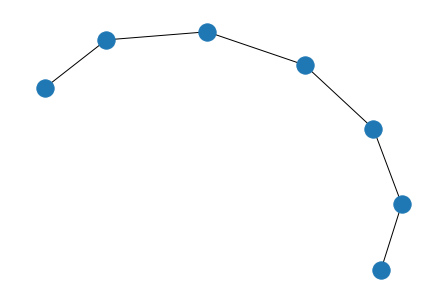

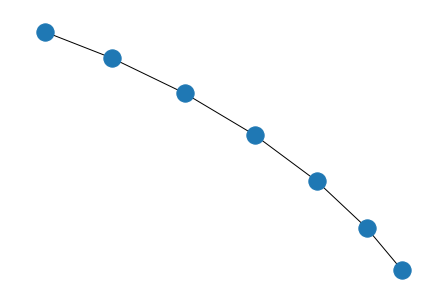

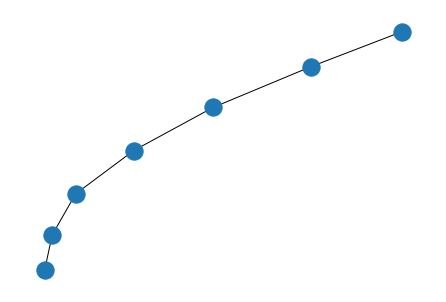

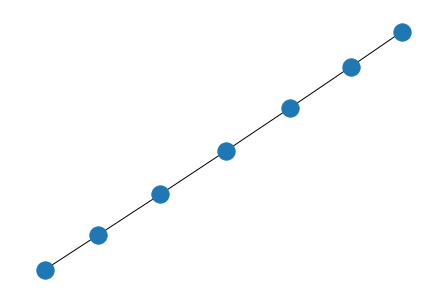

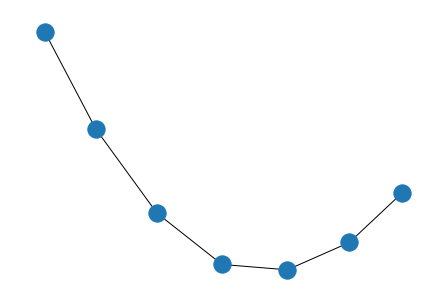

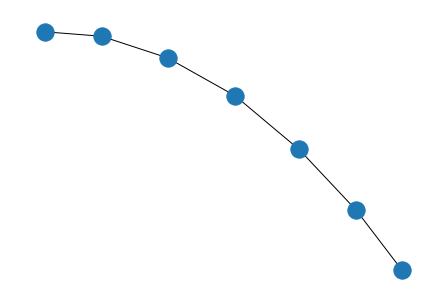

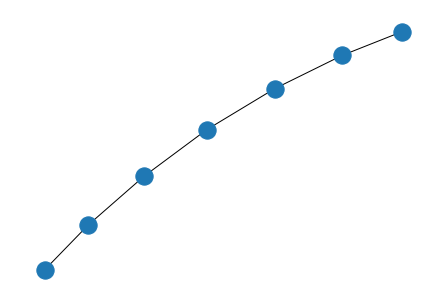

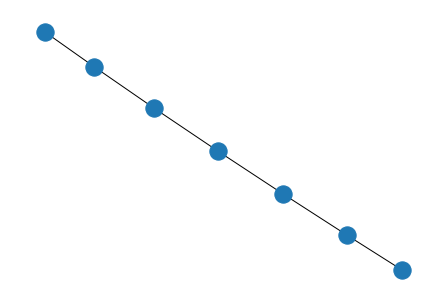

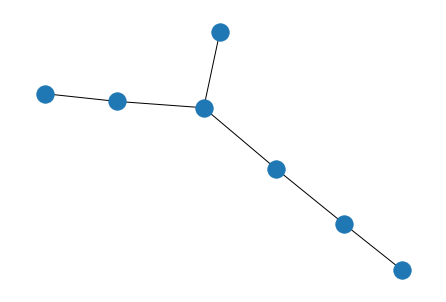

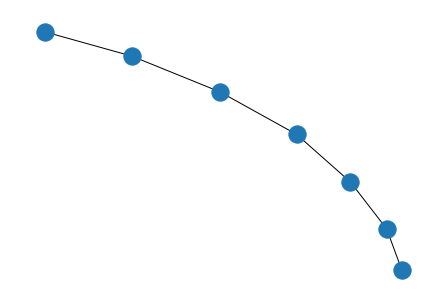

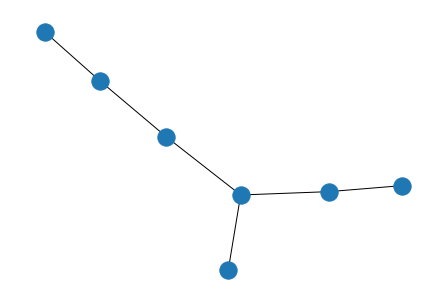

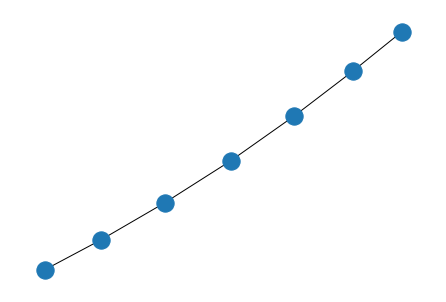

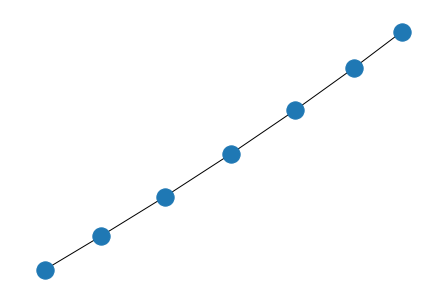

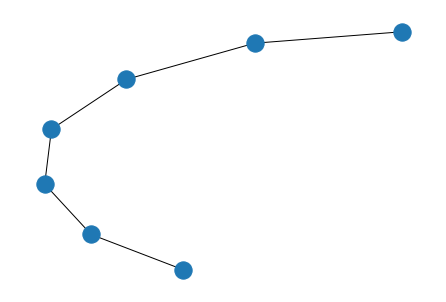

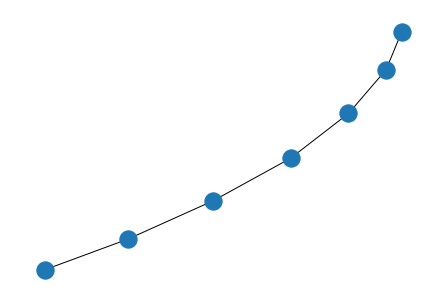

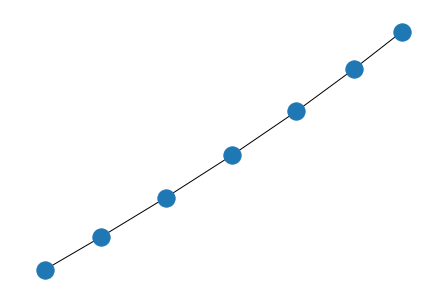

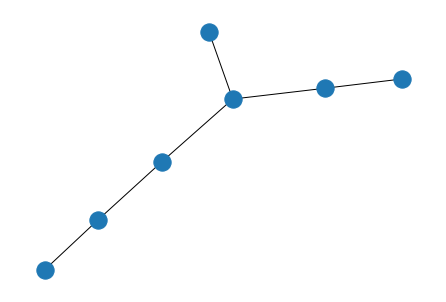

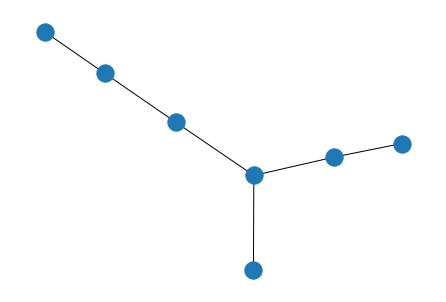

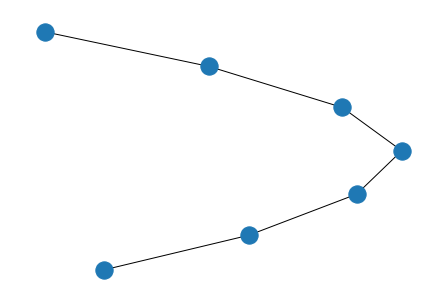

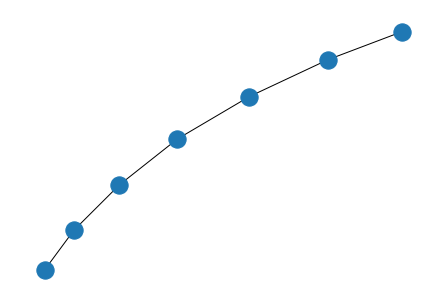

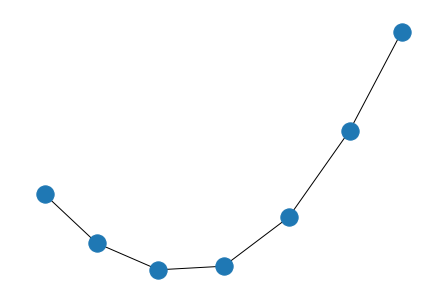

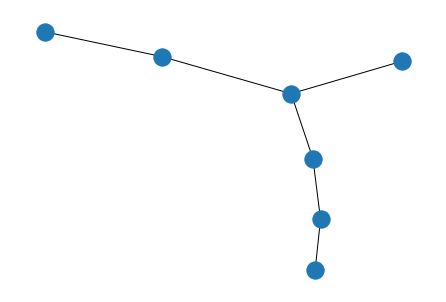

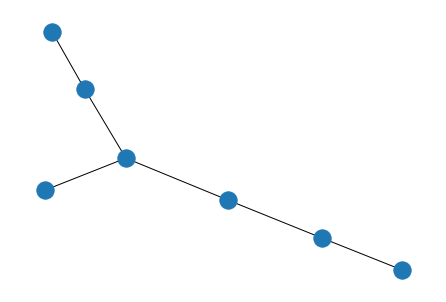

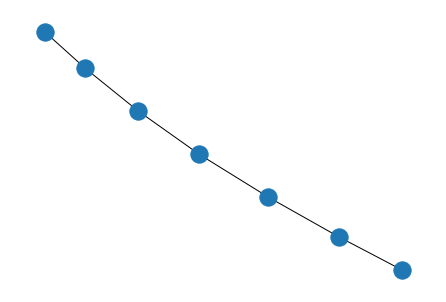

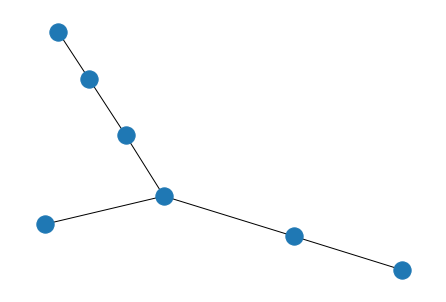

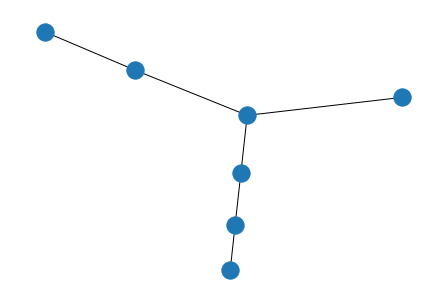

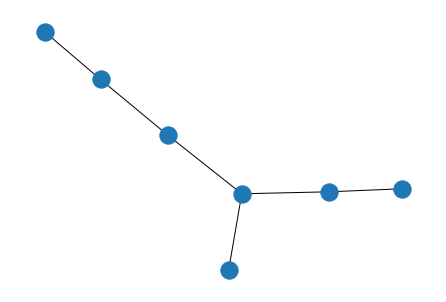

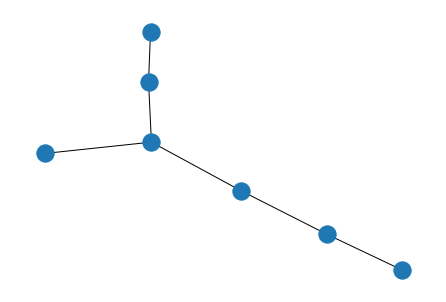

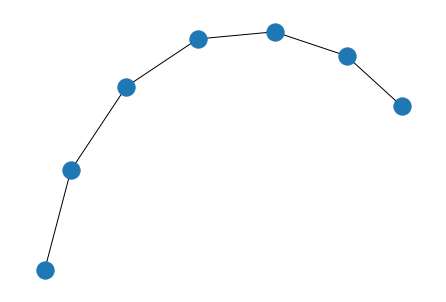

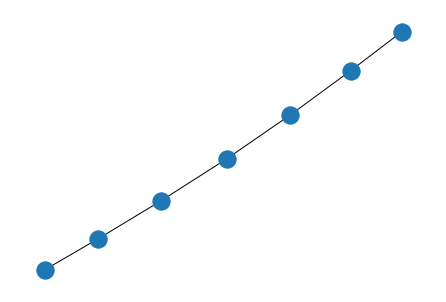

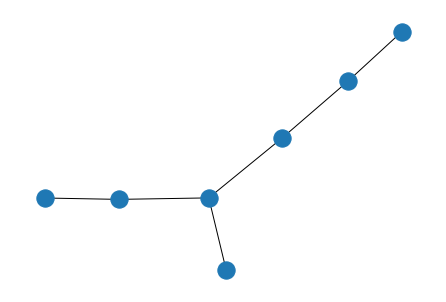

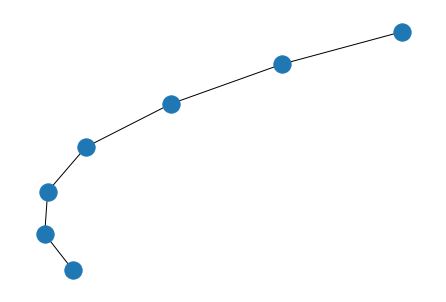

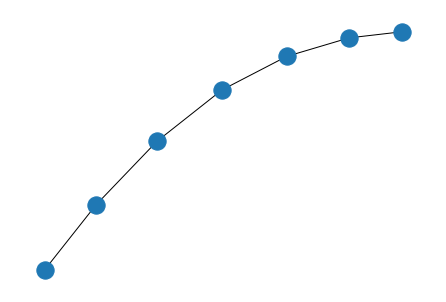

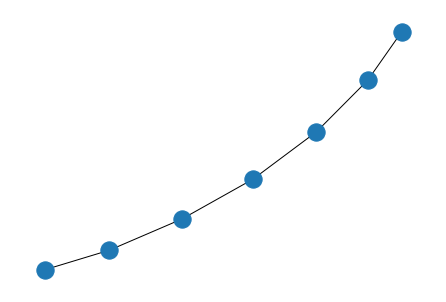

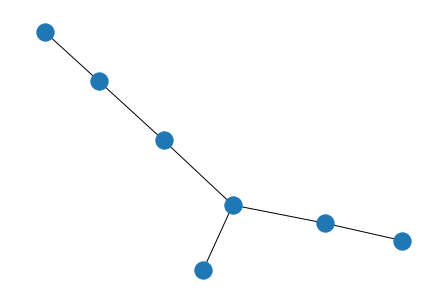

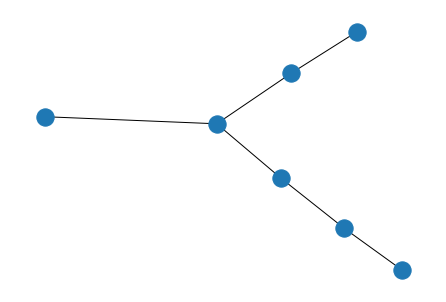

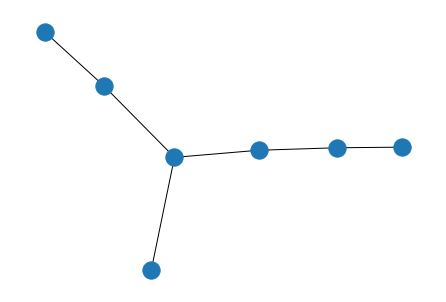

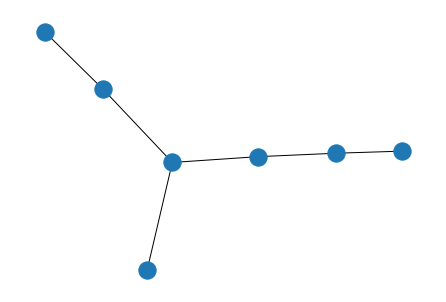

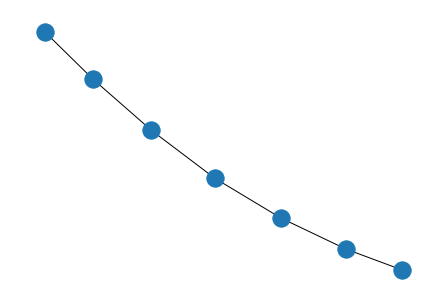

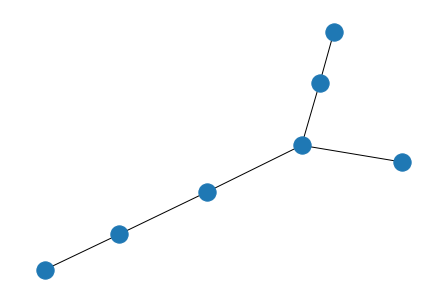

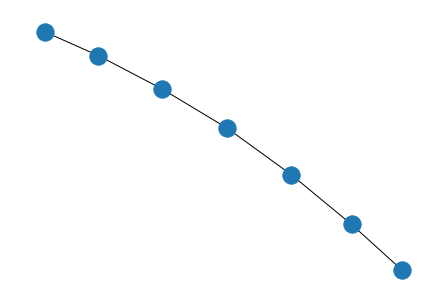

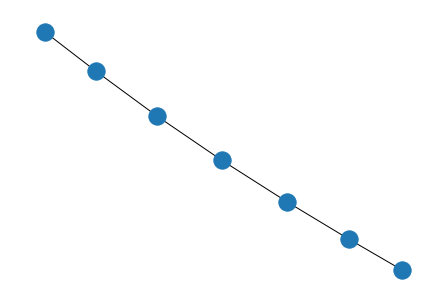

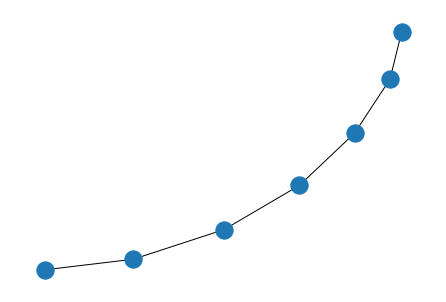

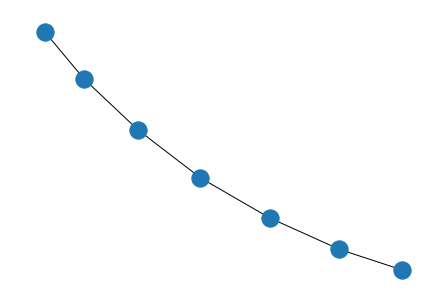

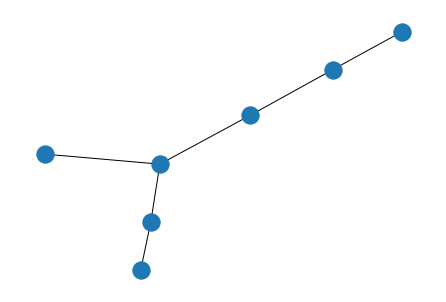

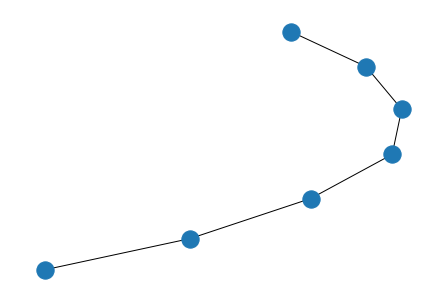

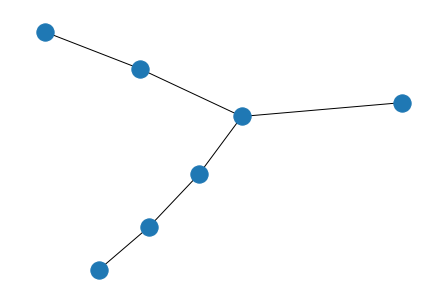

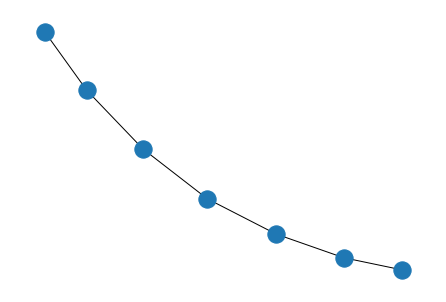

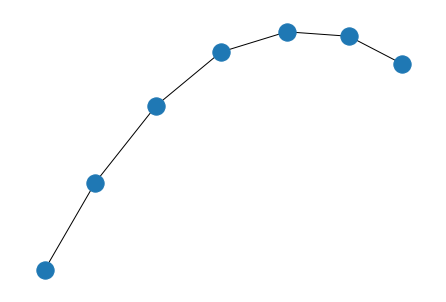

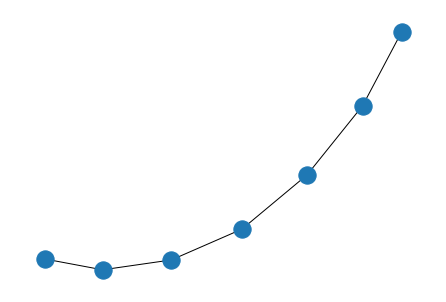

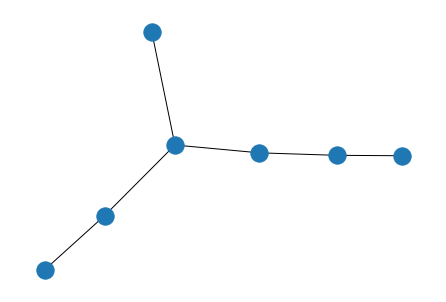

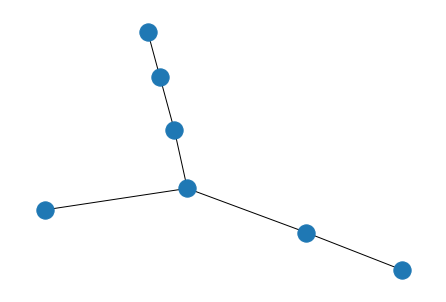

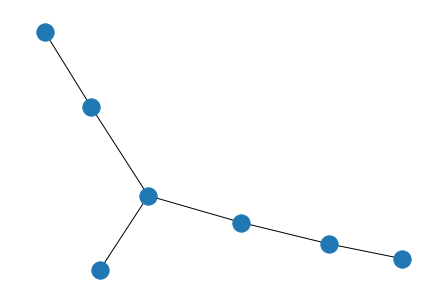

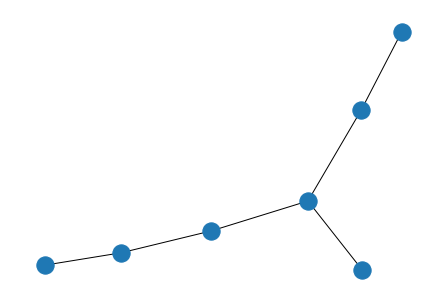

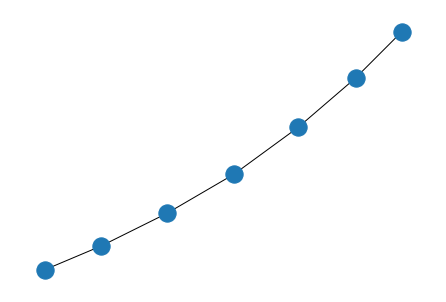

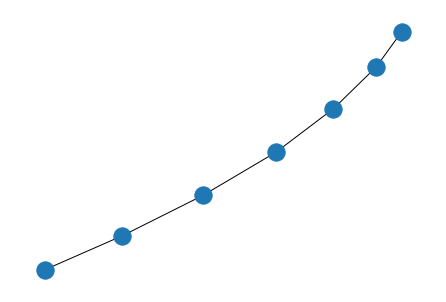

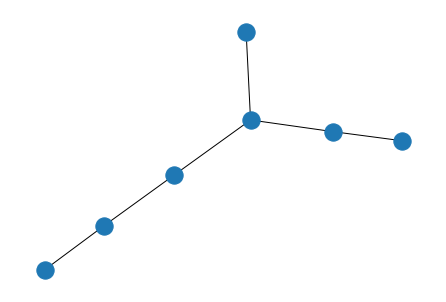

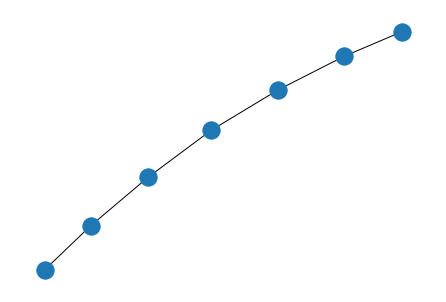

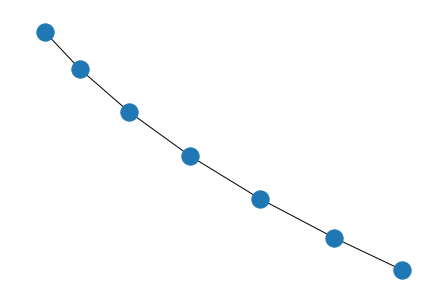

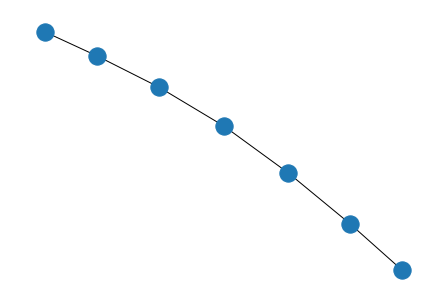

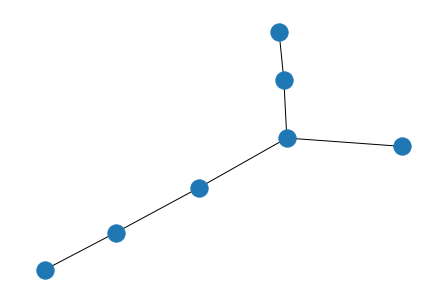

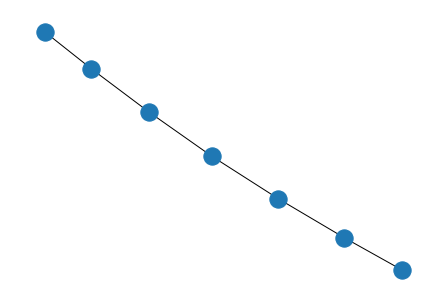

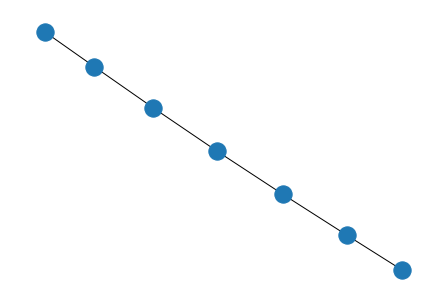

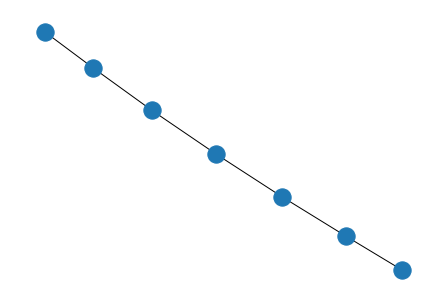

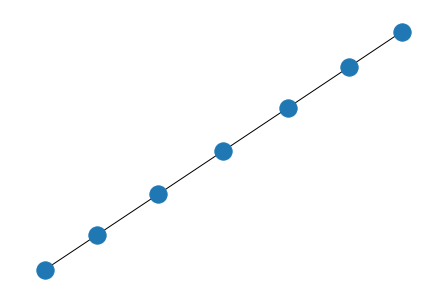

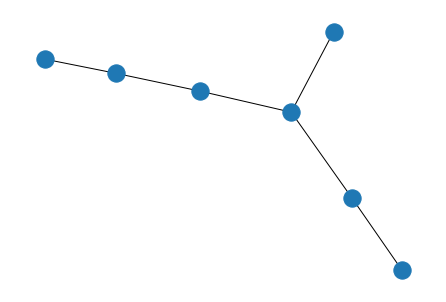

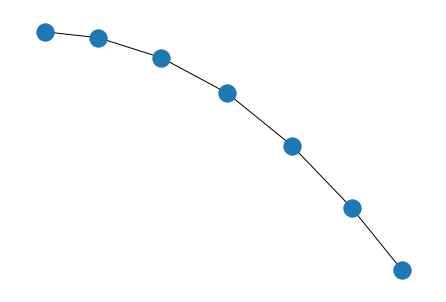

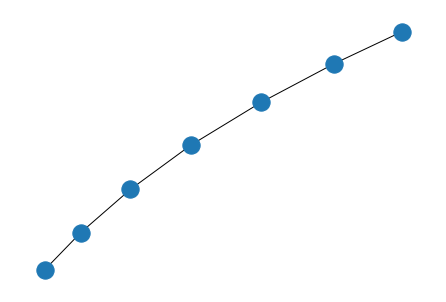

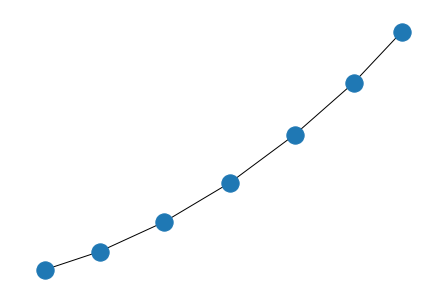

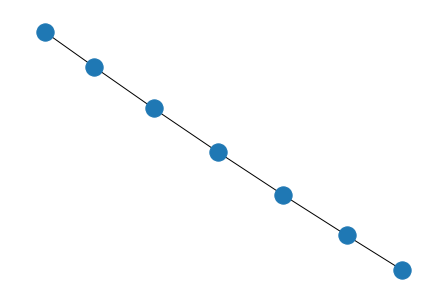

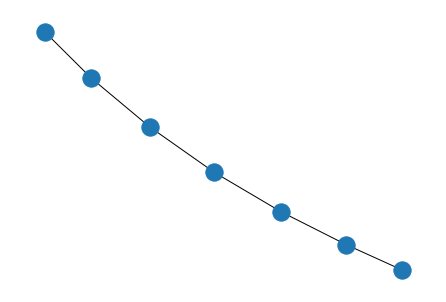

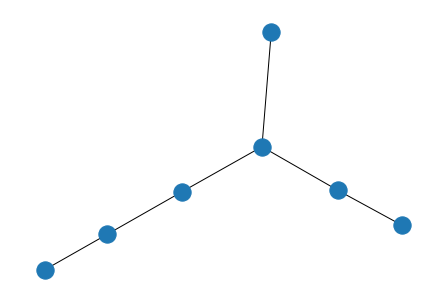

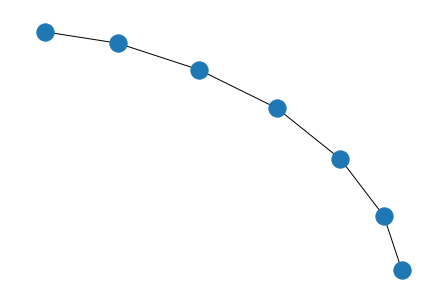

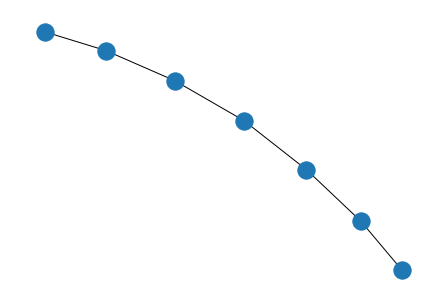

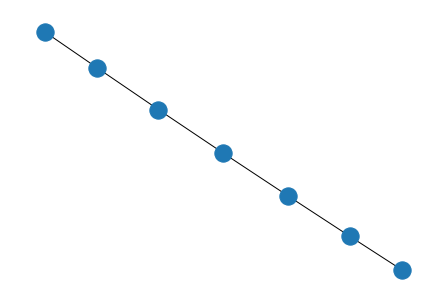

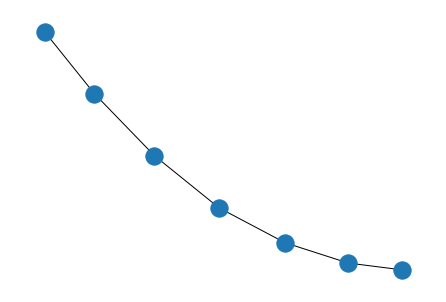

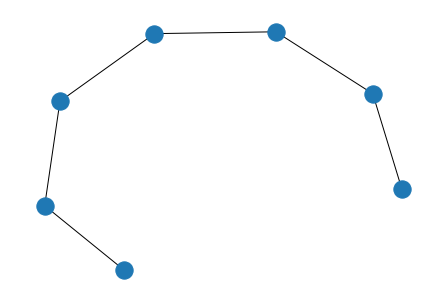

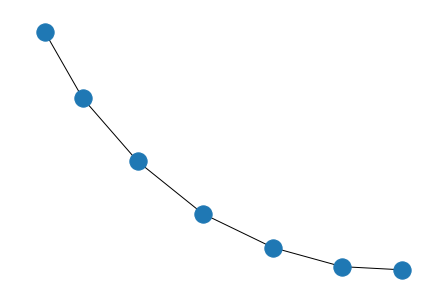

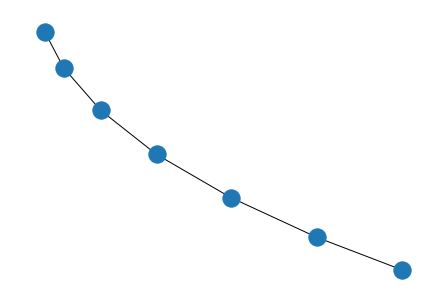

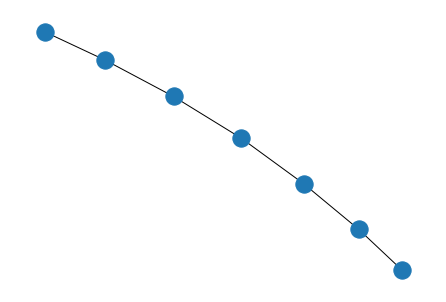

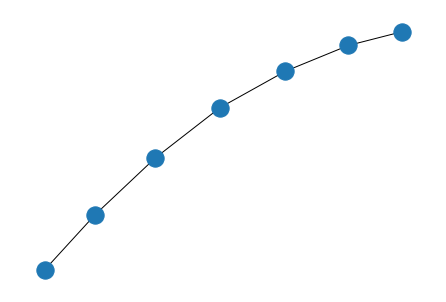

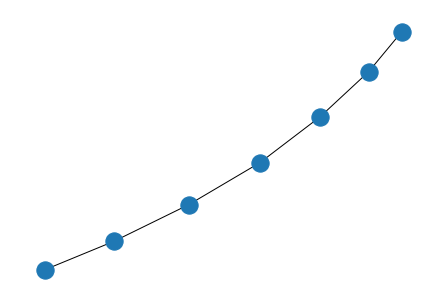

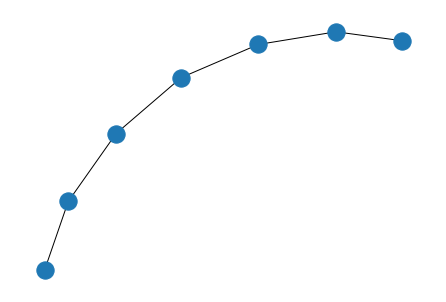

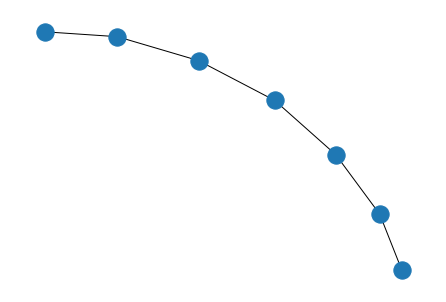

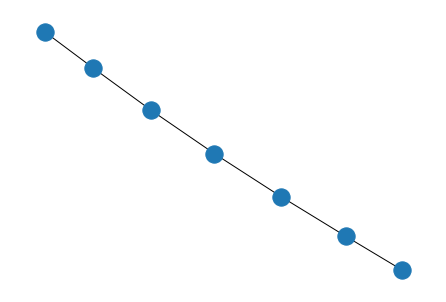

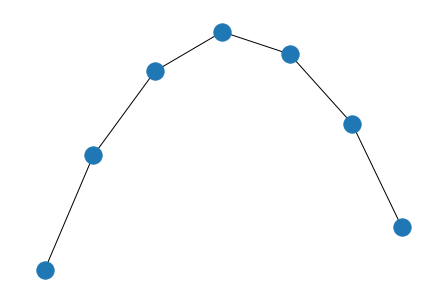

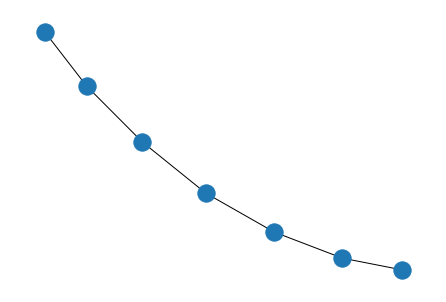

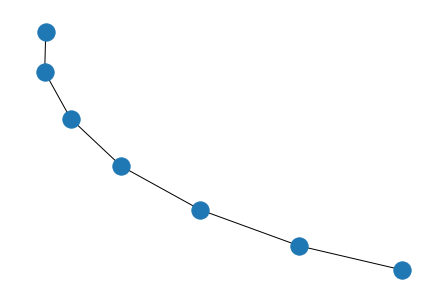

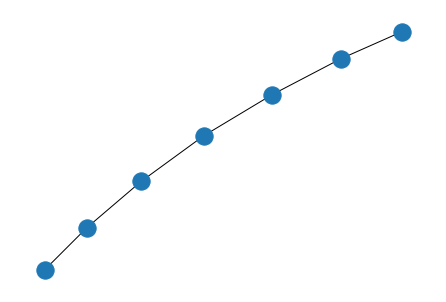

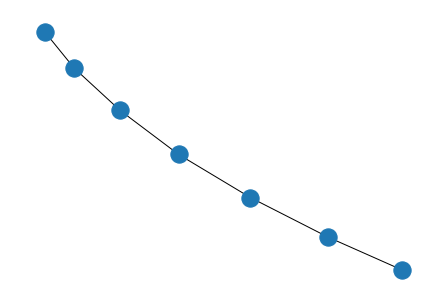

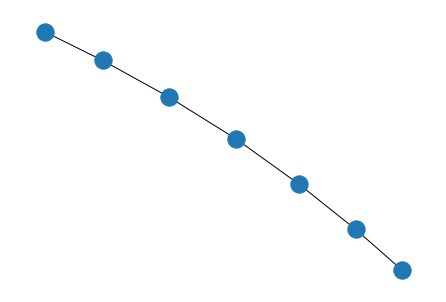

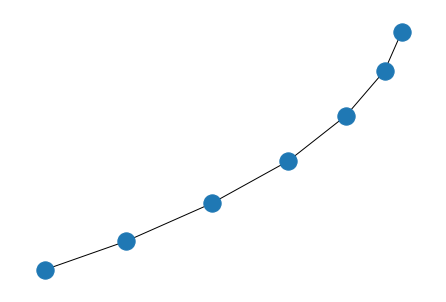

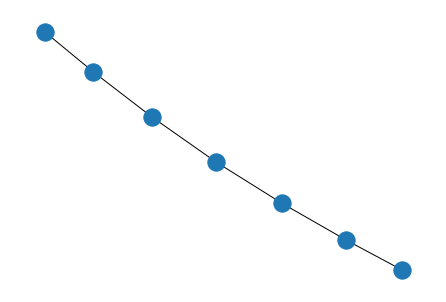

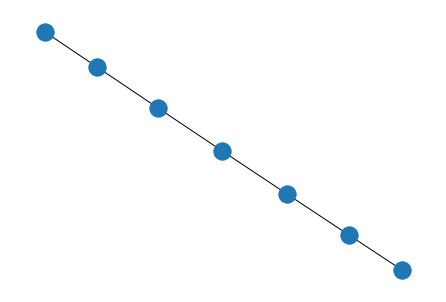

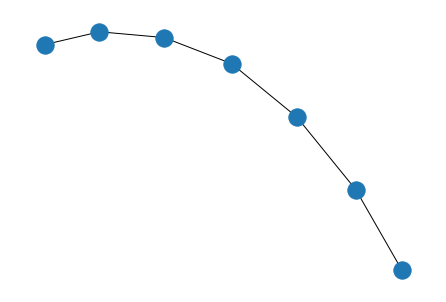

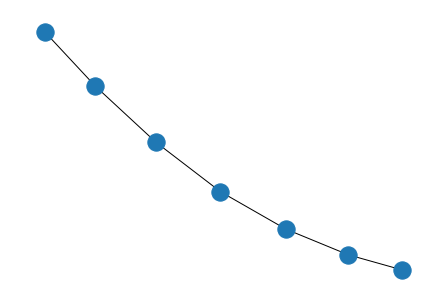

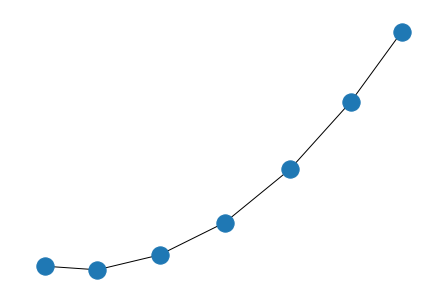

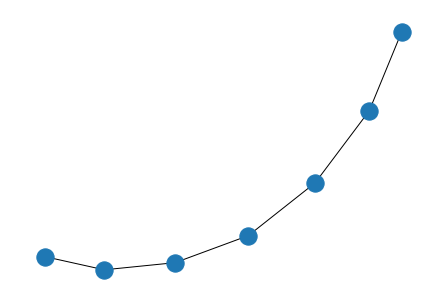

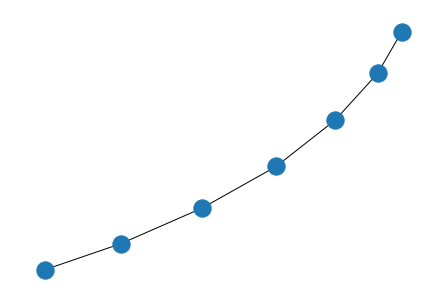

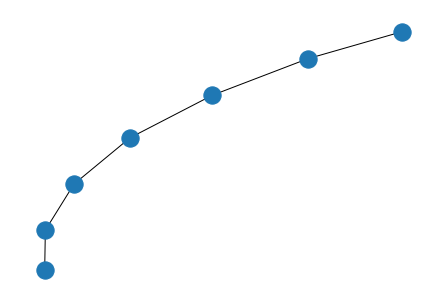

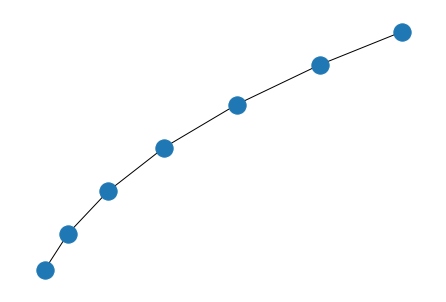

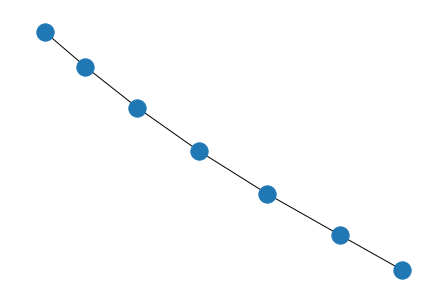

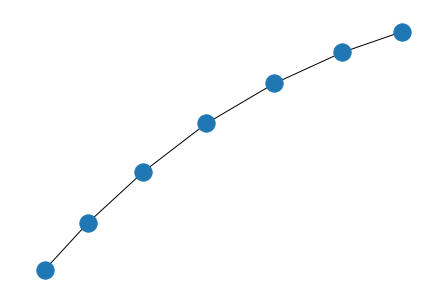

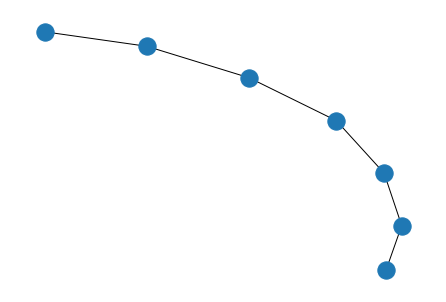

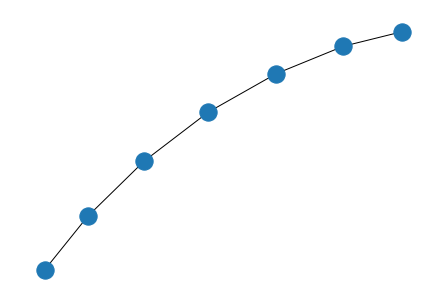

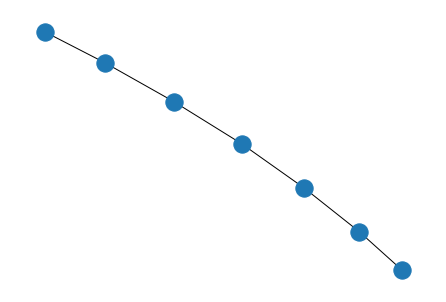

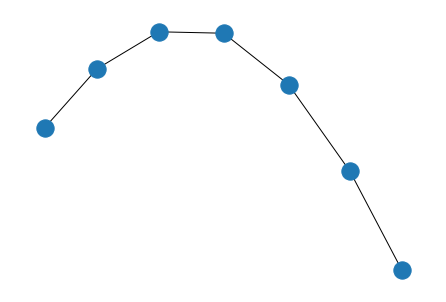

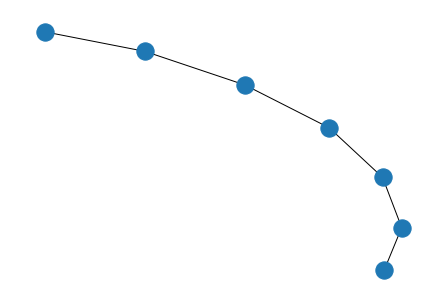

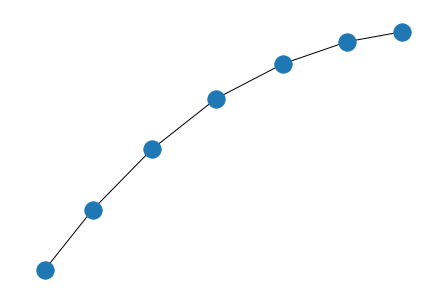

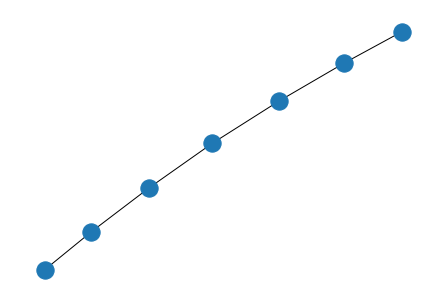

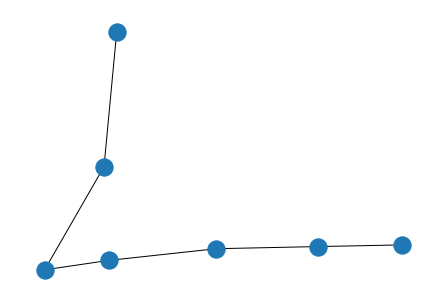

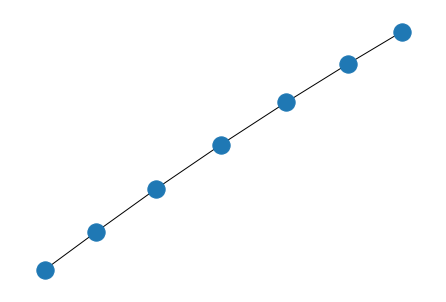

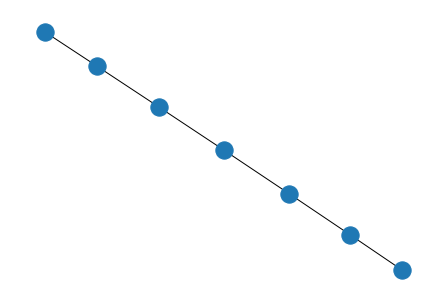

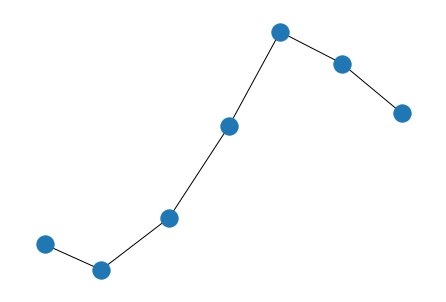

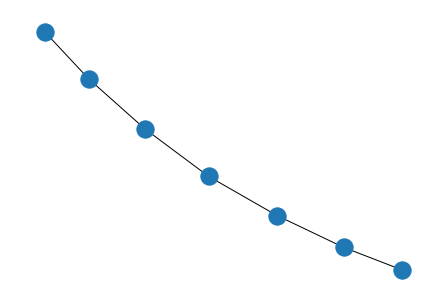

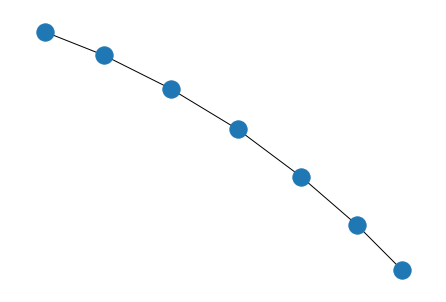

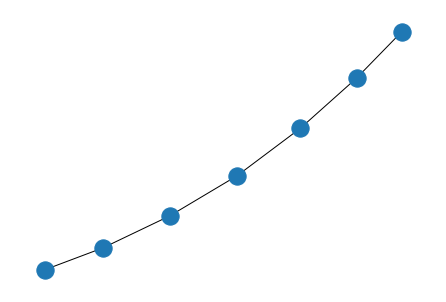

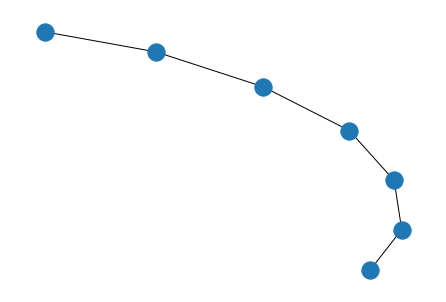

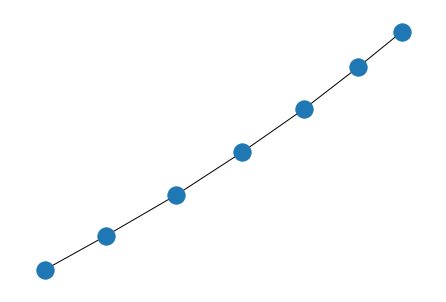

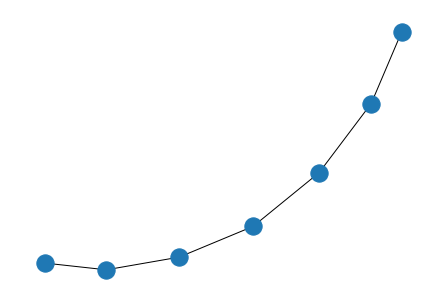

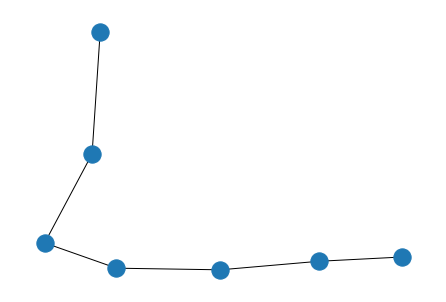

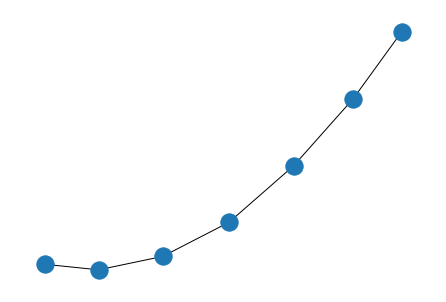

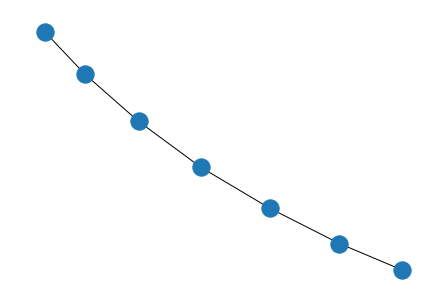

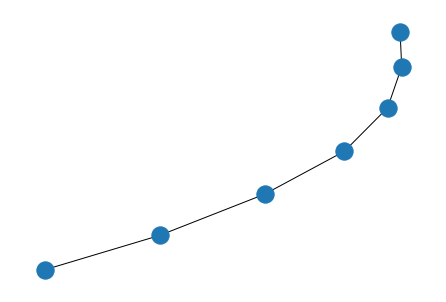

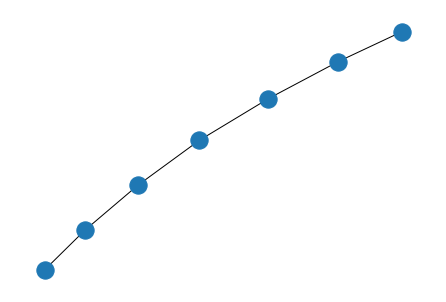

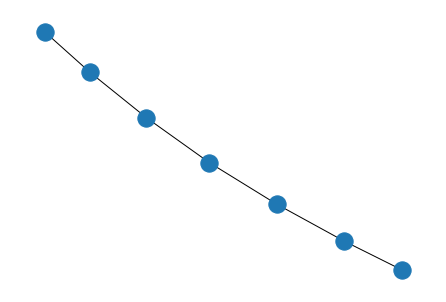

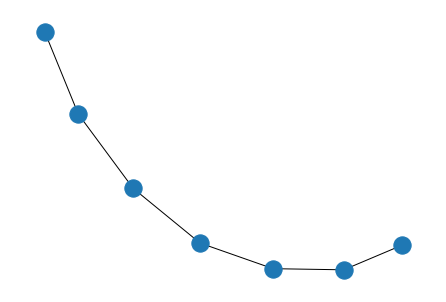

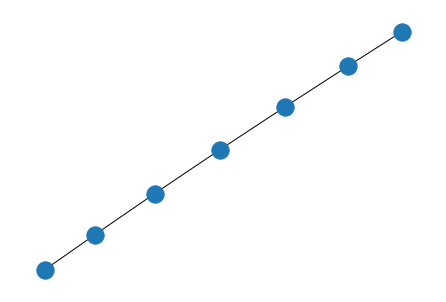

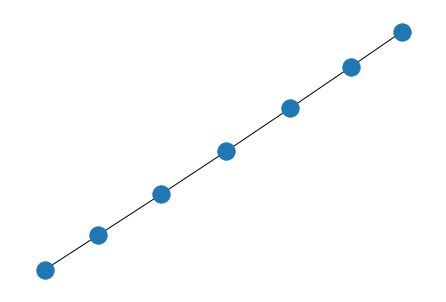

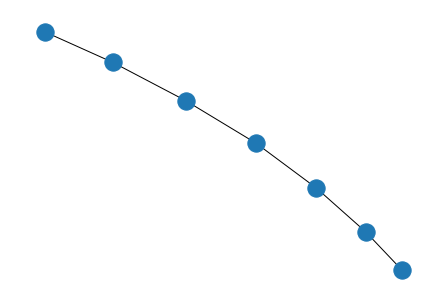

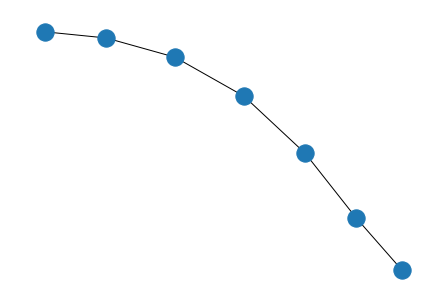

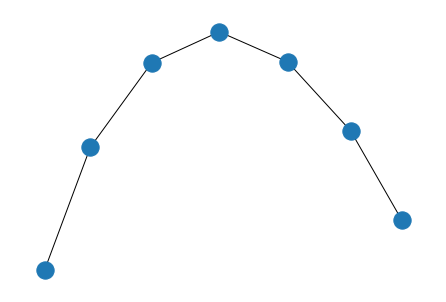

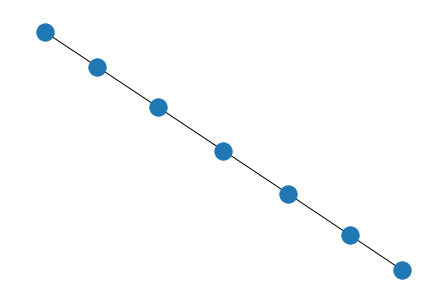

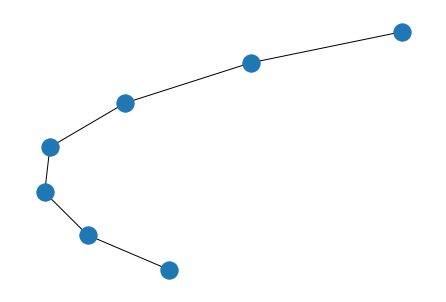

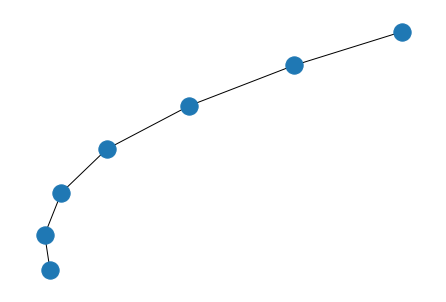

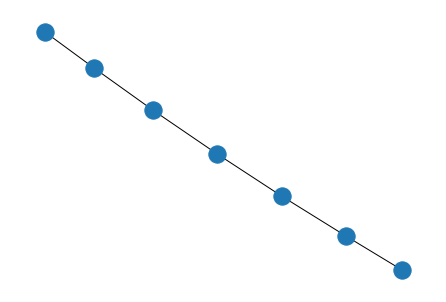

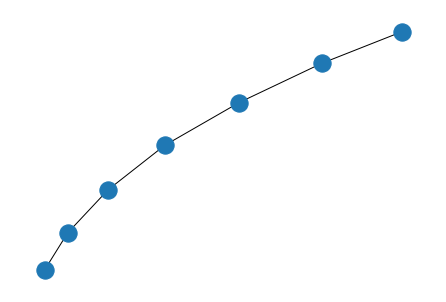

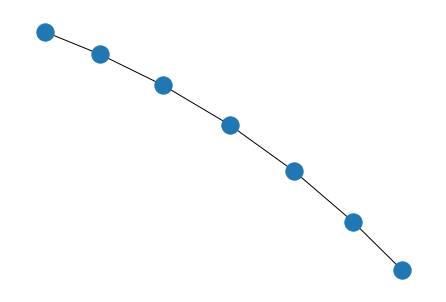

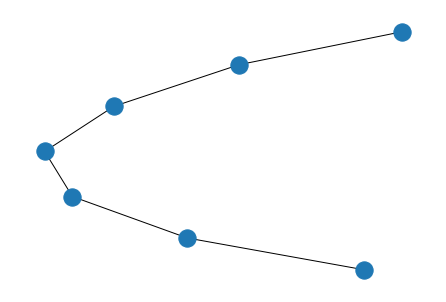

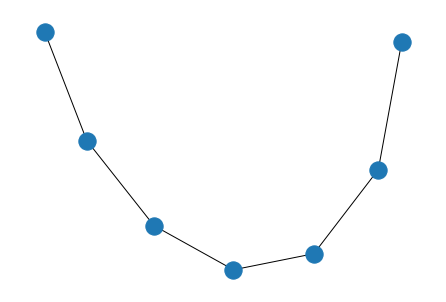

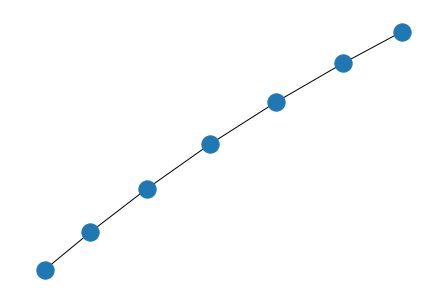

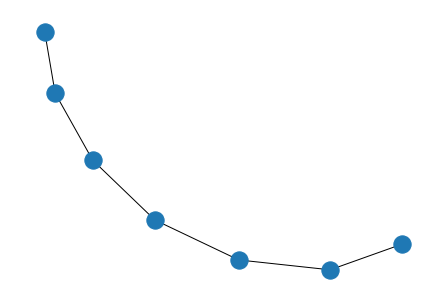

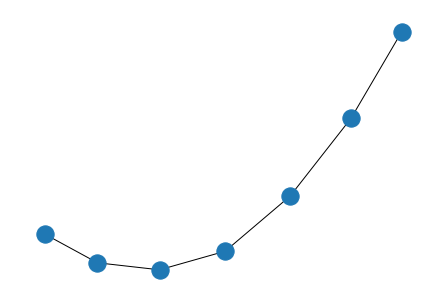

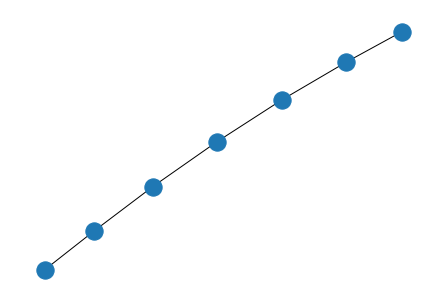

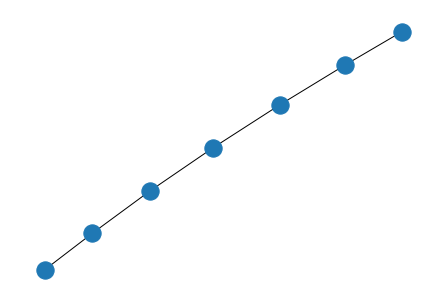

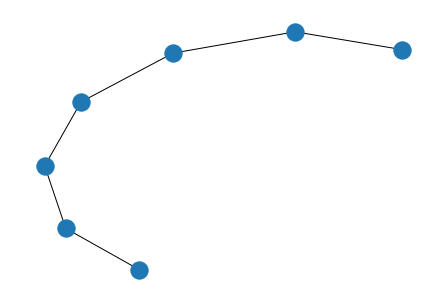

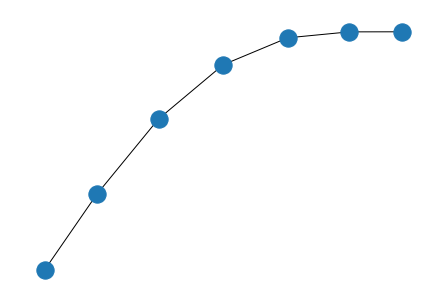

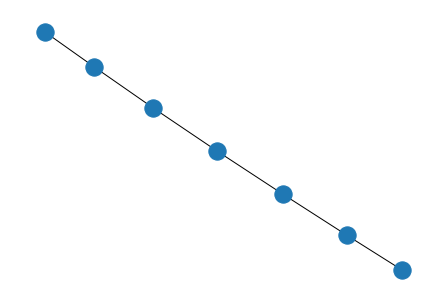

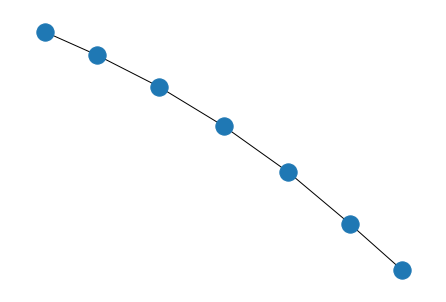

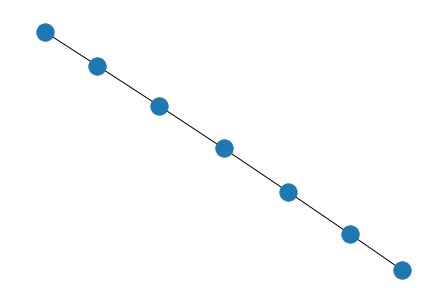

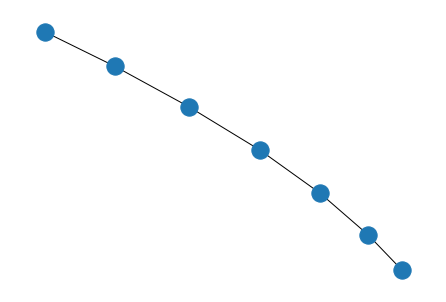

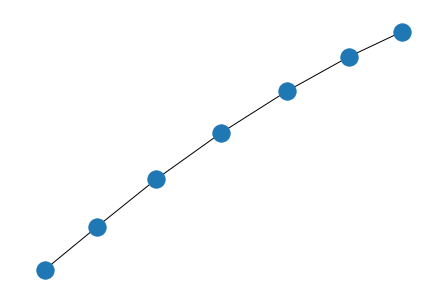

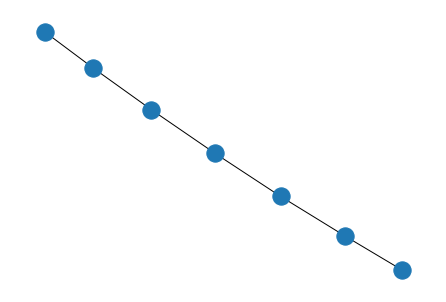

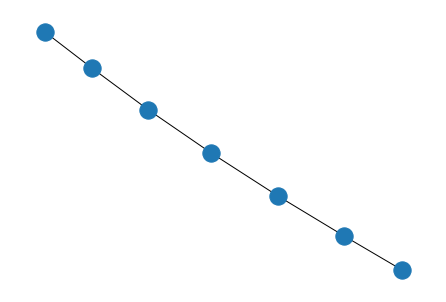

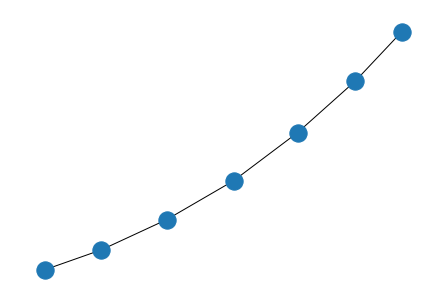

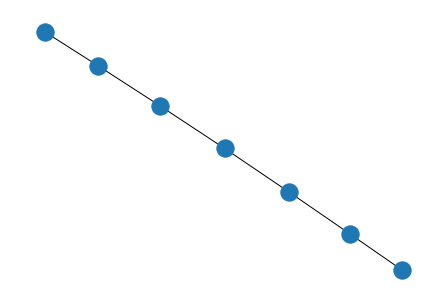

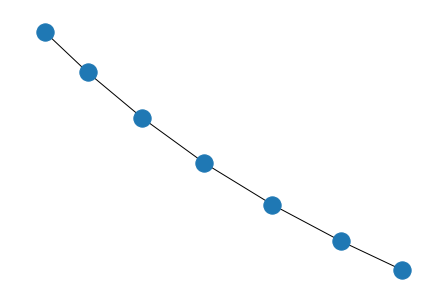

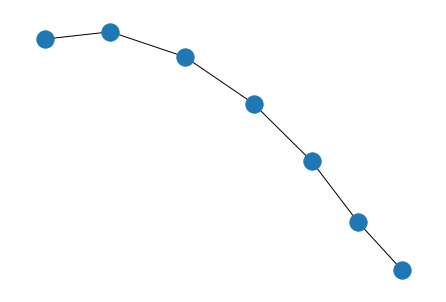

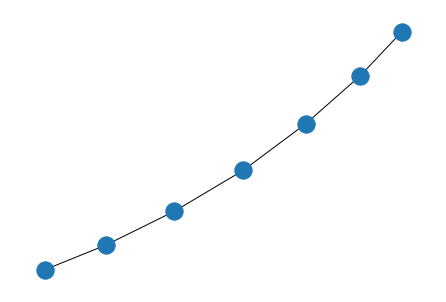

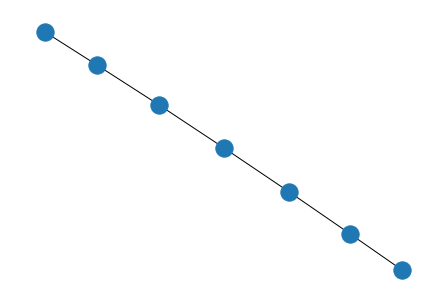

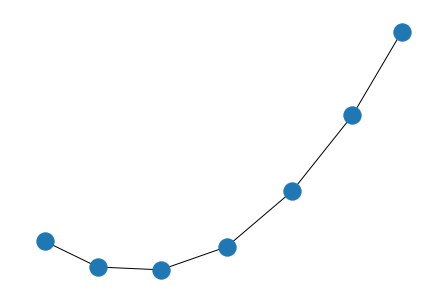

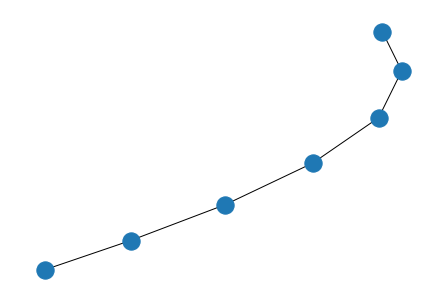

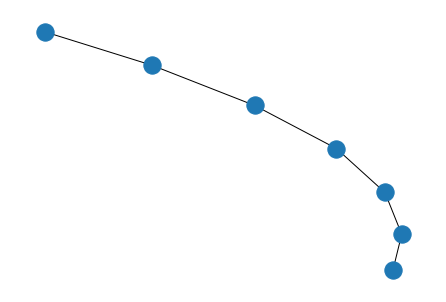

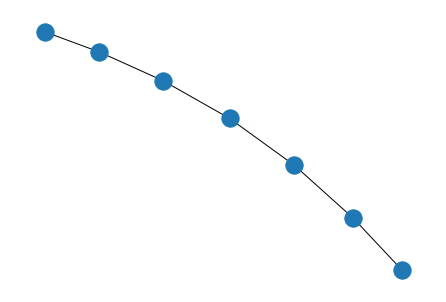

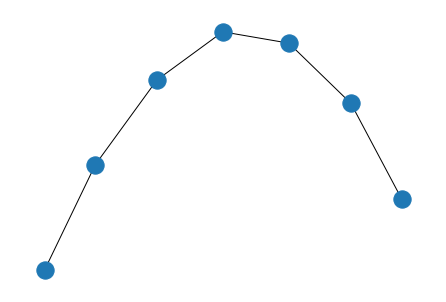

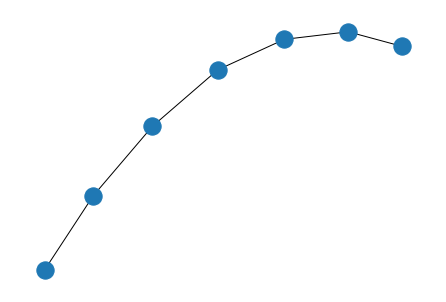

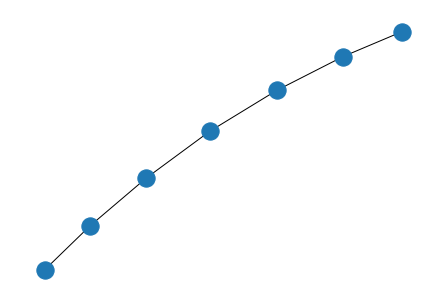

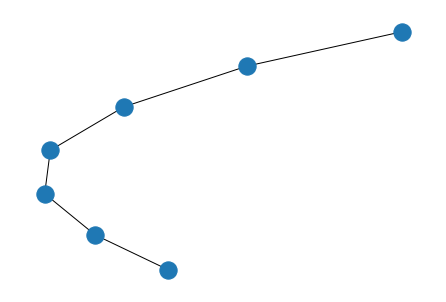

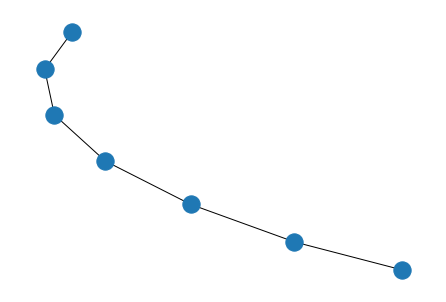

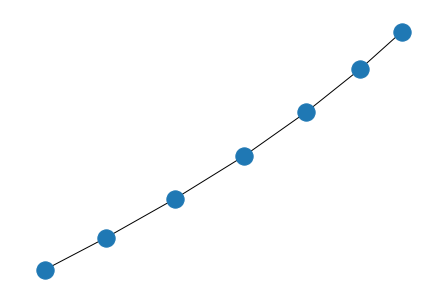

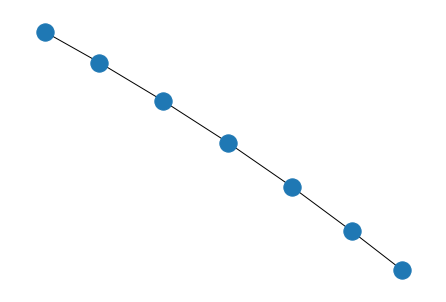

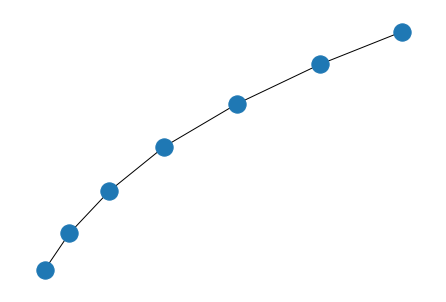

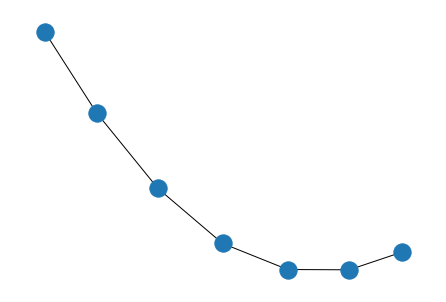

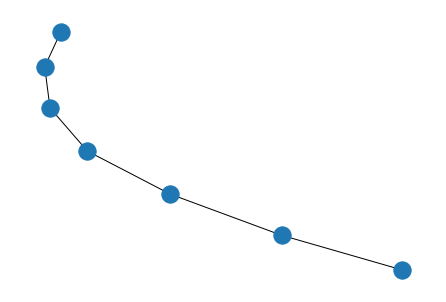

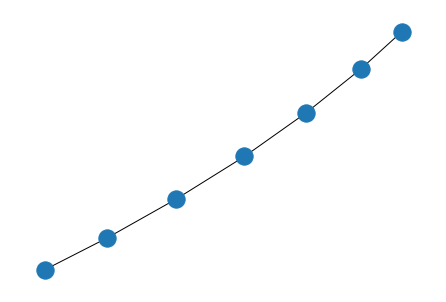

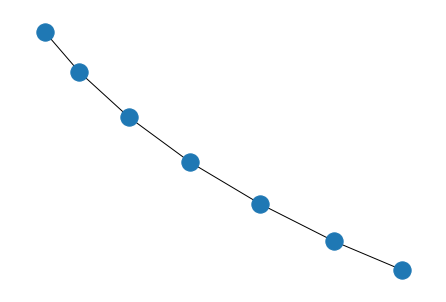

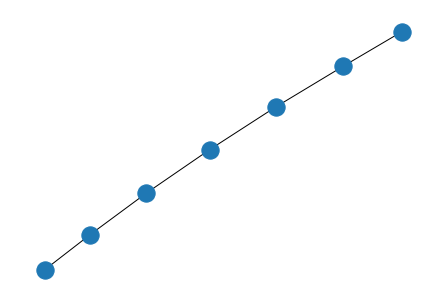

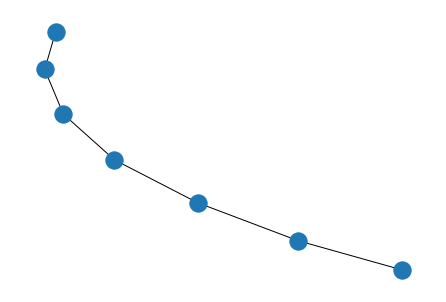

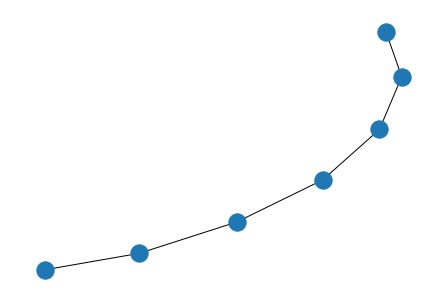

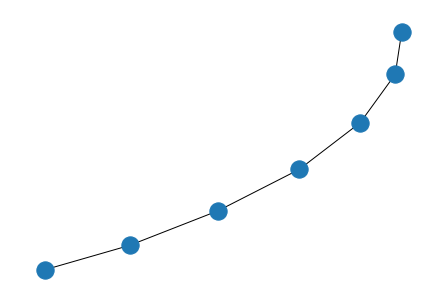

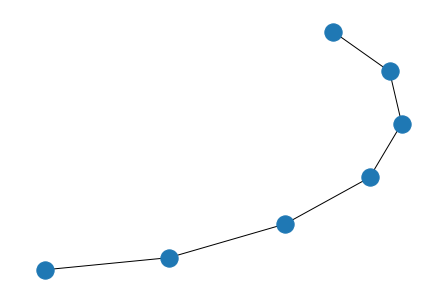

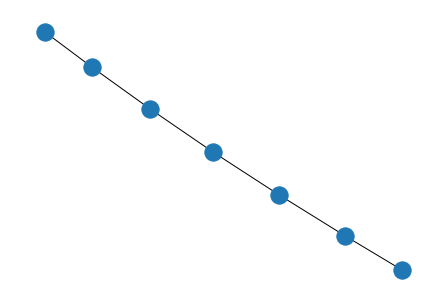

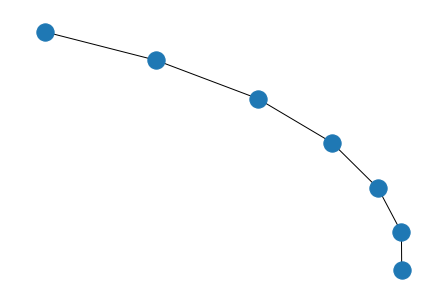

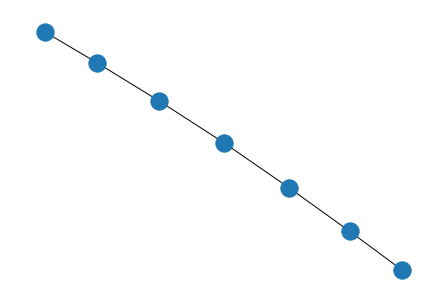

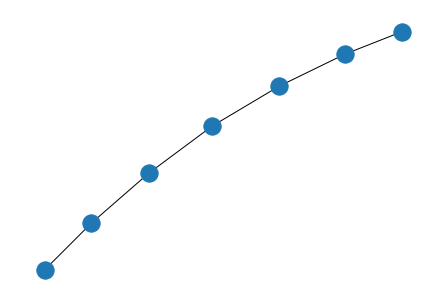

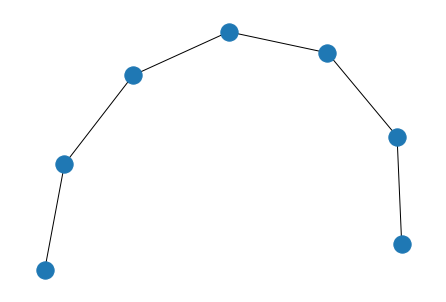

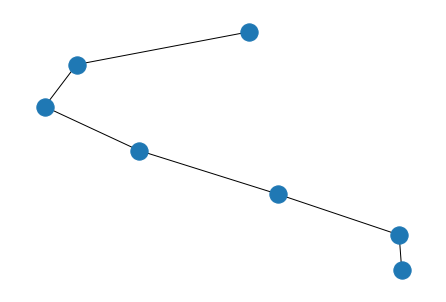

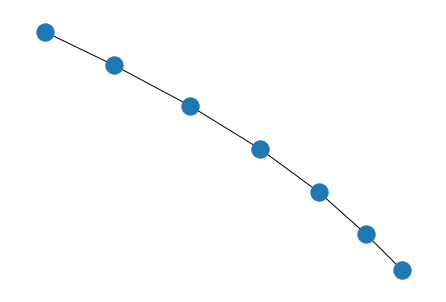

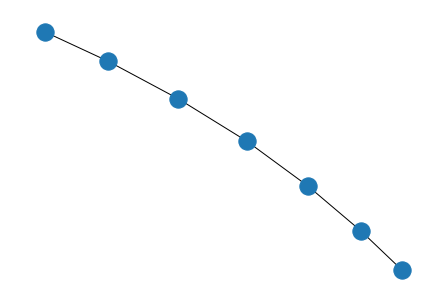

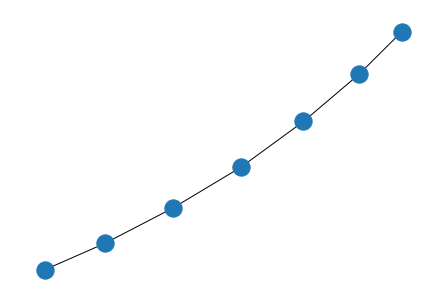

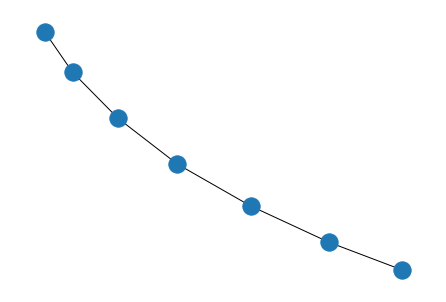

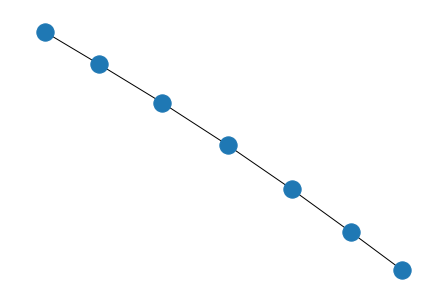

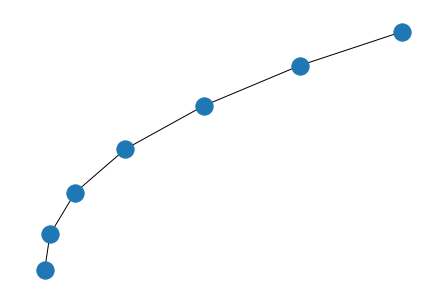

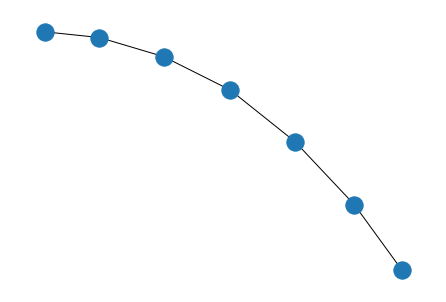

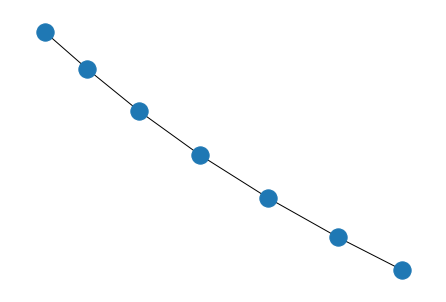

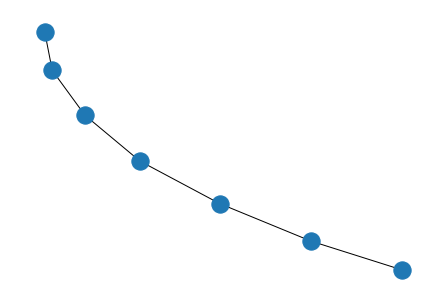

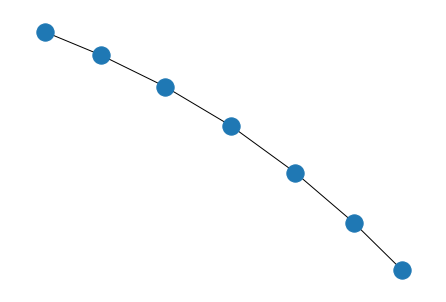

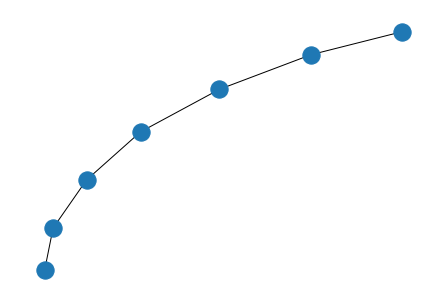

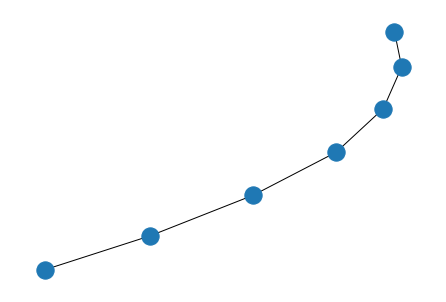

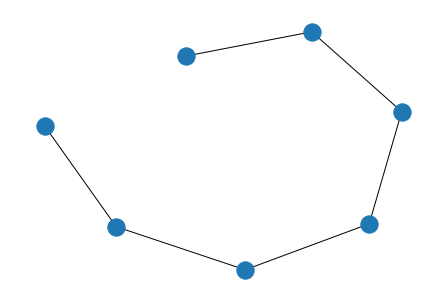

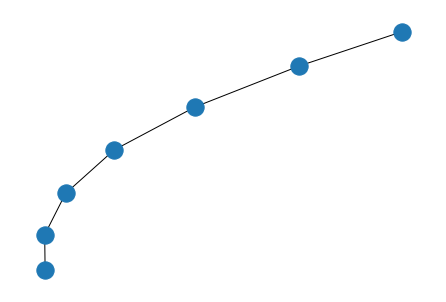

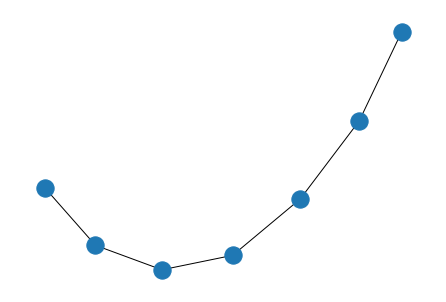

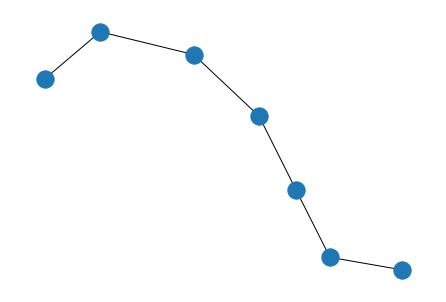

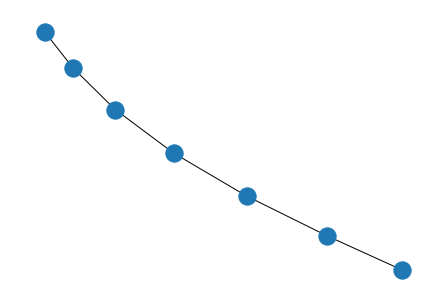

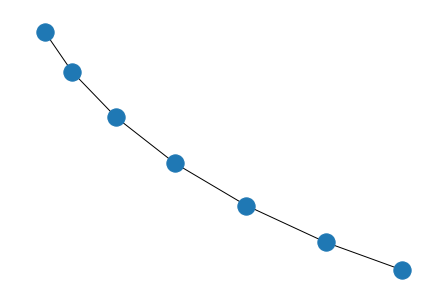

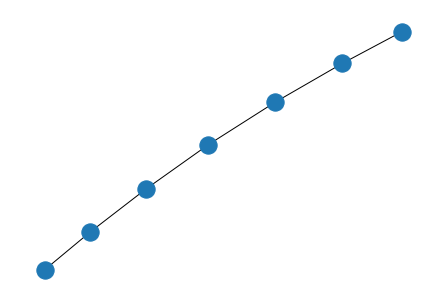

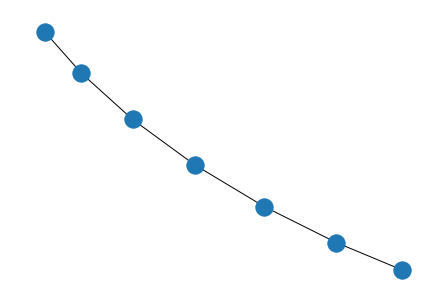

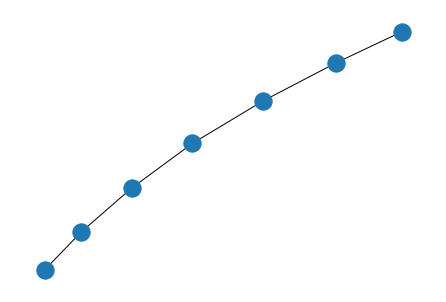

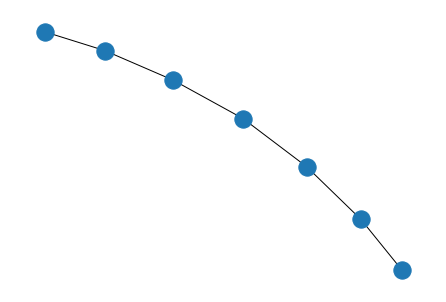

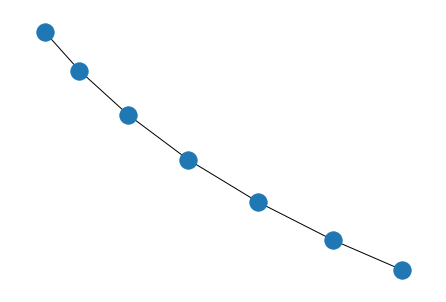

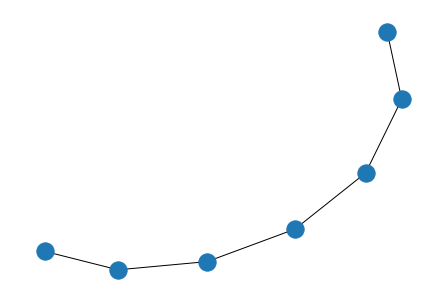

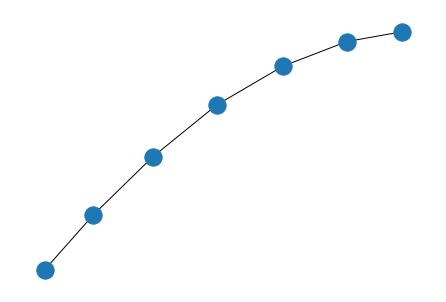

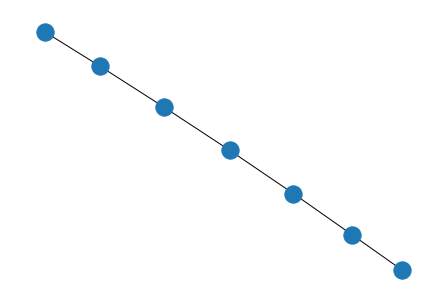

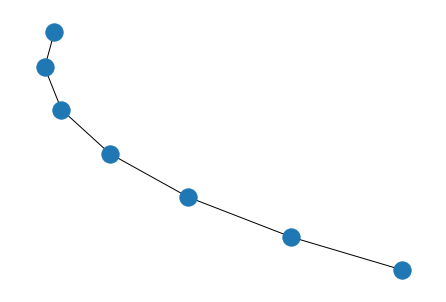

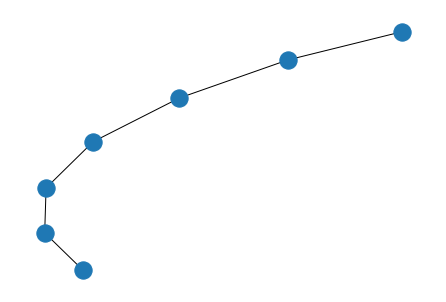

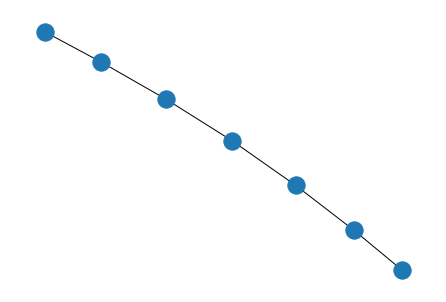

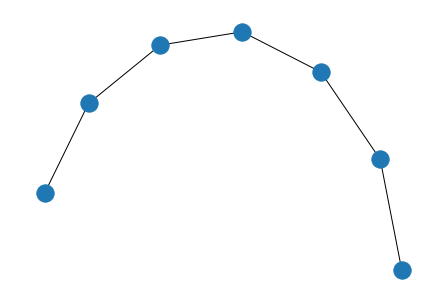

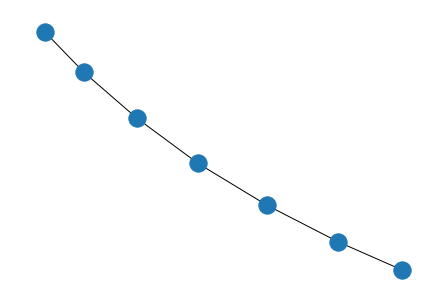

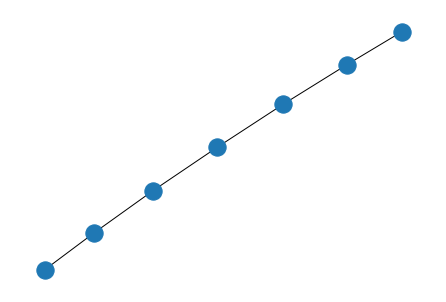

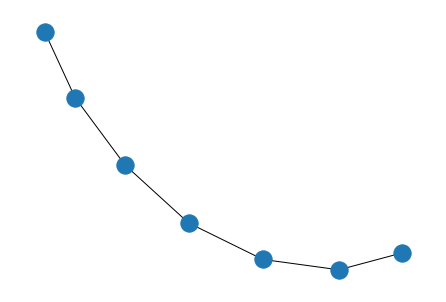

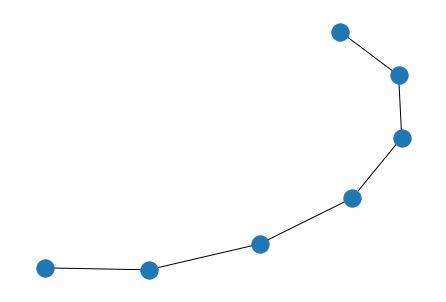

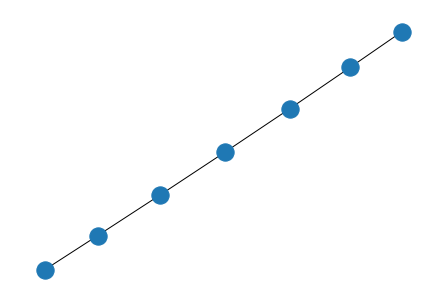

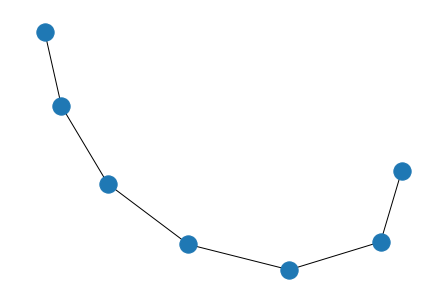

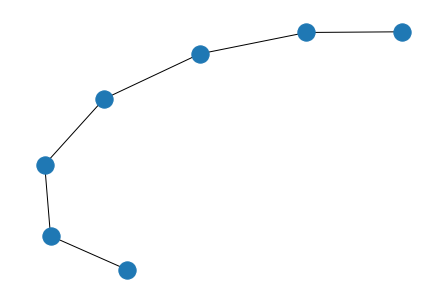

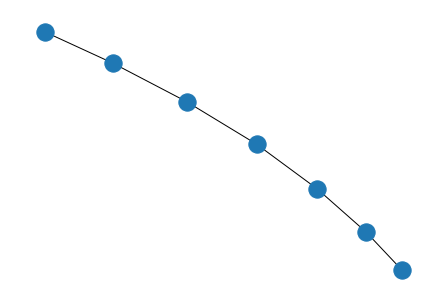

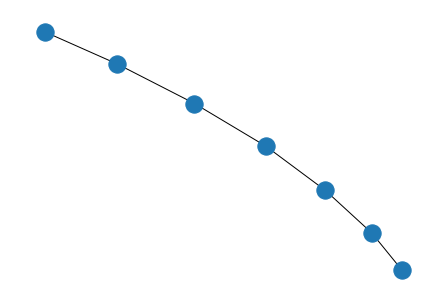

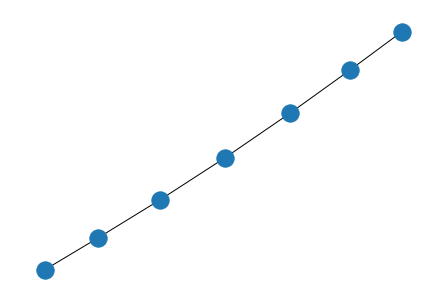

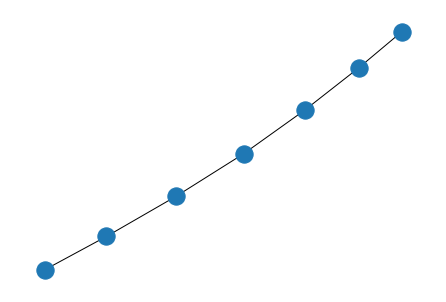

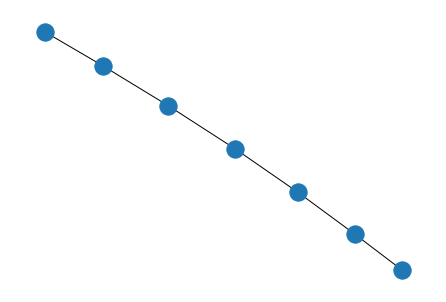

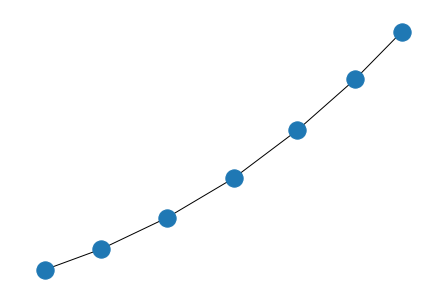

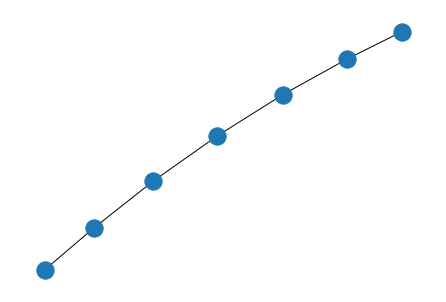

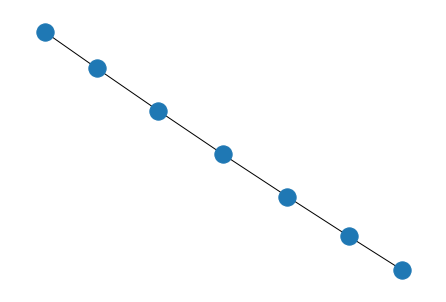

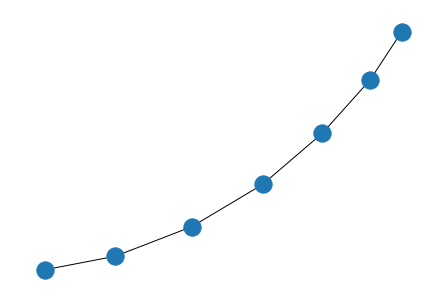

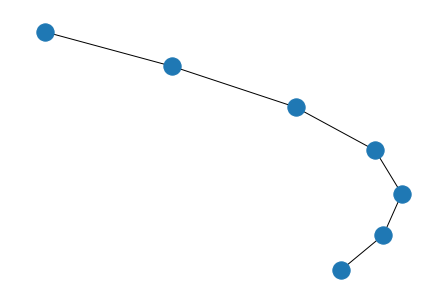

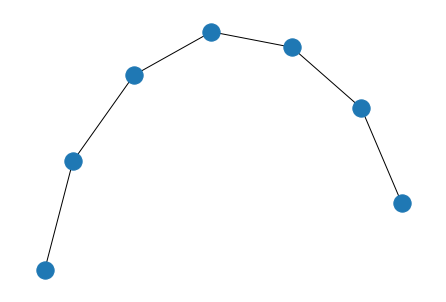

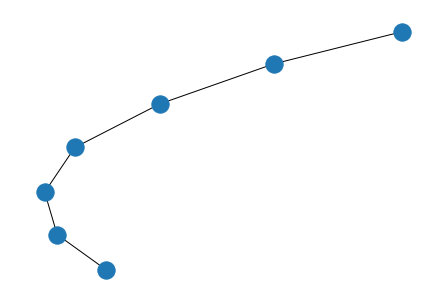

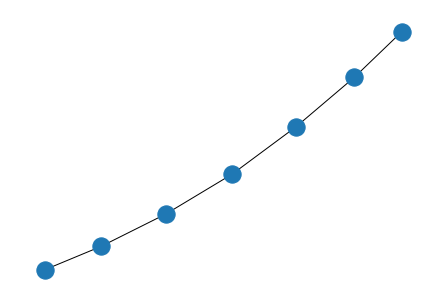

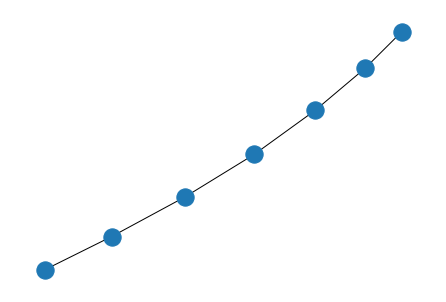

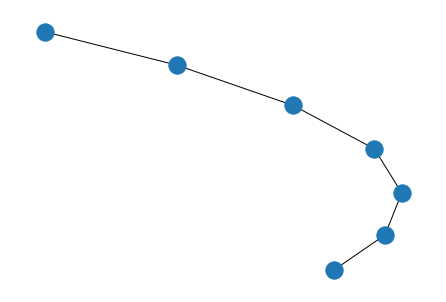

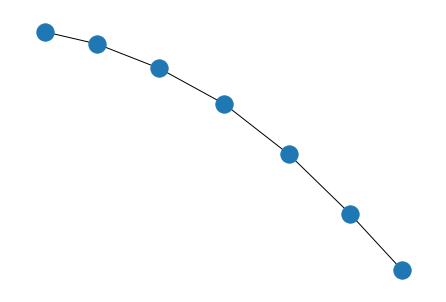

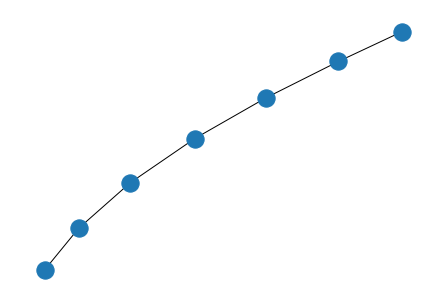

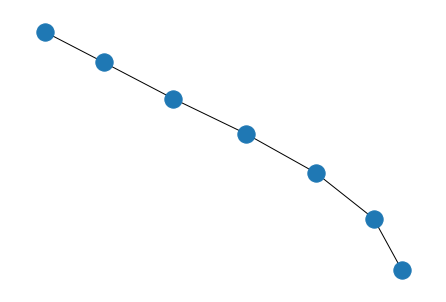

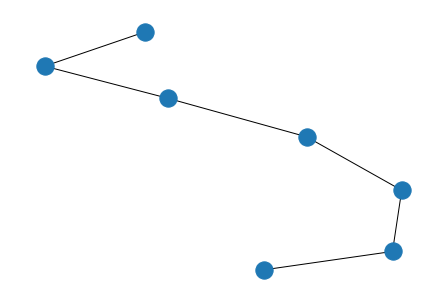

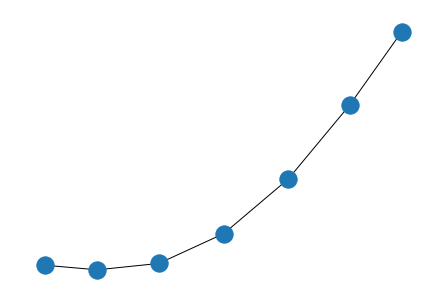

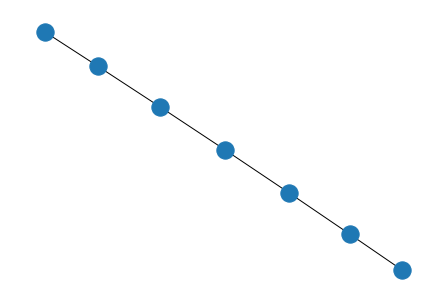

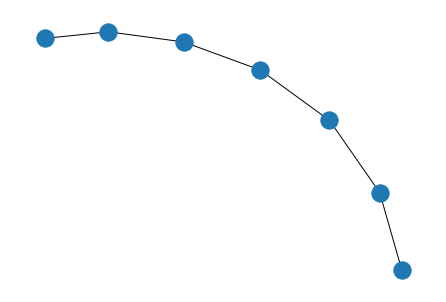

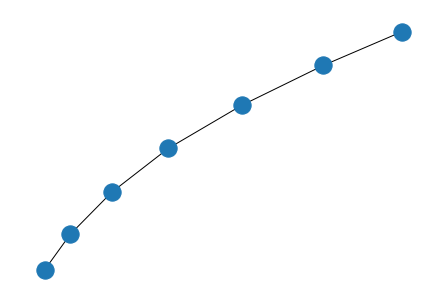

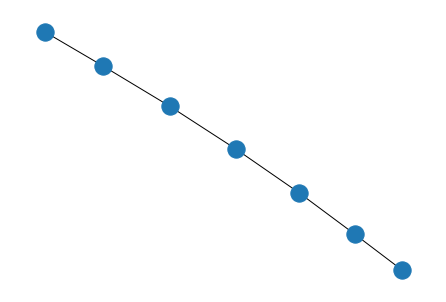

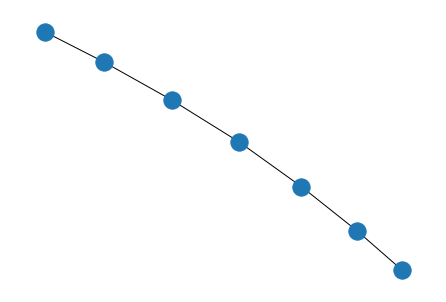

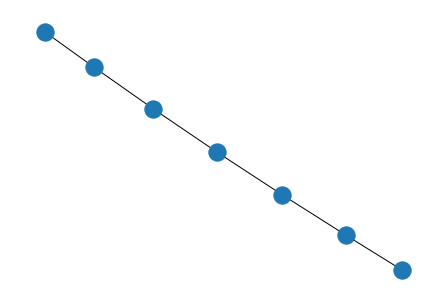

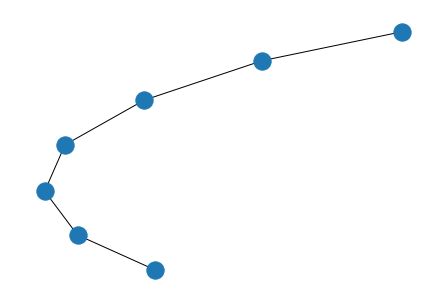

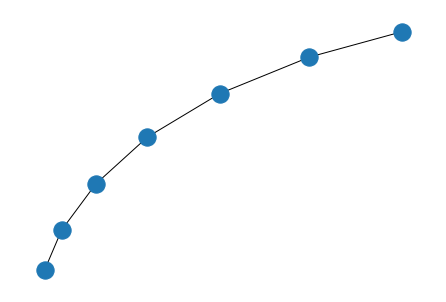

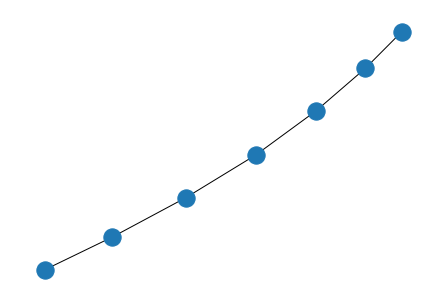

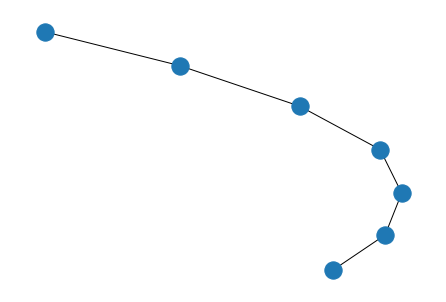

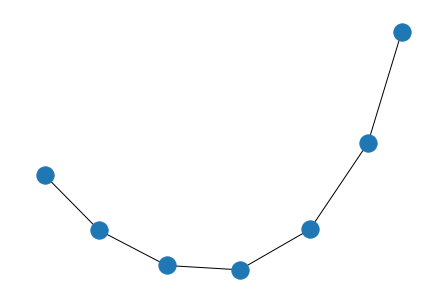

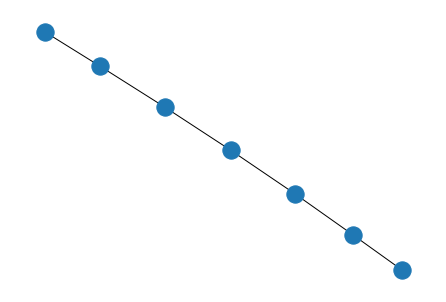

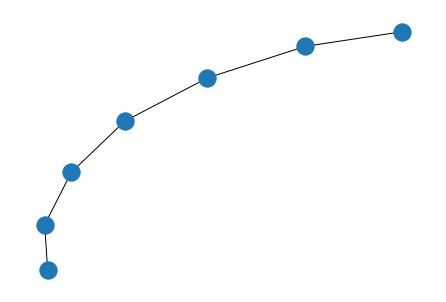

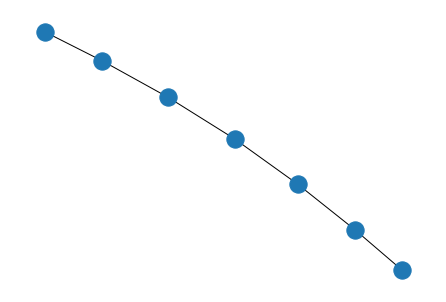

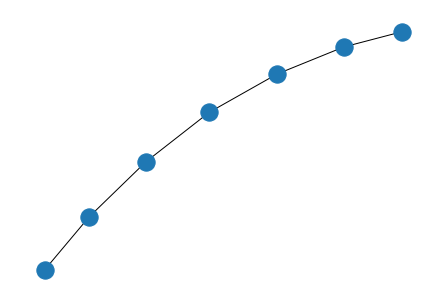

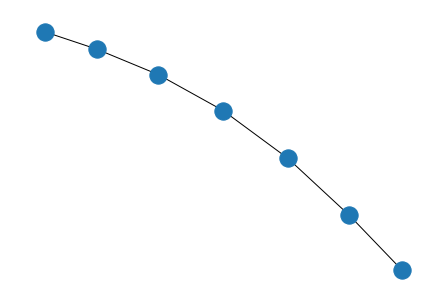

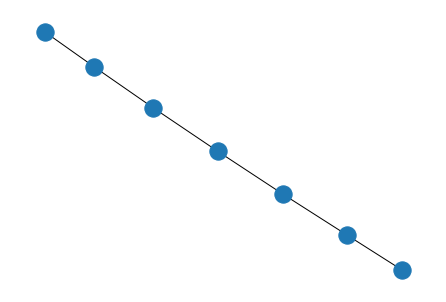

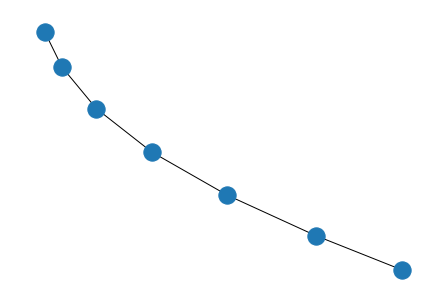

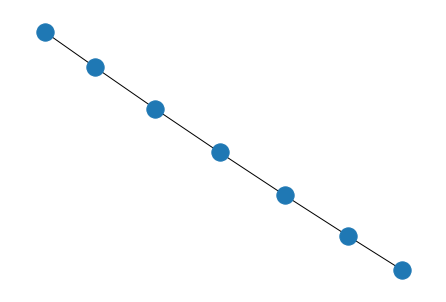

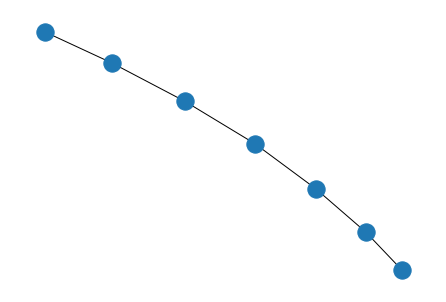

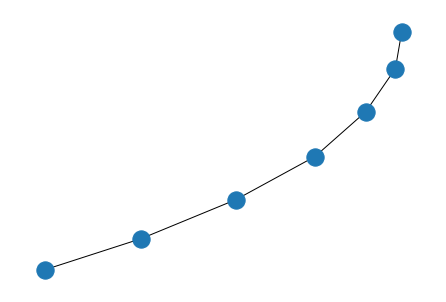

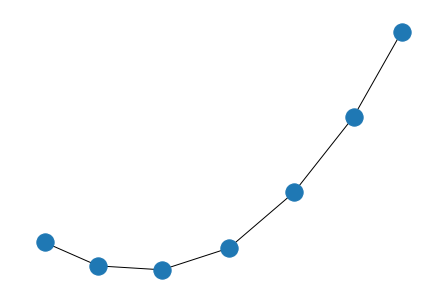

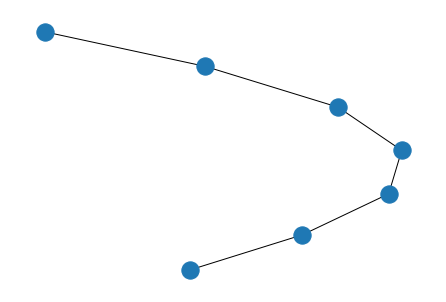

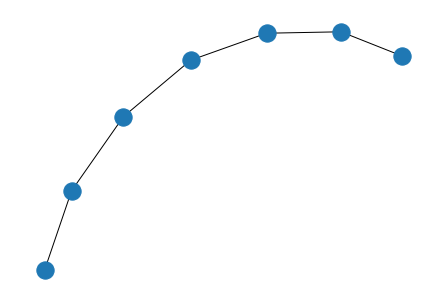

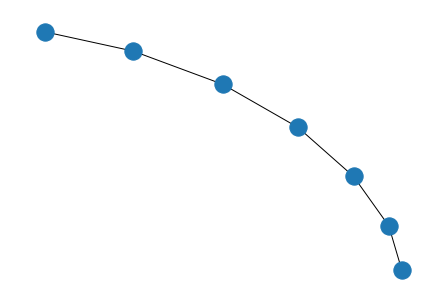

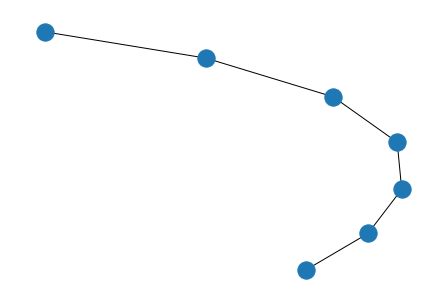

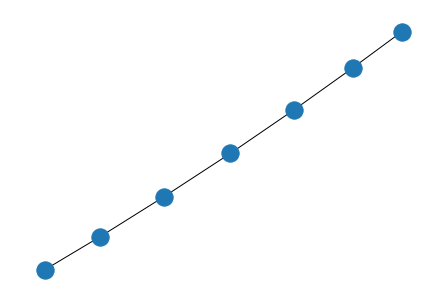

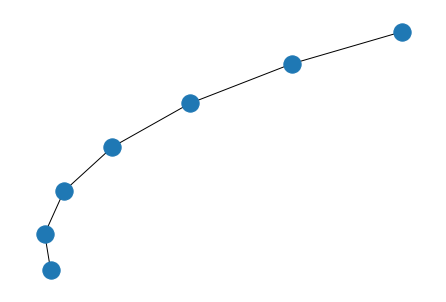

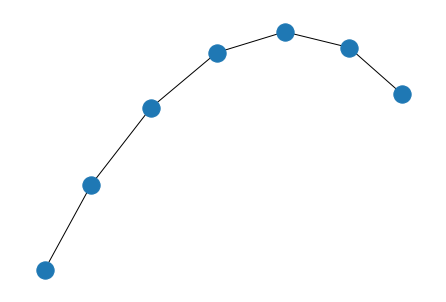

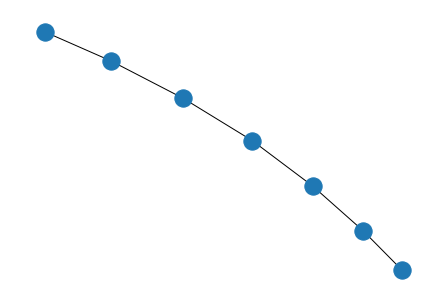

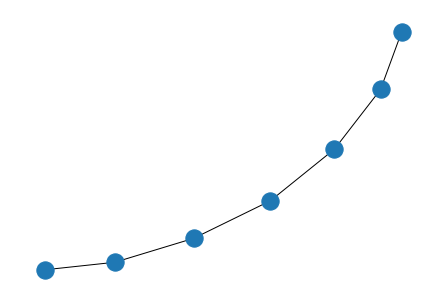

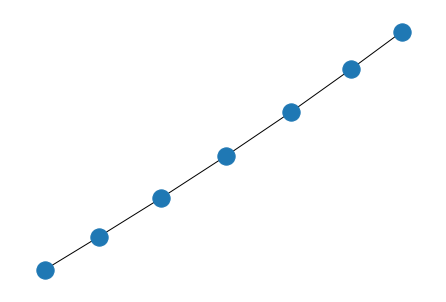

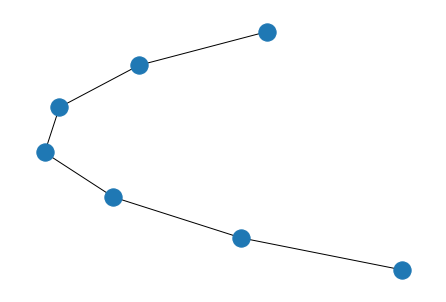

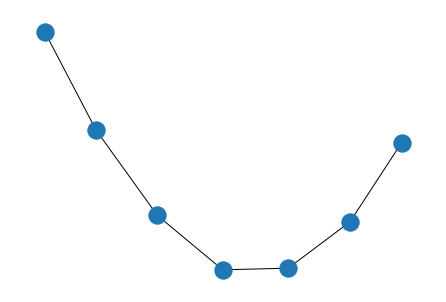

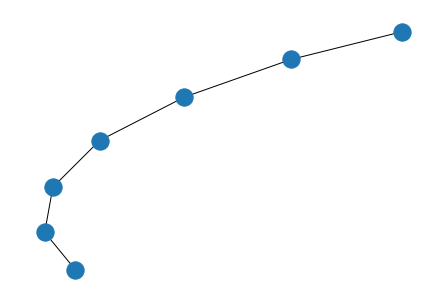

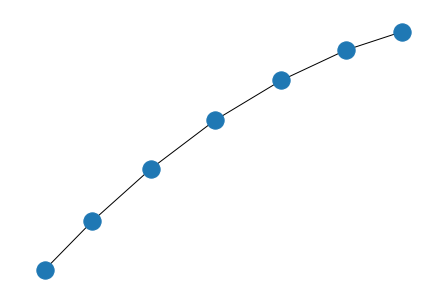

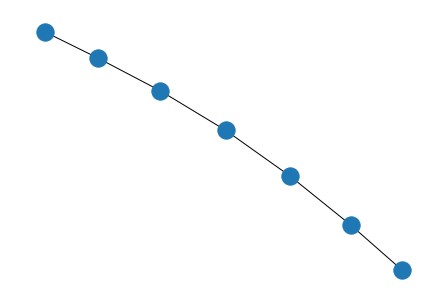

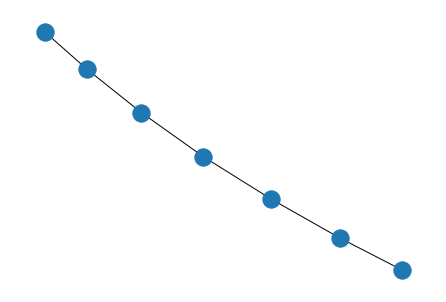

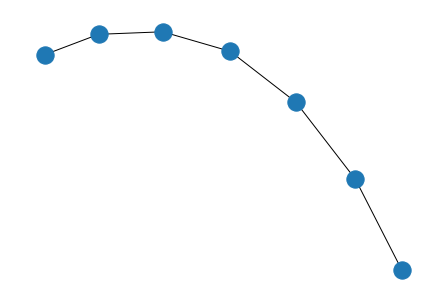

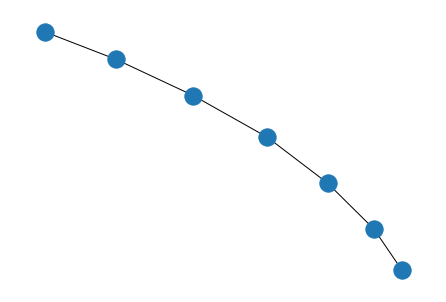

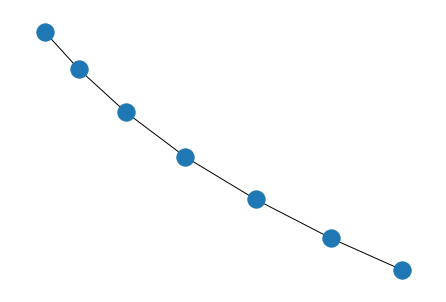

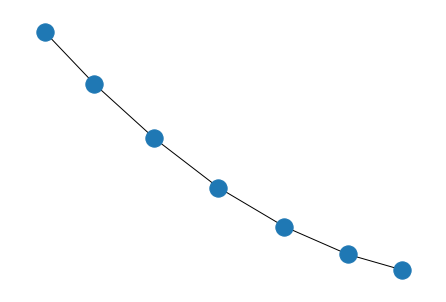

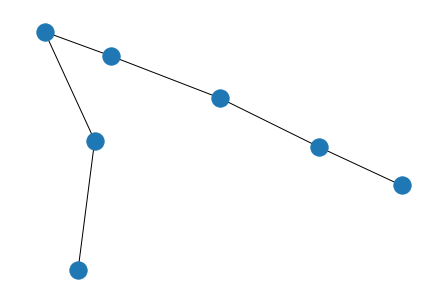

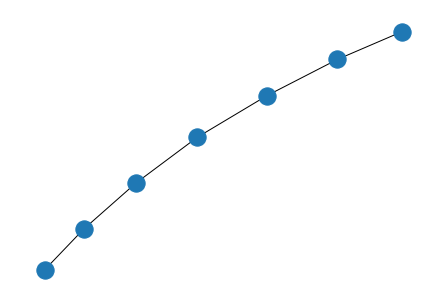

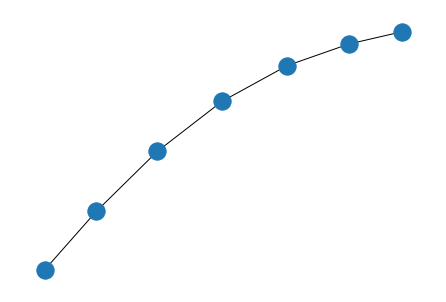

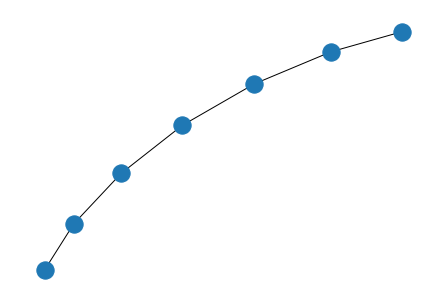

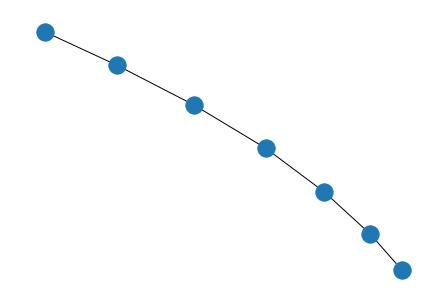

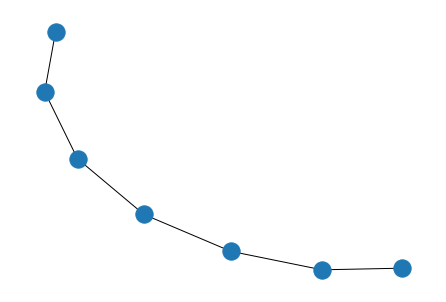

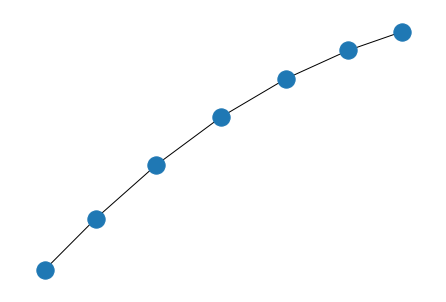

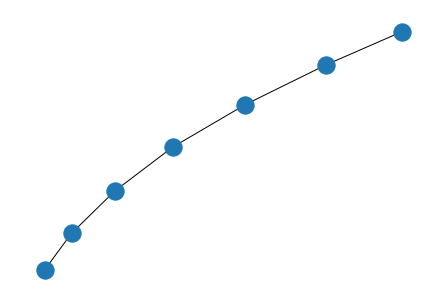

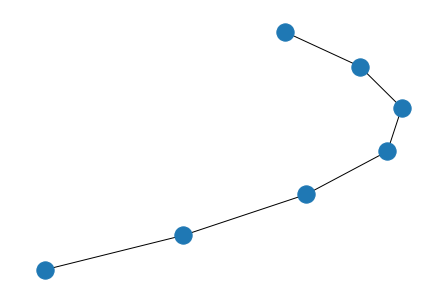

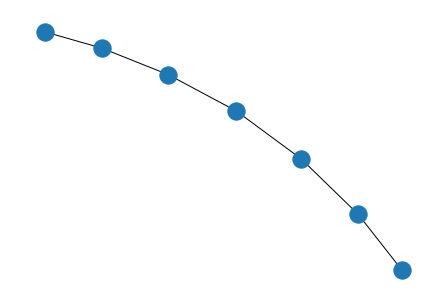

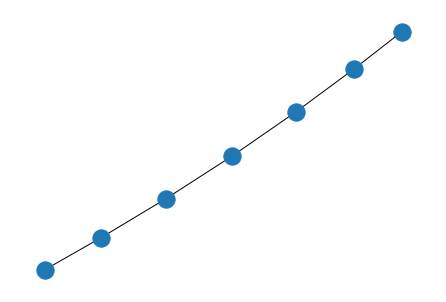

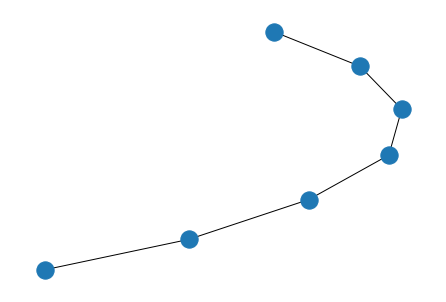

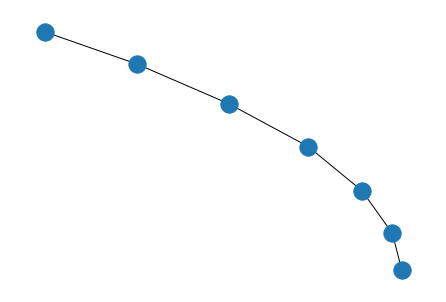

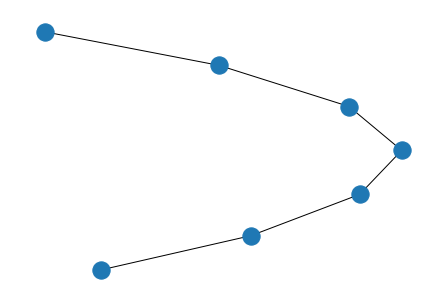

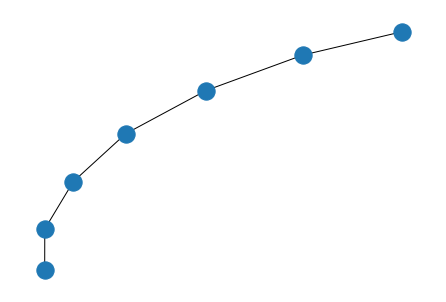

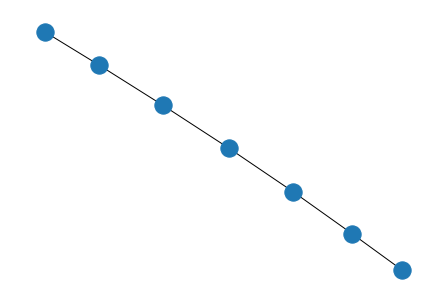

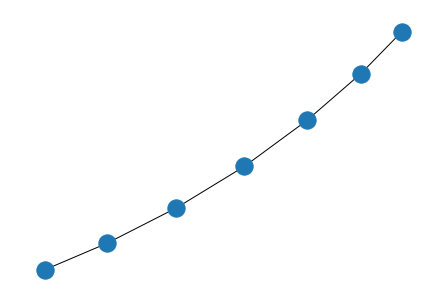

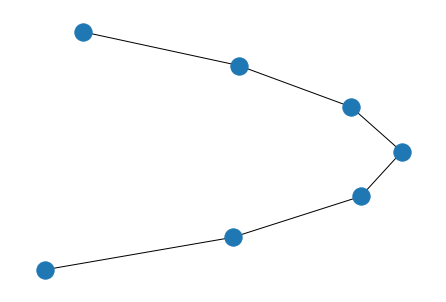

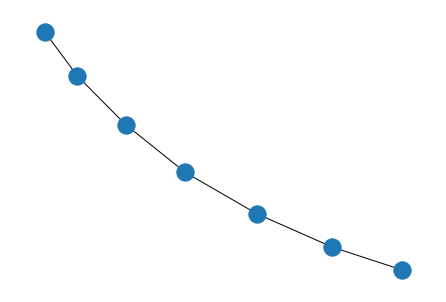

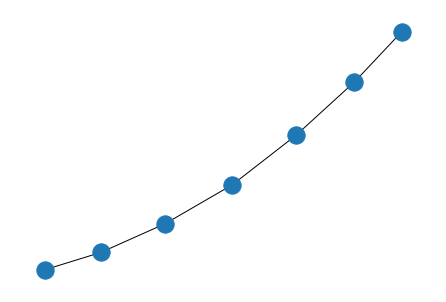

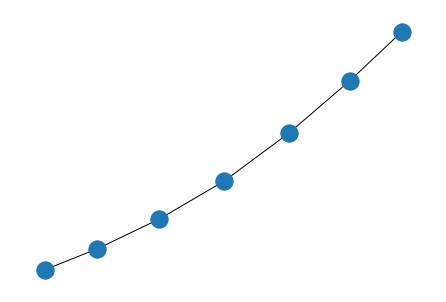

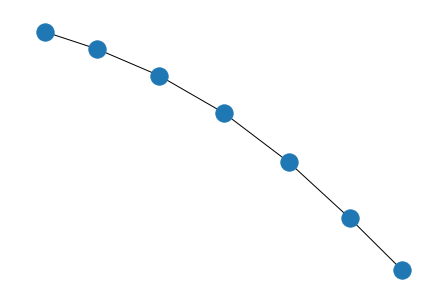

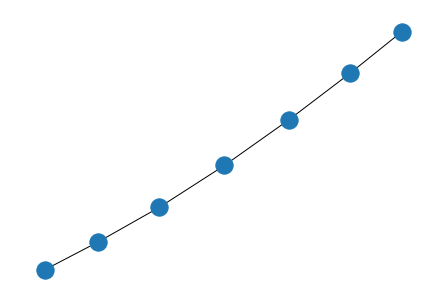

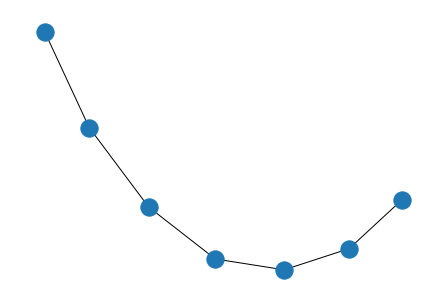

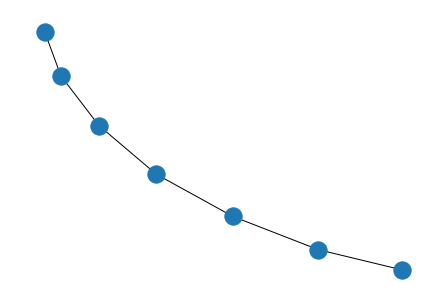

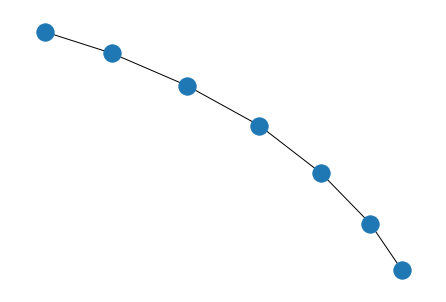

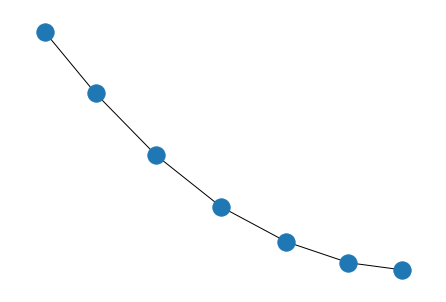

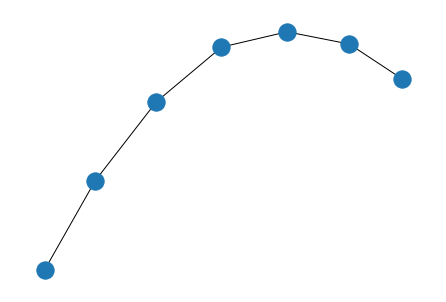

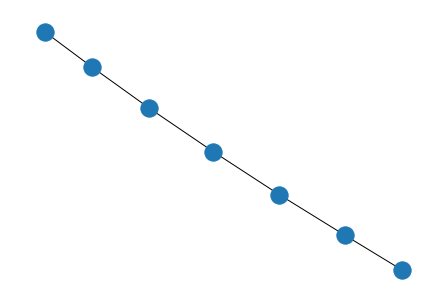

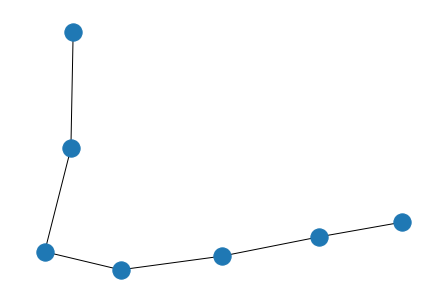

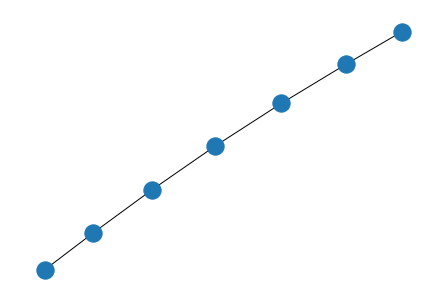

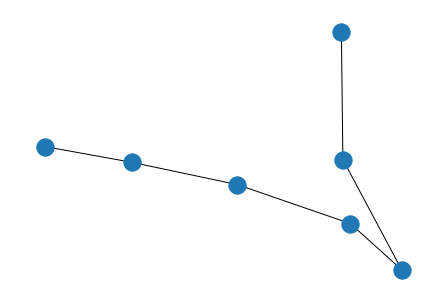

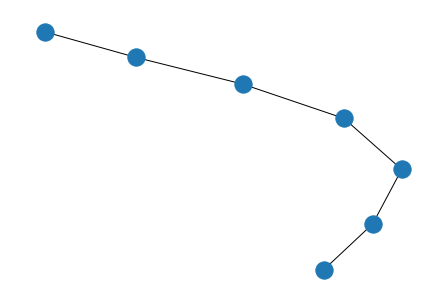

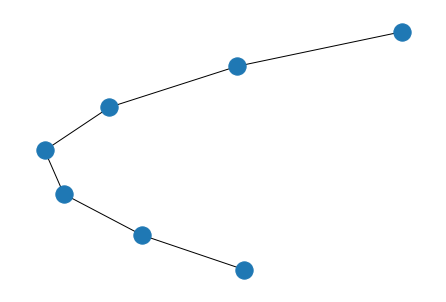

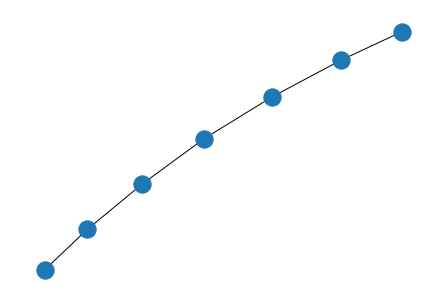

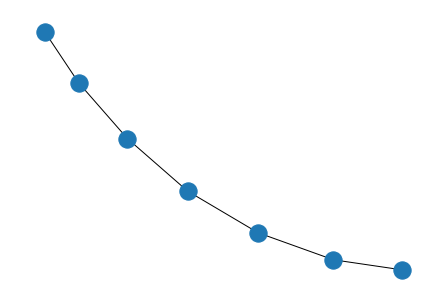

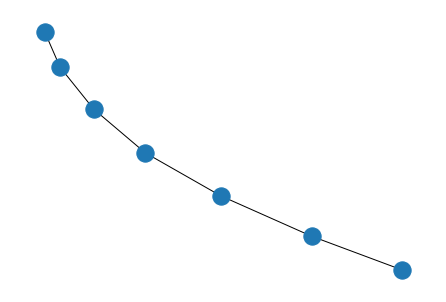

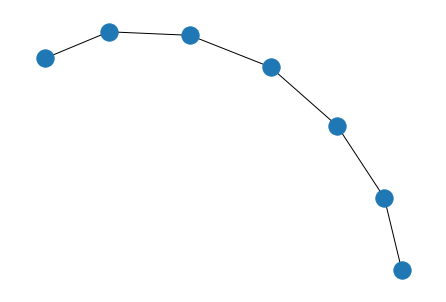

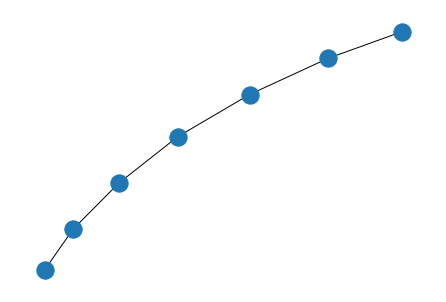

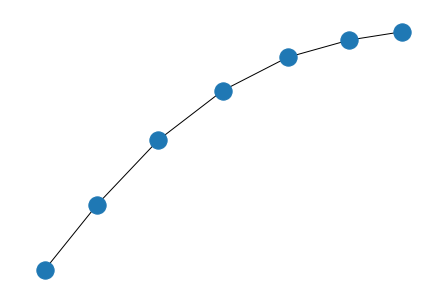

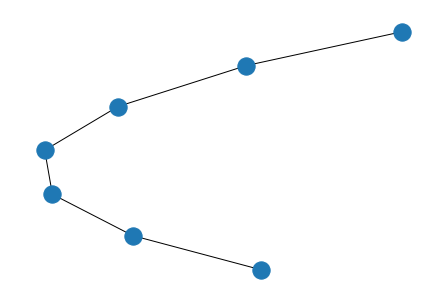

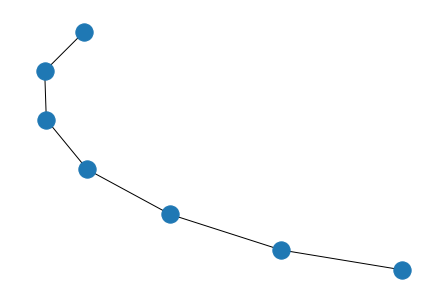

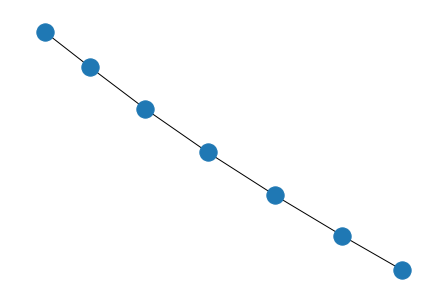

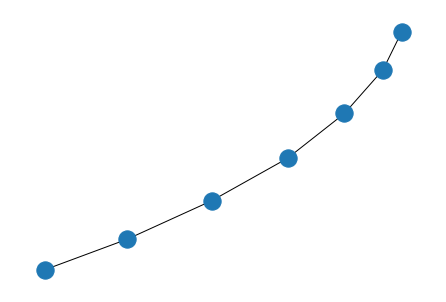

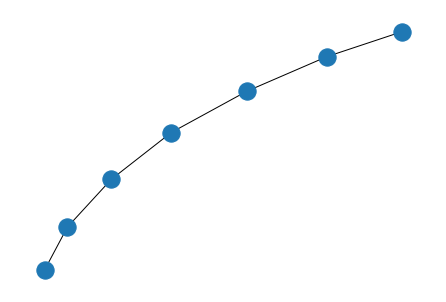

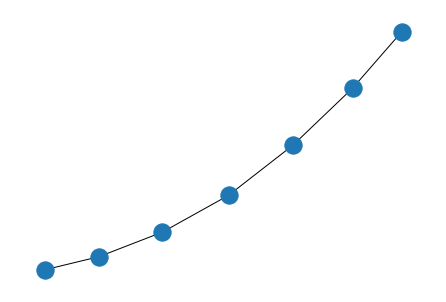

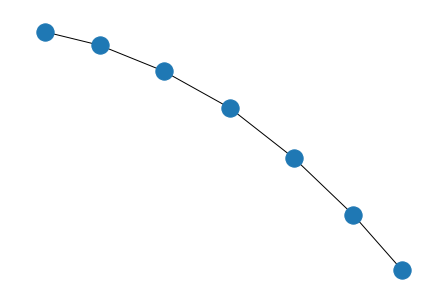

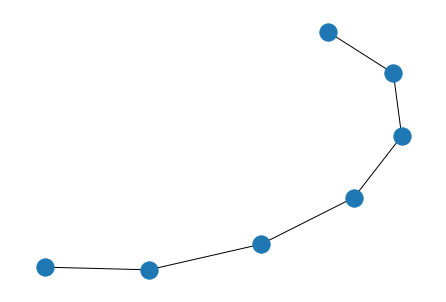

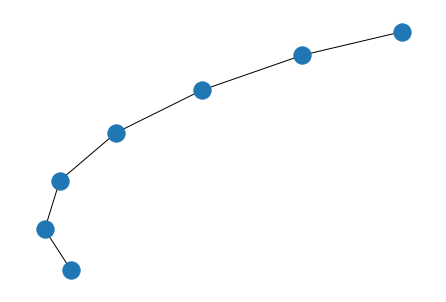

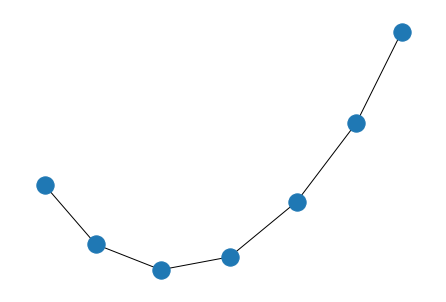

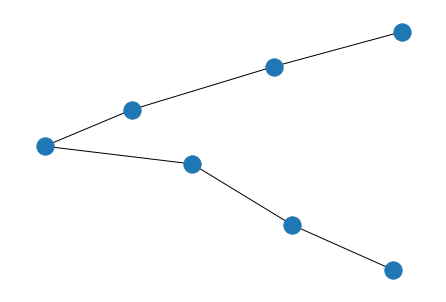

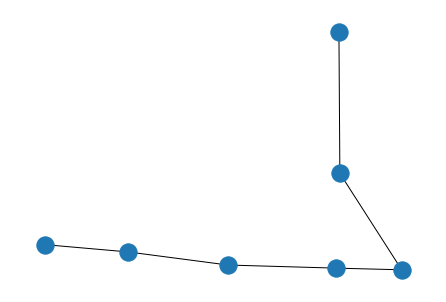

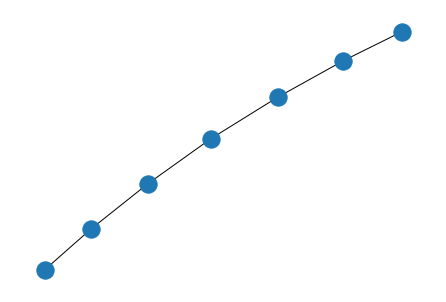

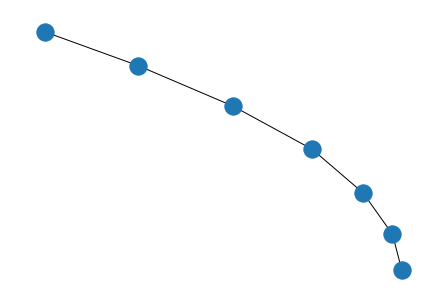

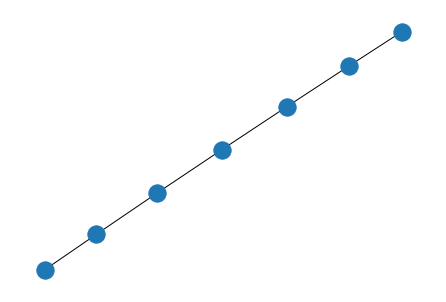

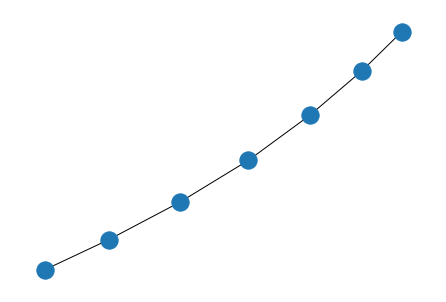

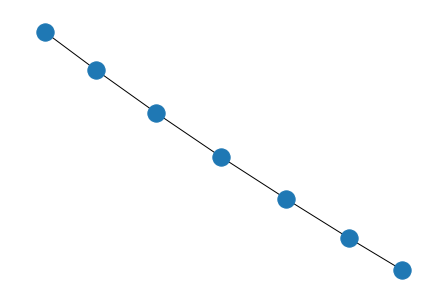

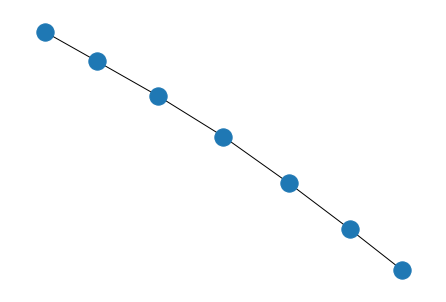

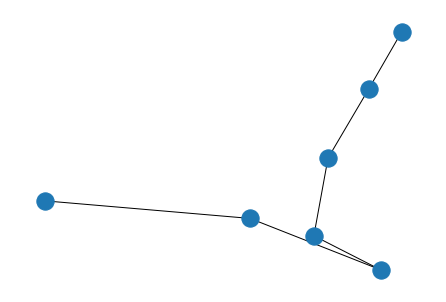

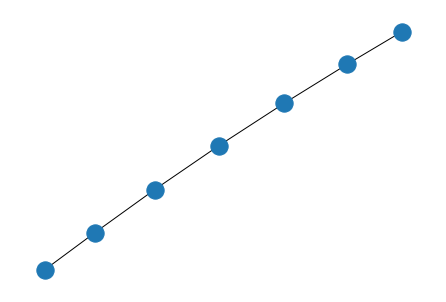

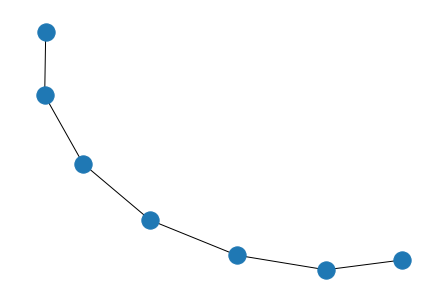

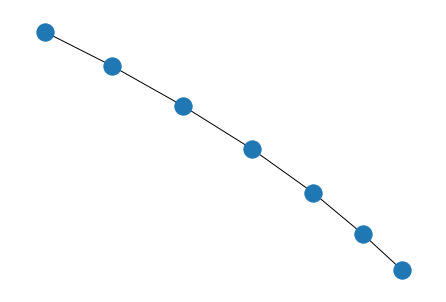

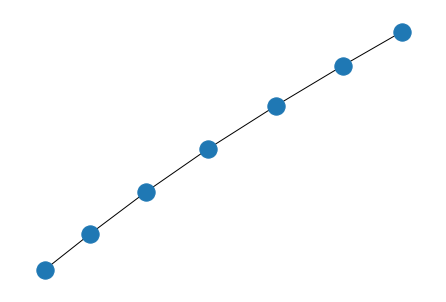

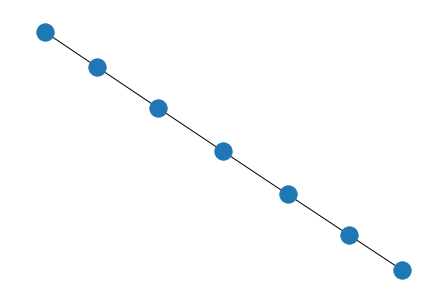

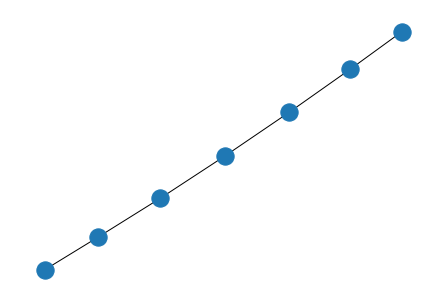

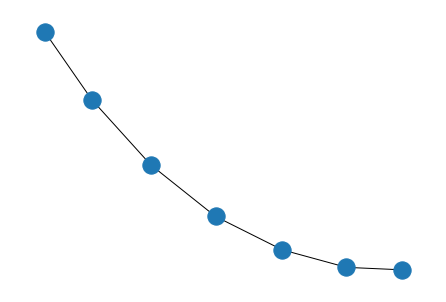

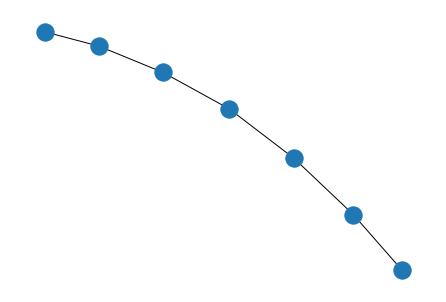

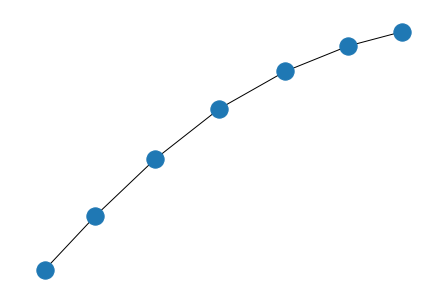

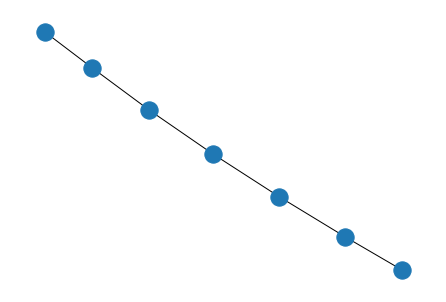

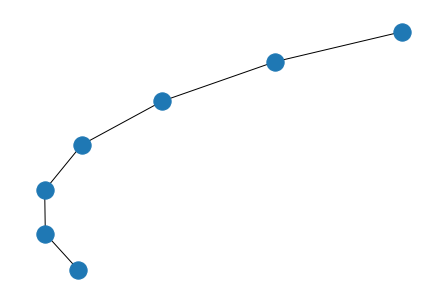

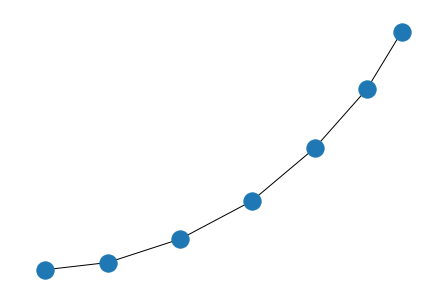

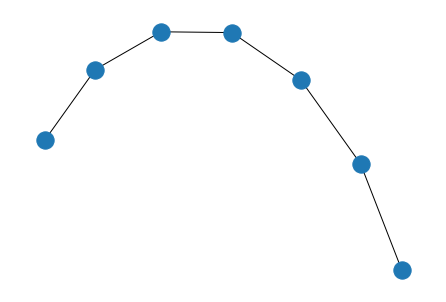

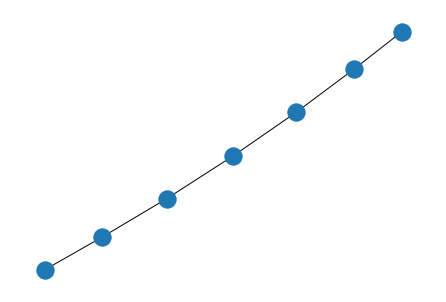

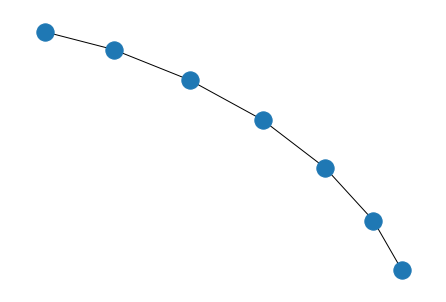

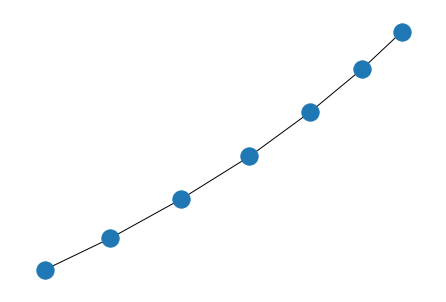

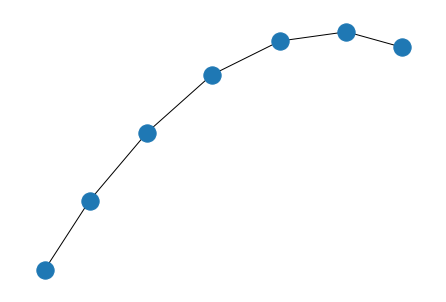

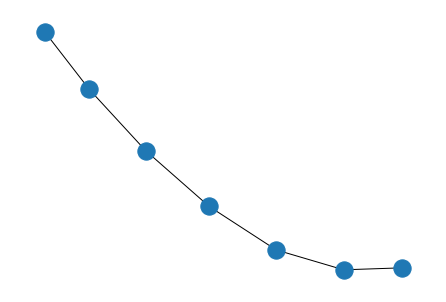

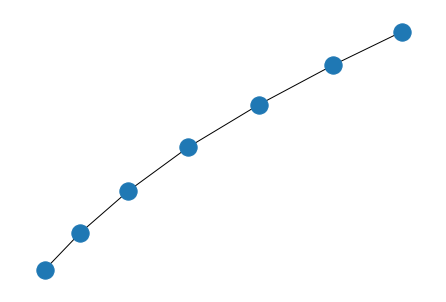

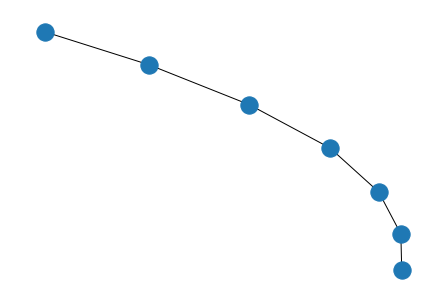

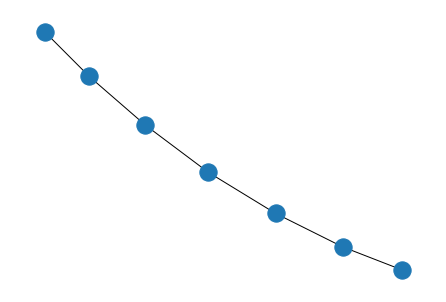

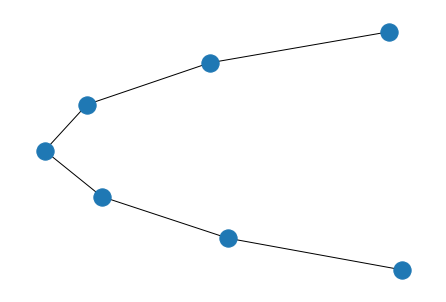

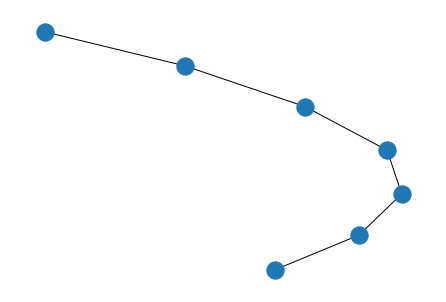

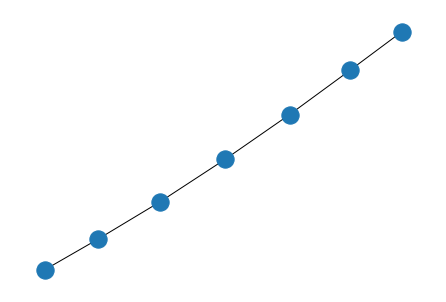

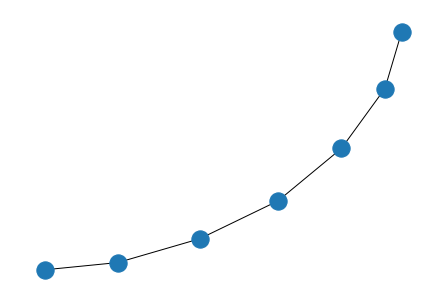

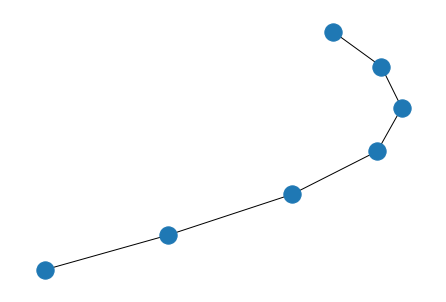

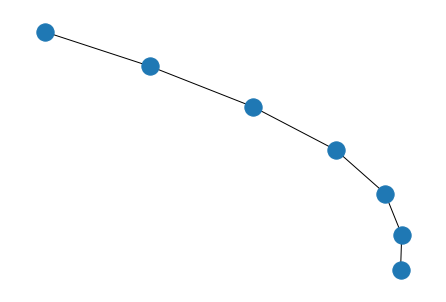

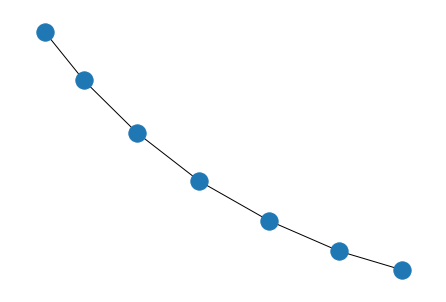

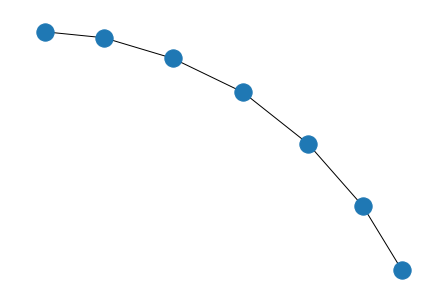

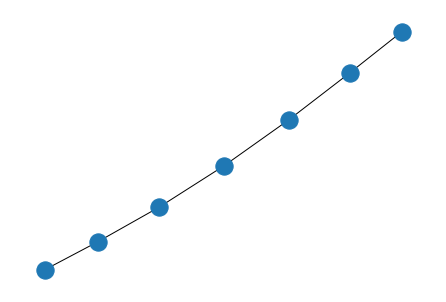

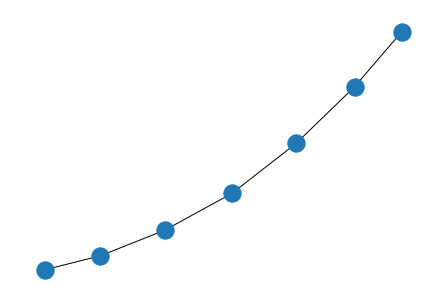

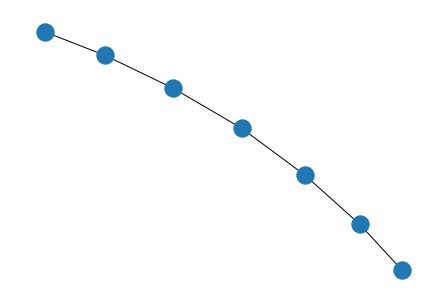

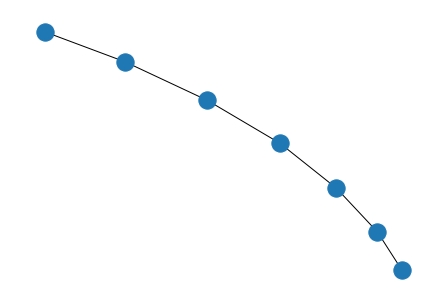

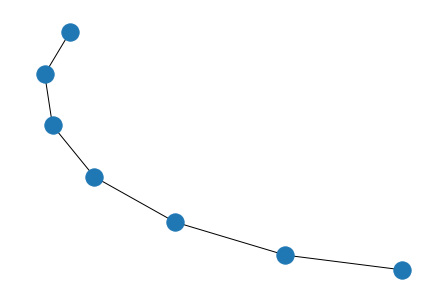

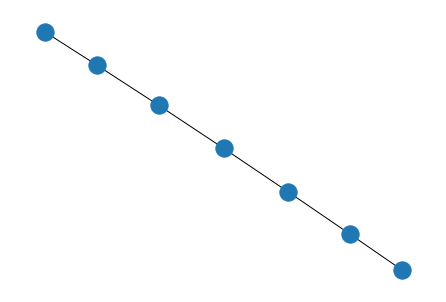

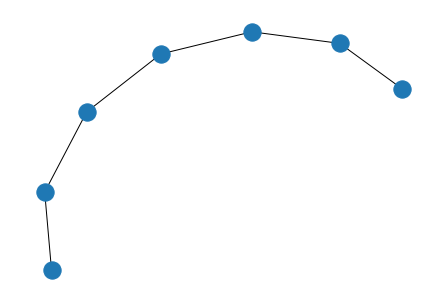

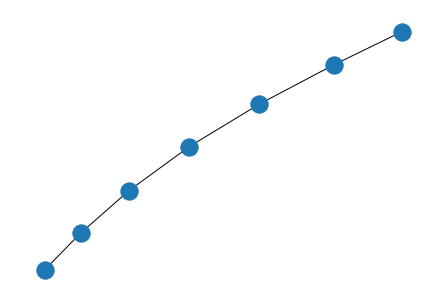

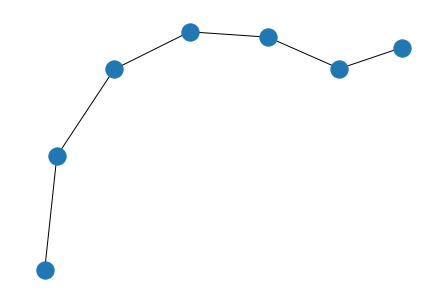

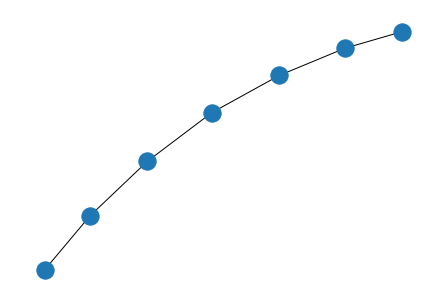

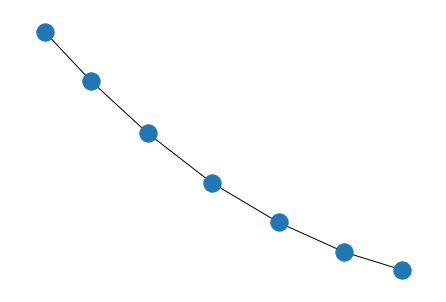

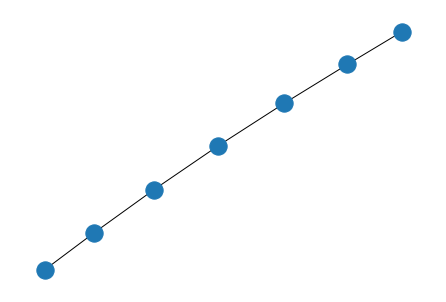

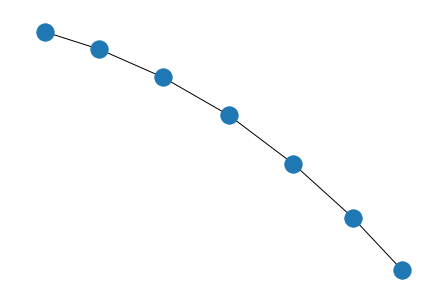

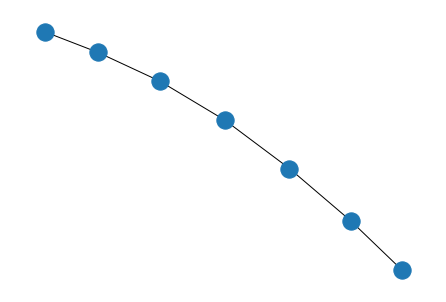

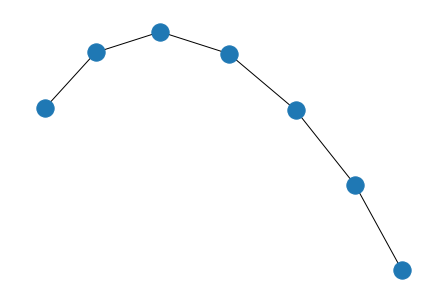

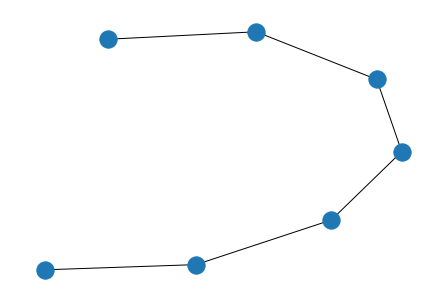

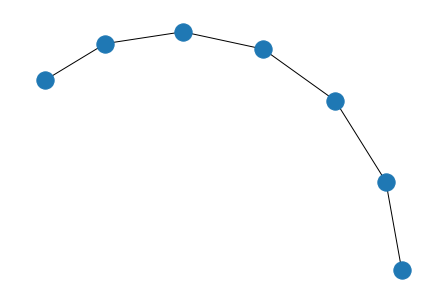

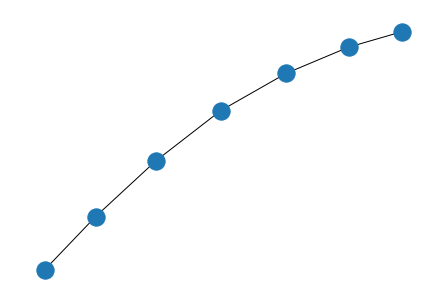

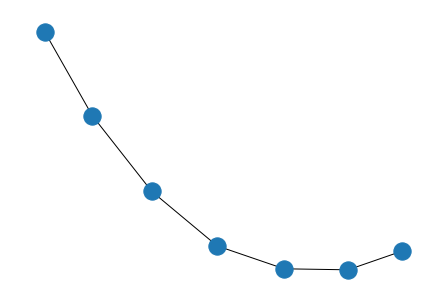

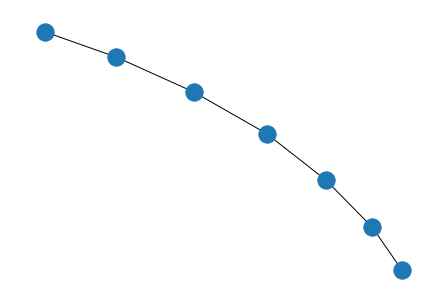

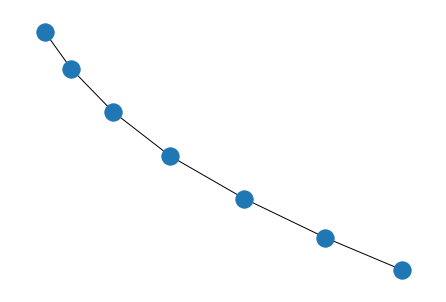

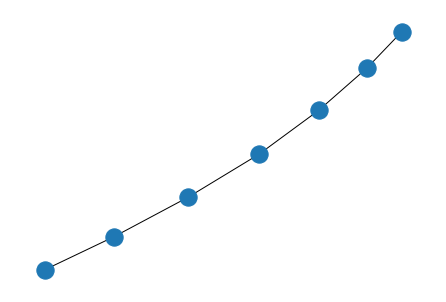

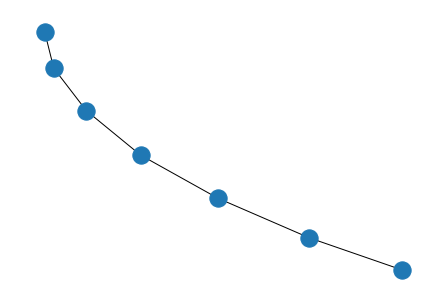

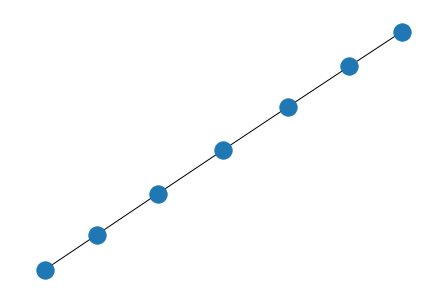

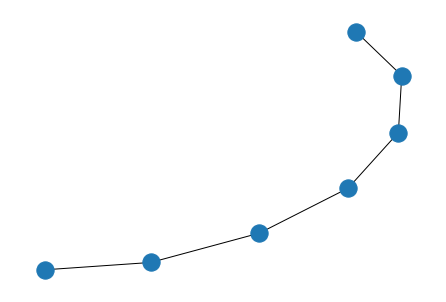

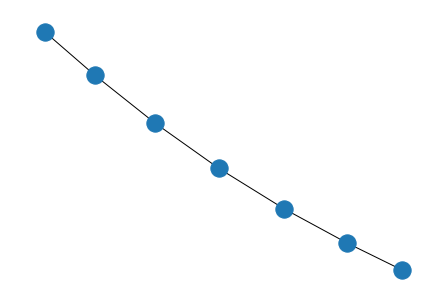

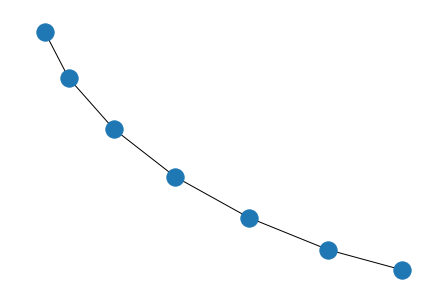

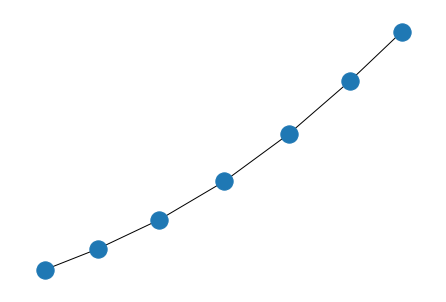

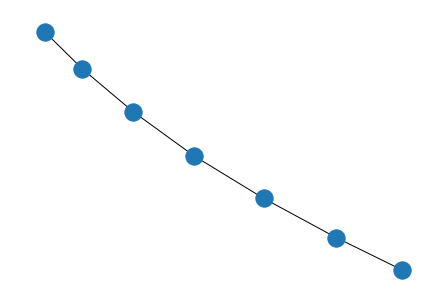

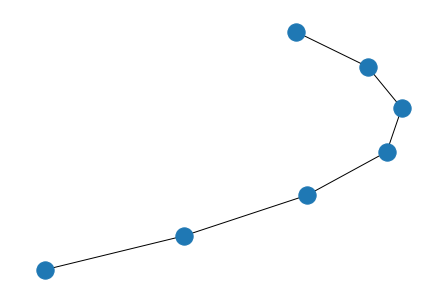

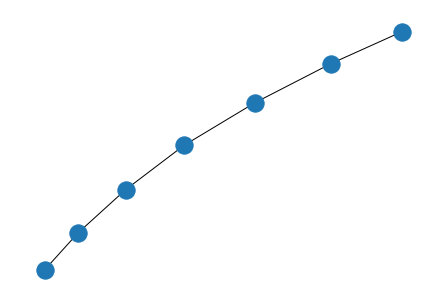

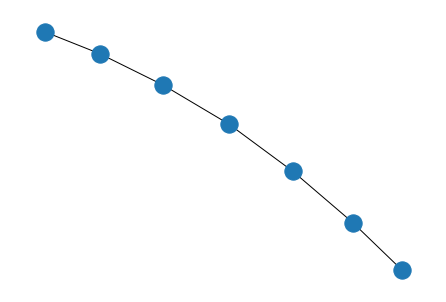

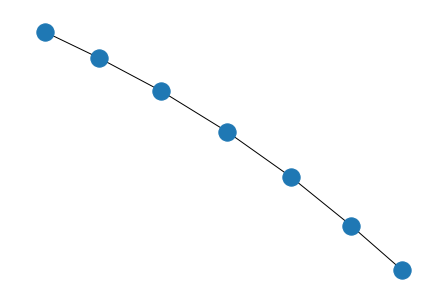

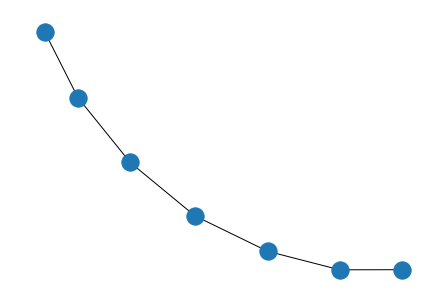

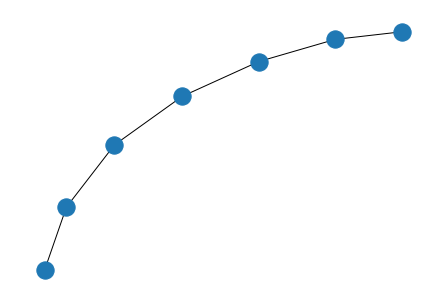

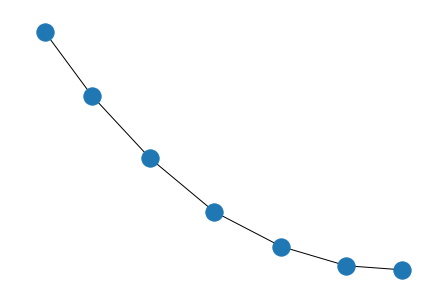

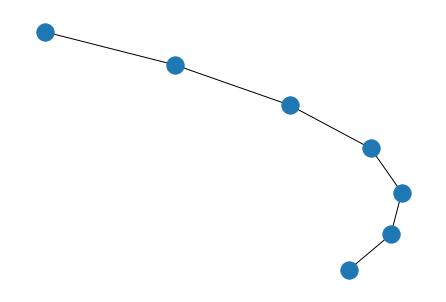

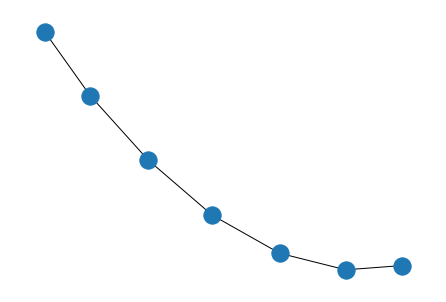

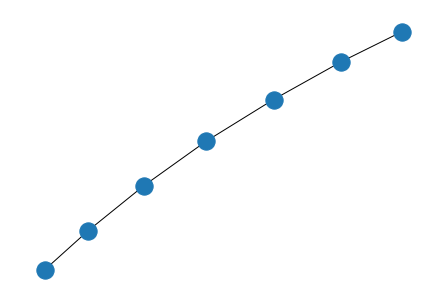

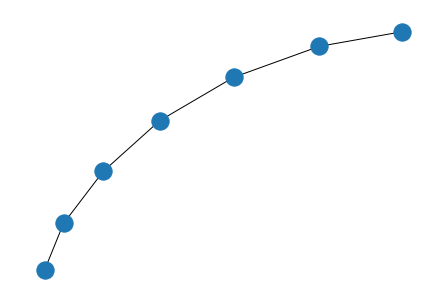

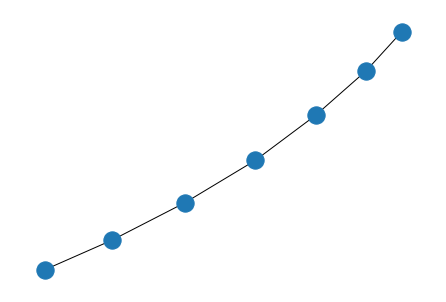

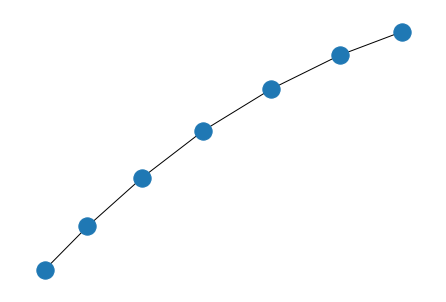

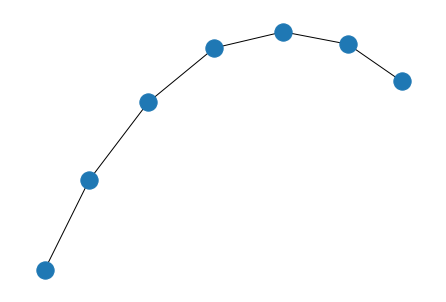

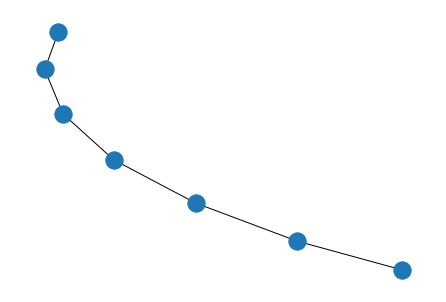

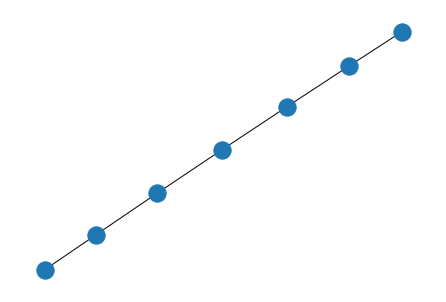

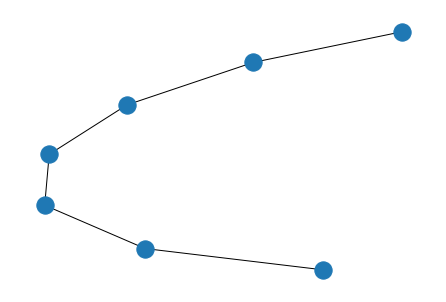

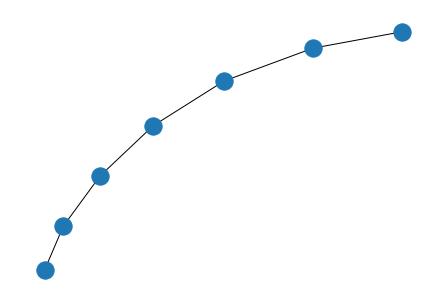

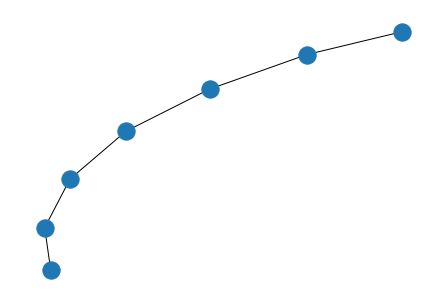

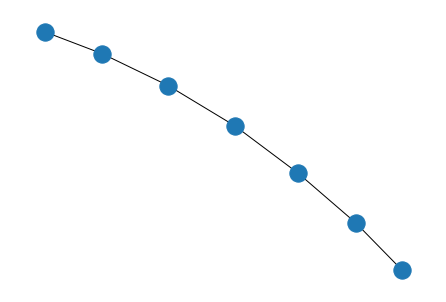

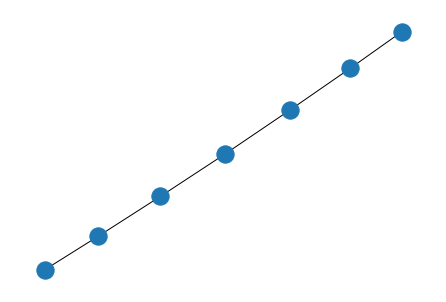

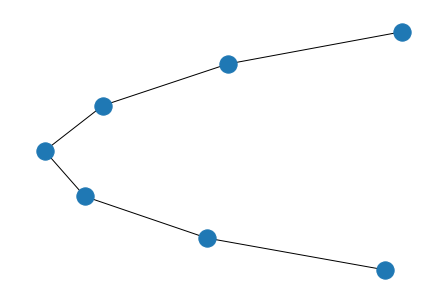

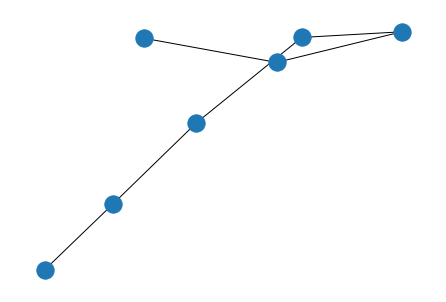

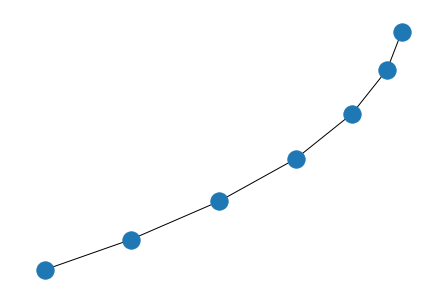

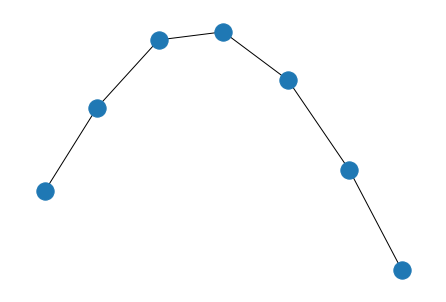

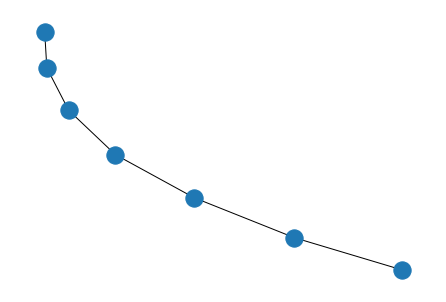

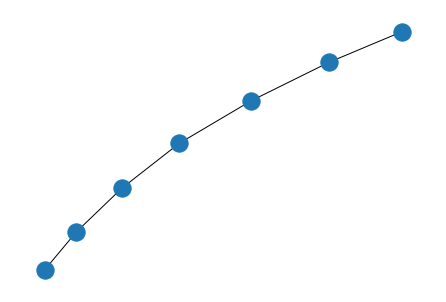

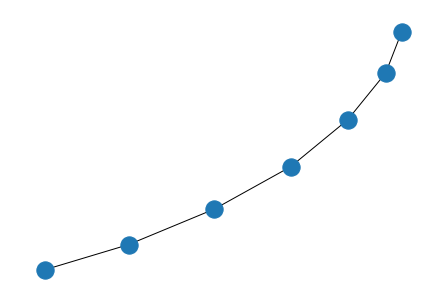

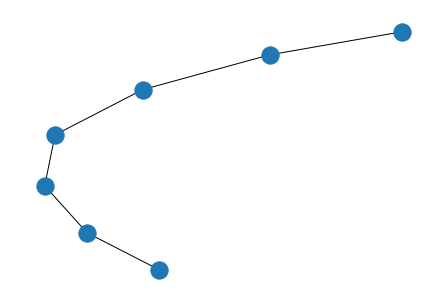

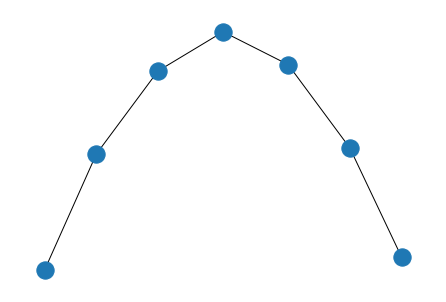

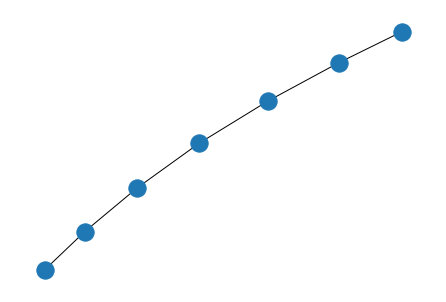

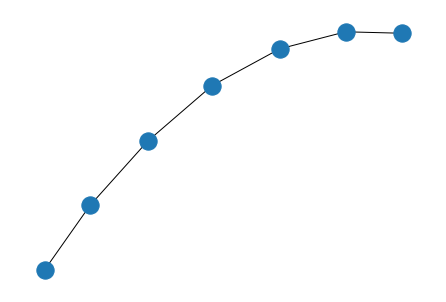

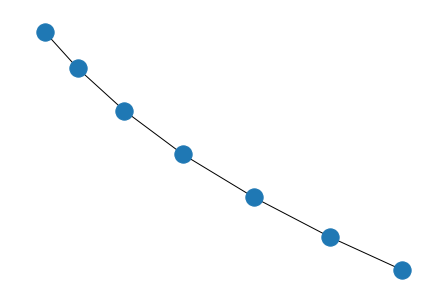

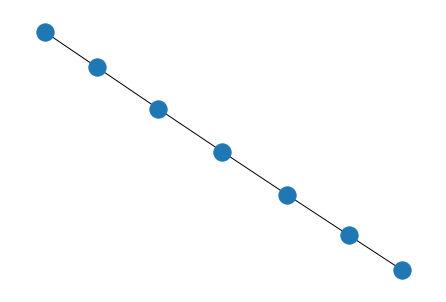

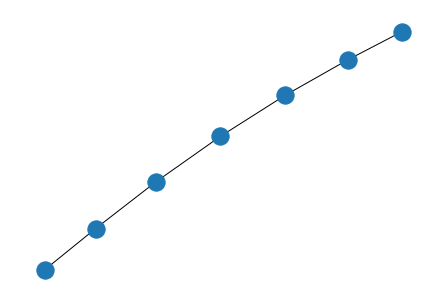

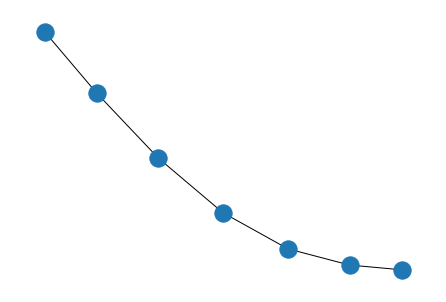

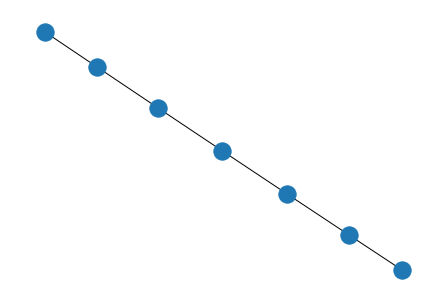

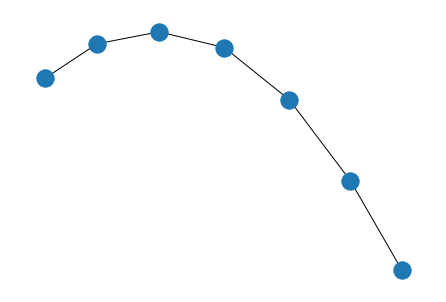

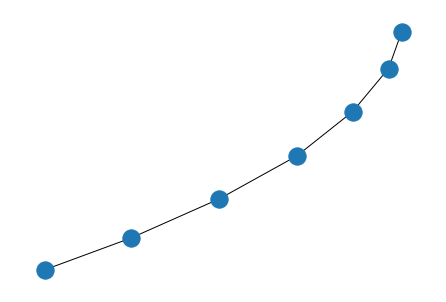

In [113]:
for i in range(0,len(population_tracker)):
    for j in range(0,len(population_tracker[i])):
        plt.figure(i*10+j+1)
        nx.draw(graph_creator(G.nodes(),population_tracker[i][j]))

In [132]:
winner_score

4

In [115]:
a=[]
for span in nx.SpanningTreeIterator(G):
    a.append(return_max_edge_congestion_of_tree(G,span))
for i in range(len(a)):
    if a[i]==4:
        print(i)

33
34
42
44
46
54
110
147


In [116]:
min(a)

4

In [133]:
best_score

4